In [ ]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

In [ ]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

In [ ]:
 nice = ["a0028","a0056", "a0093", "b0067","b0068", "b0077", "c0001","c0006", "c0031", "d0002","d0004", "d0008", "e00007","e00012", "e00015"]

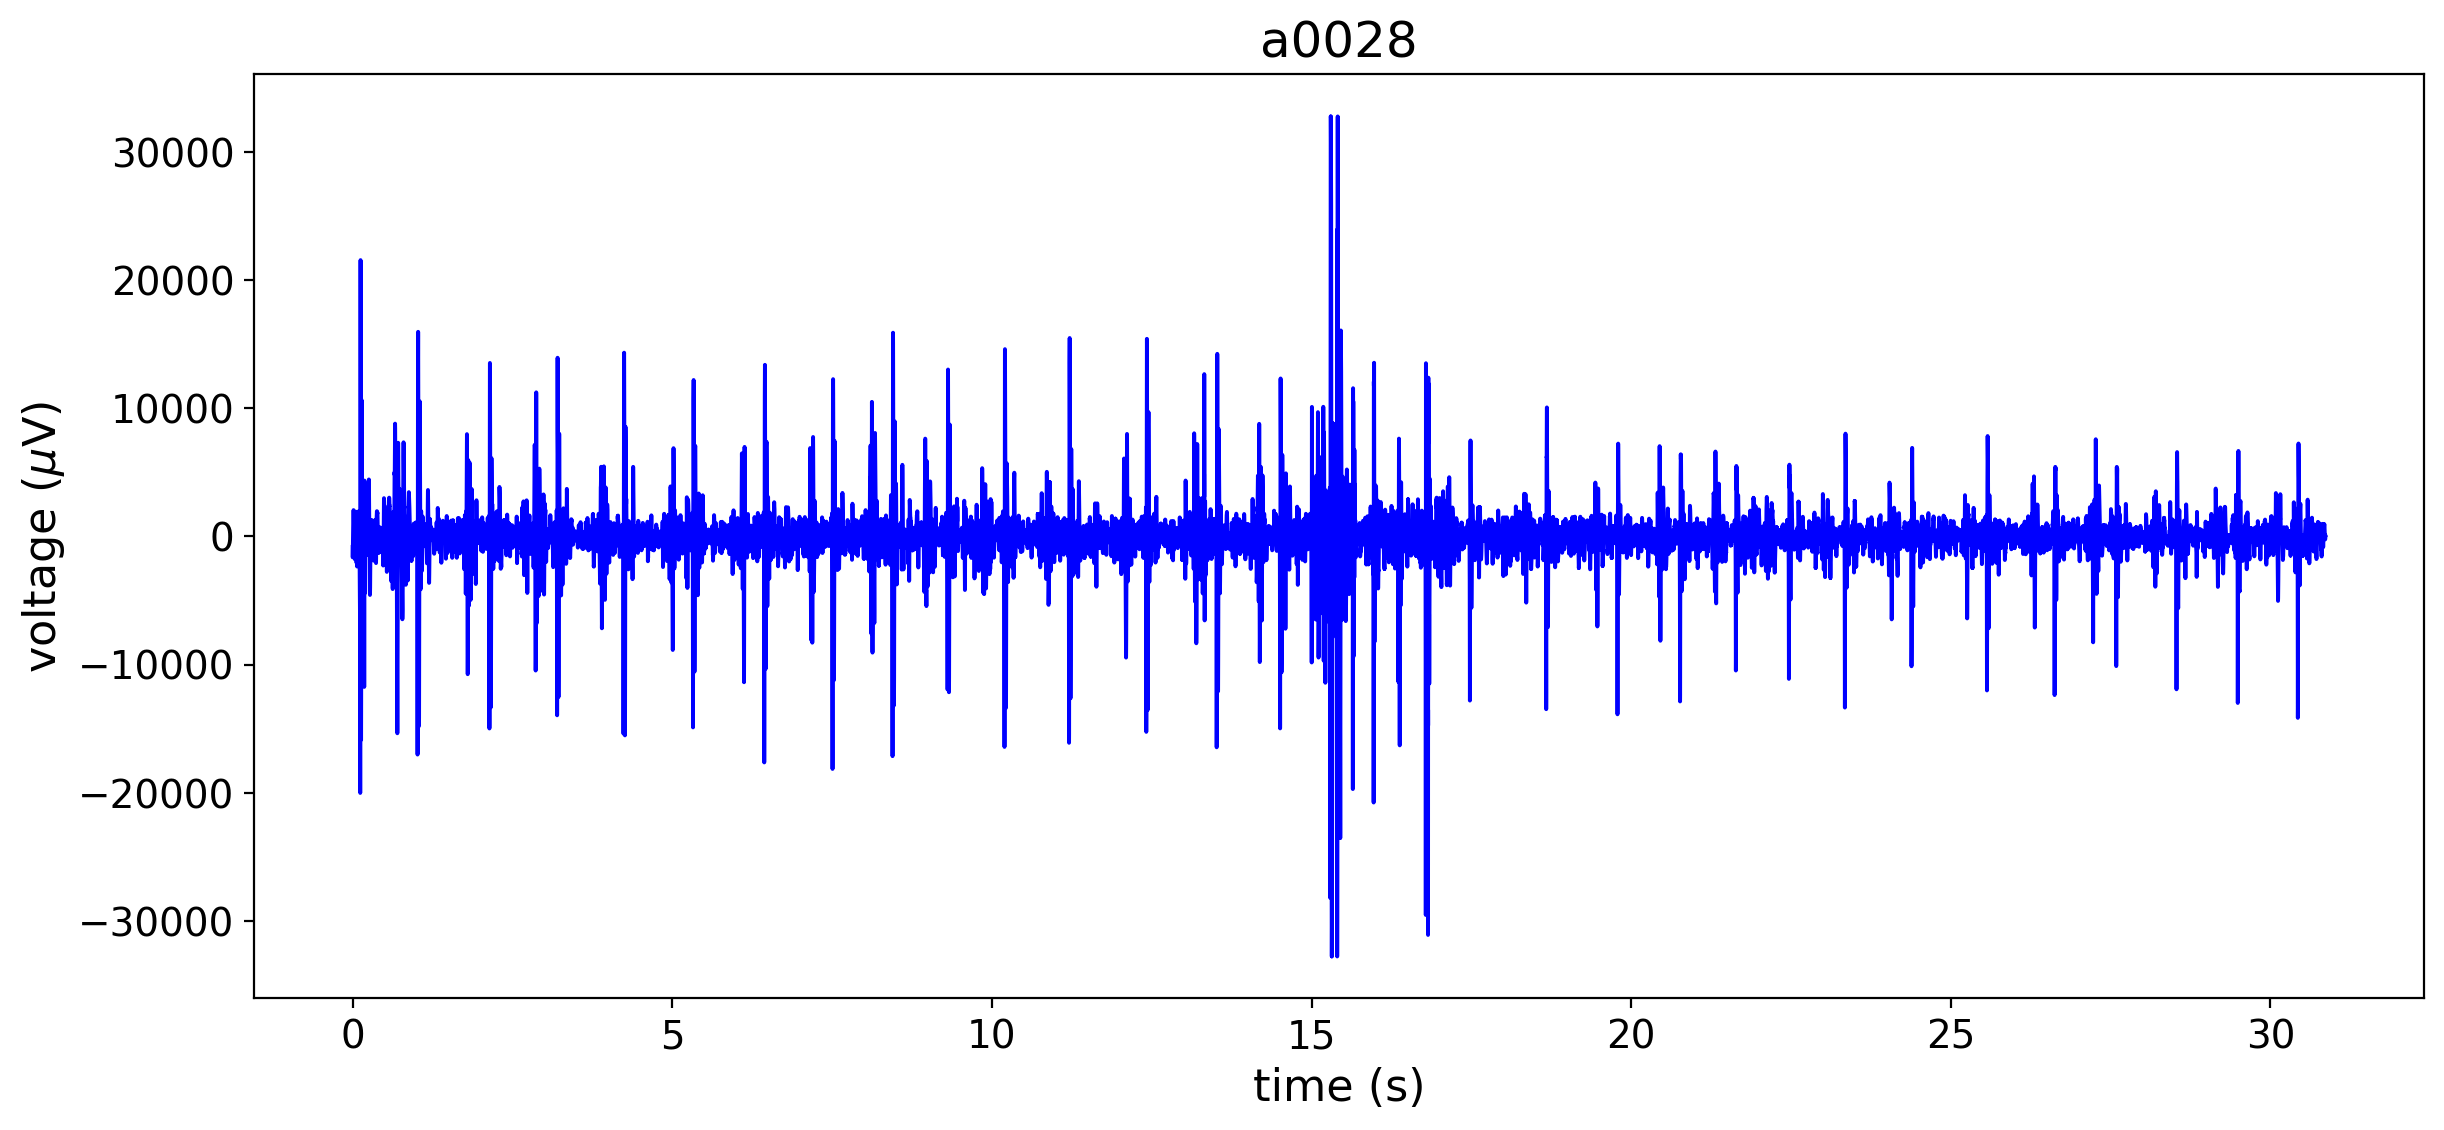

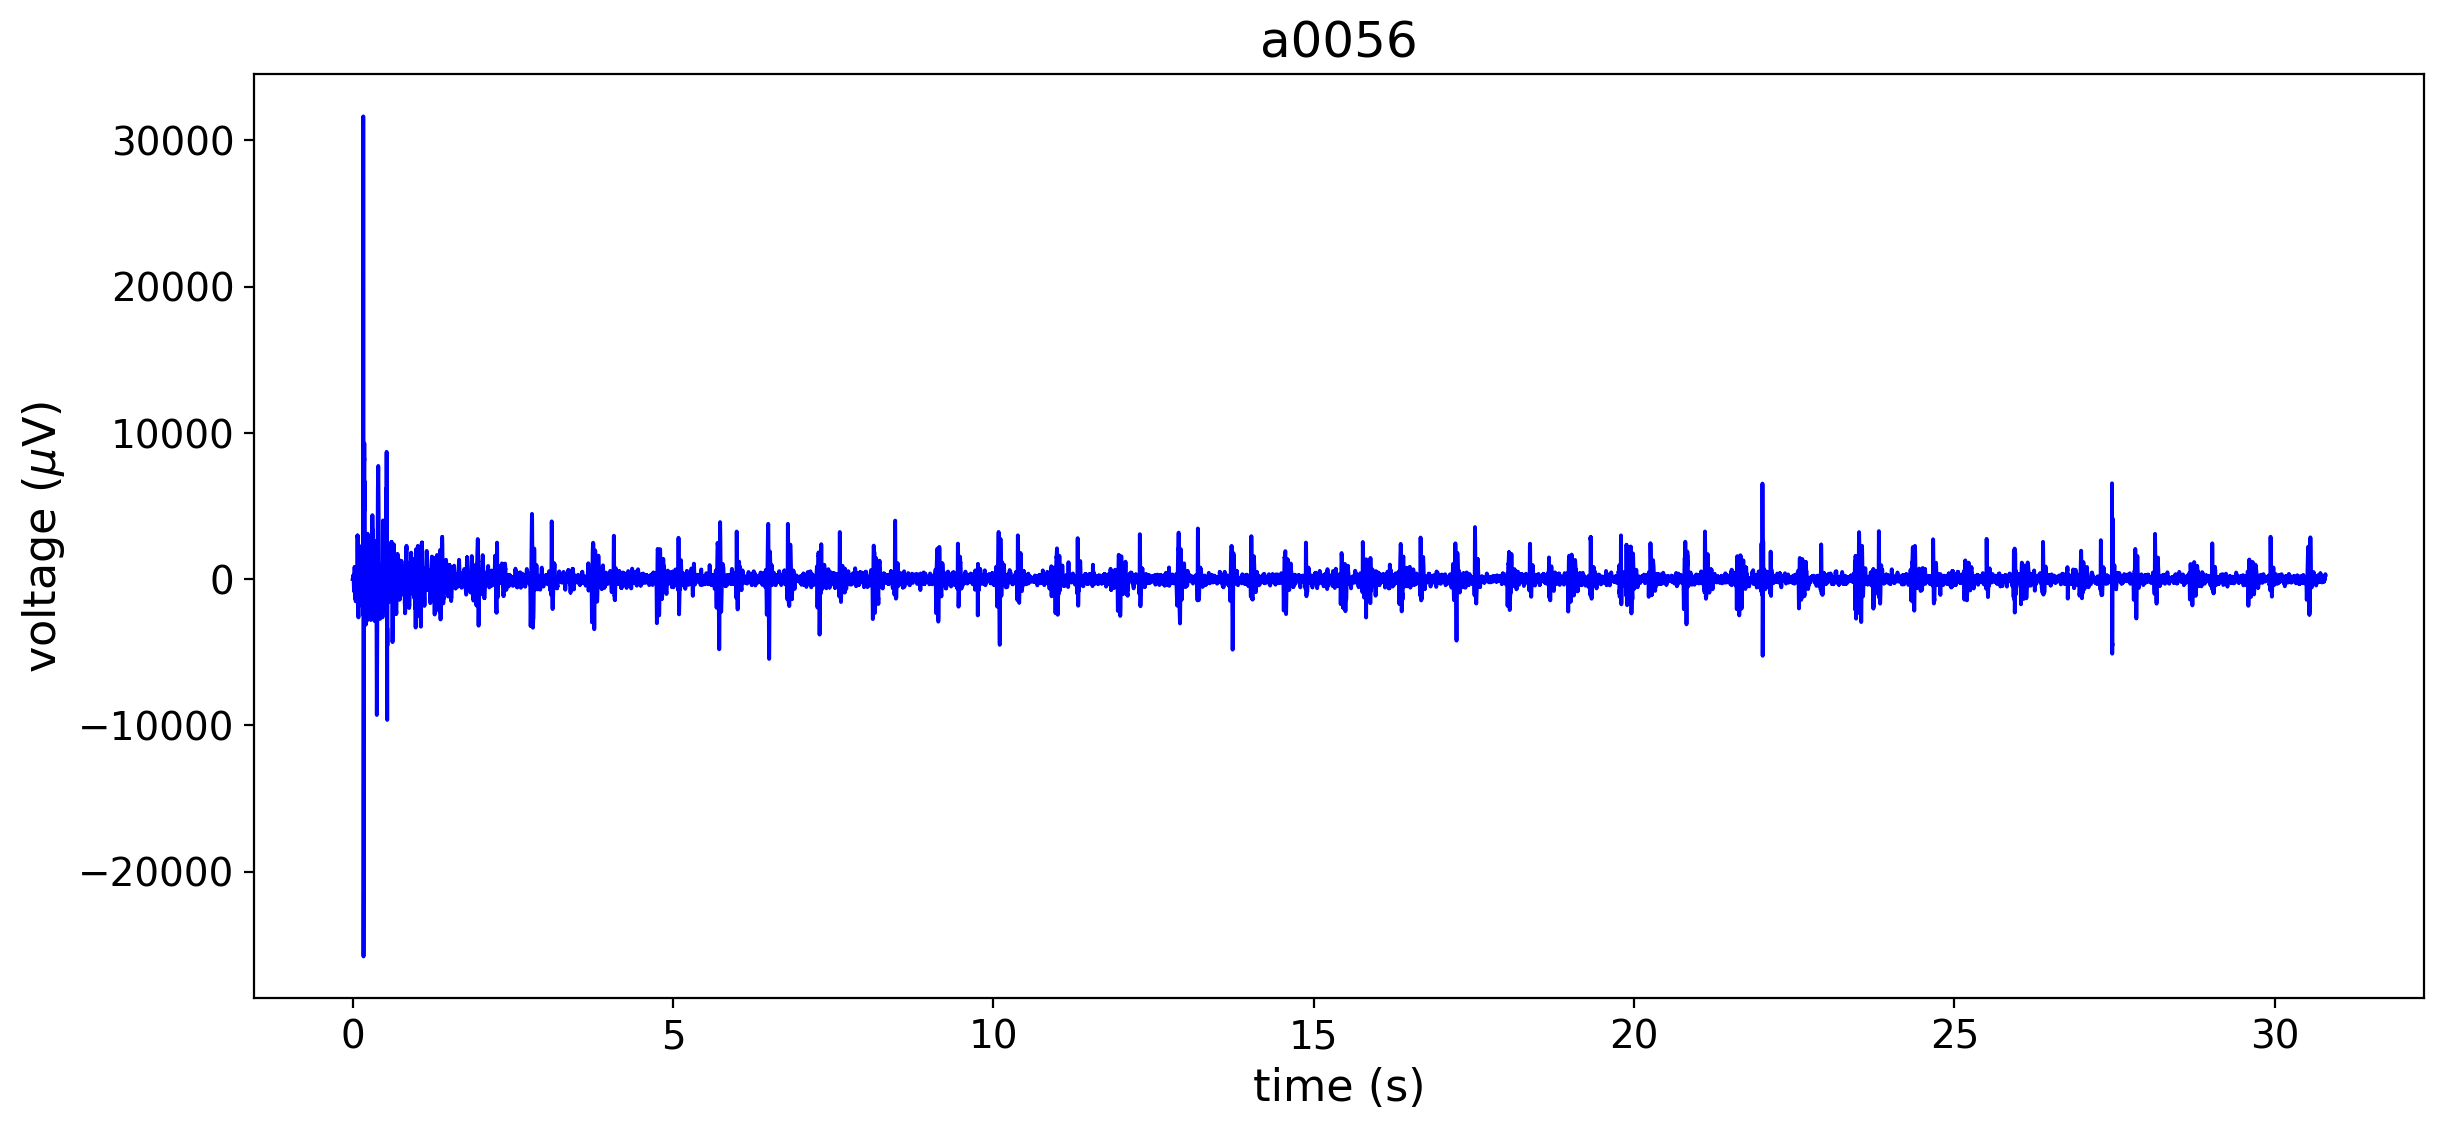

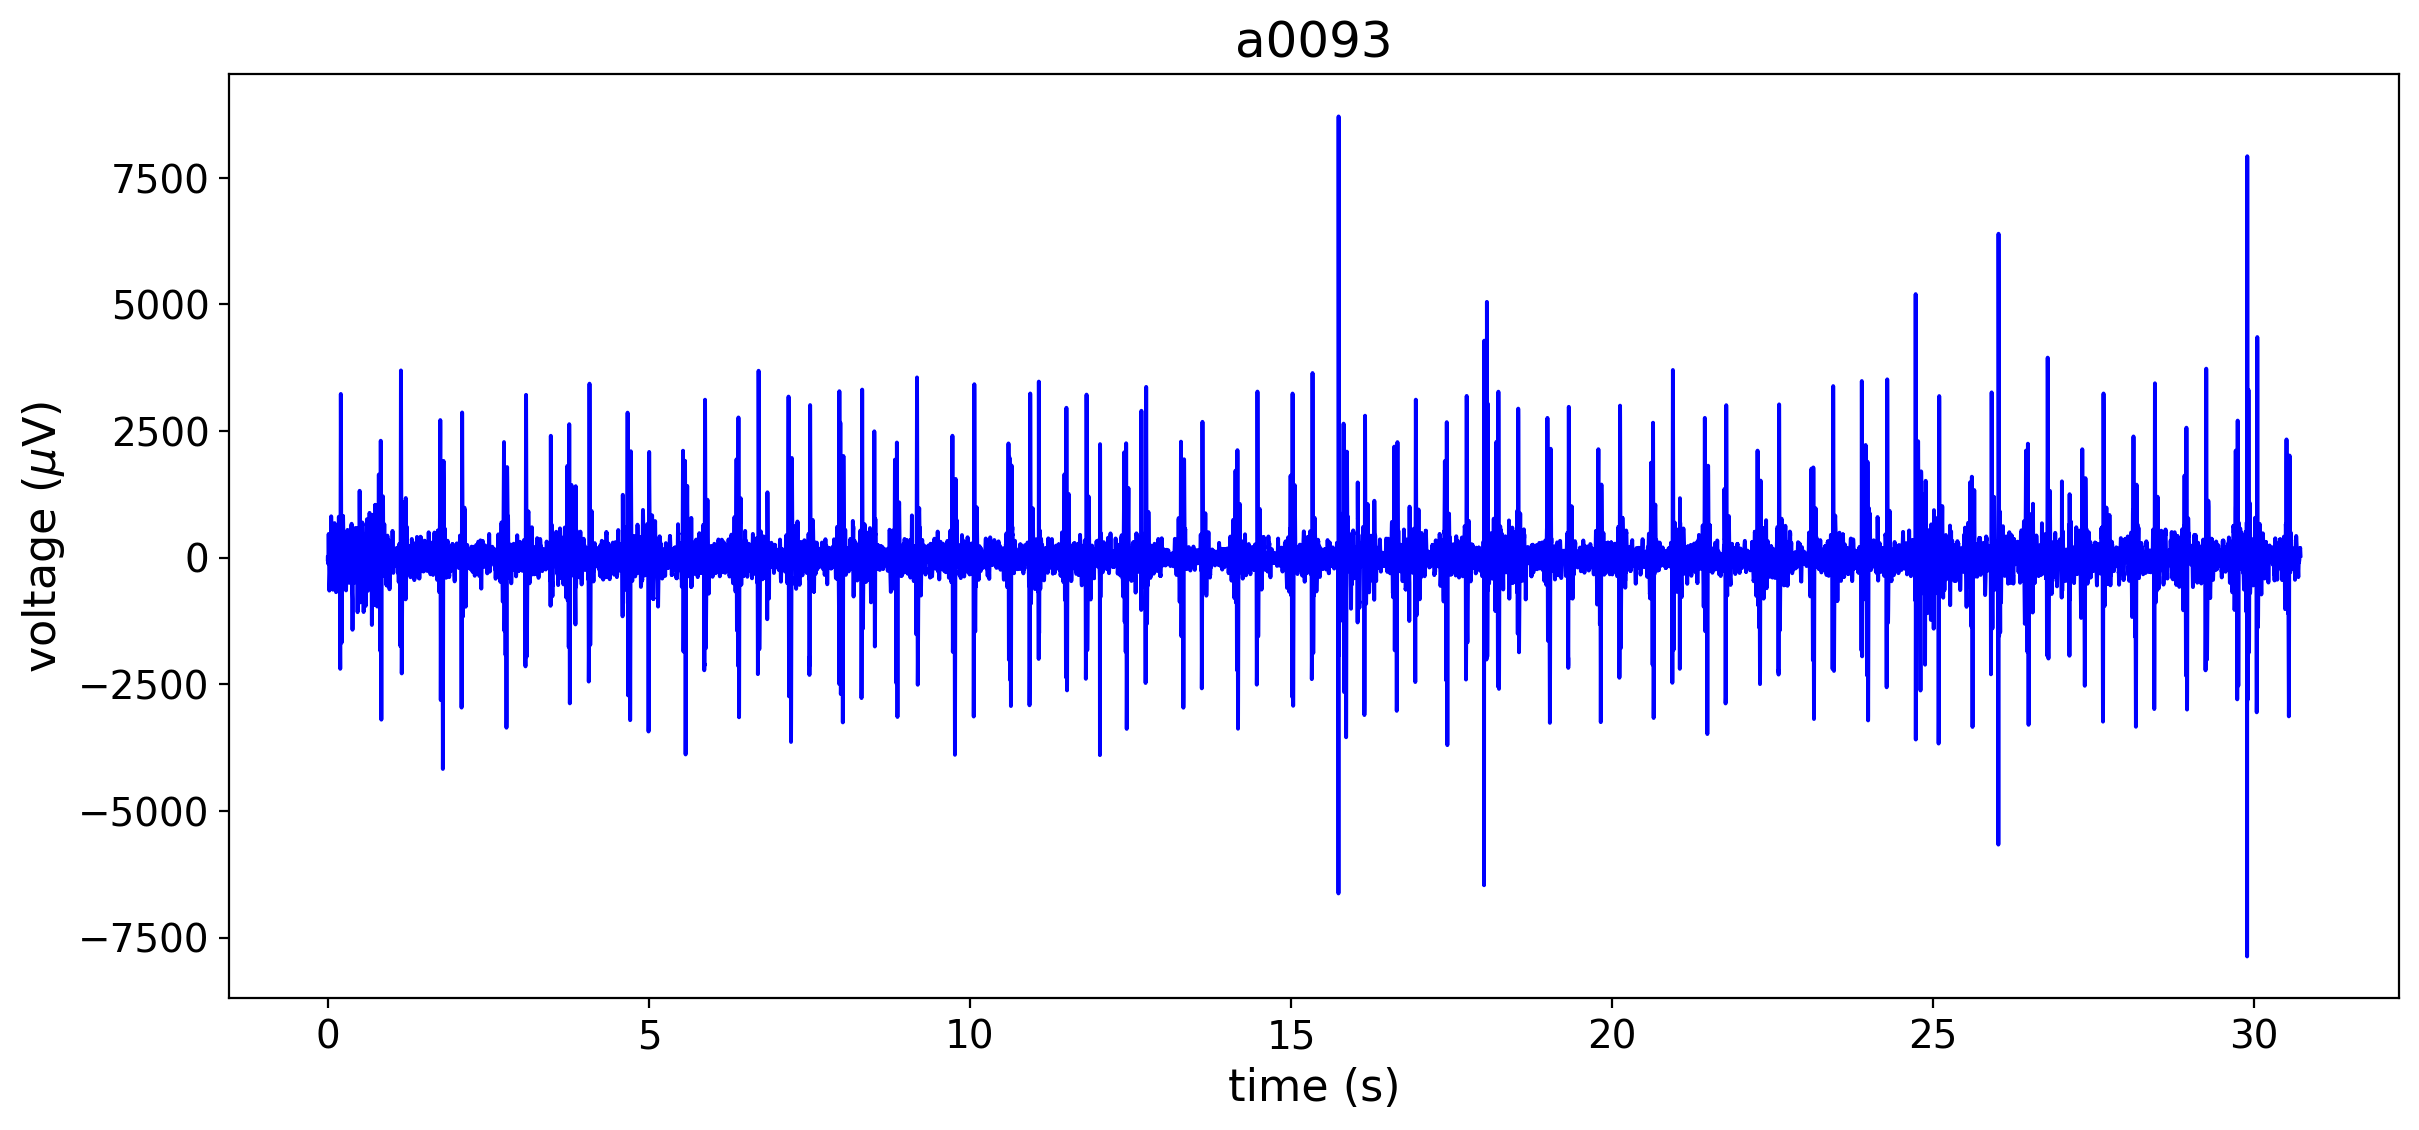

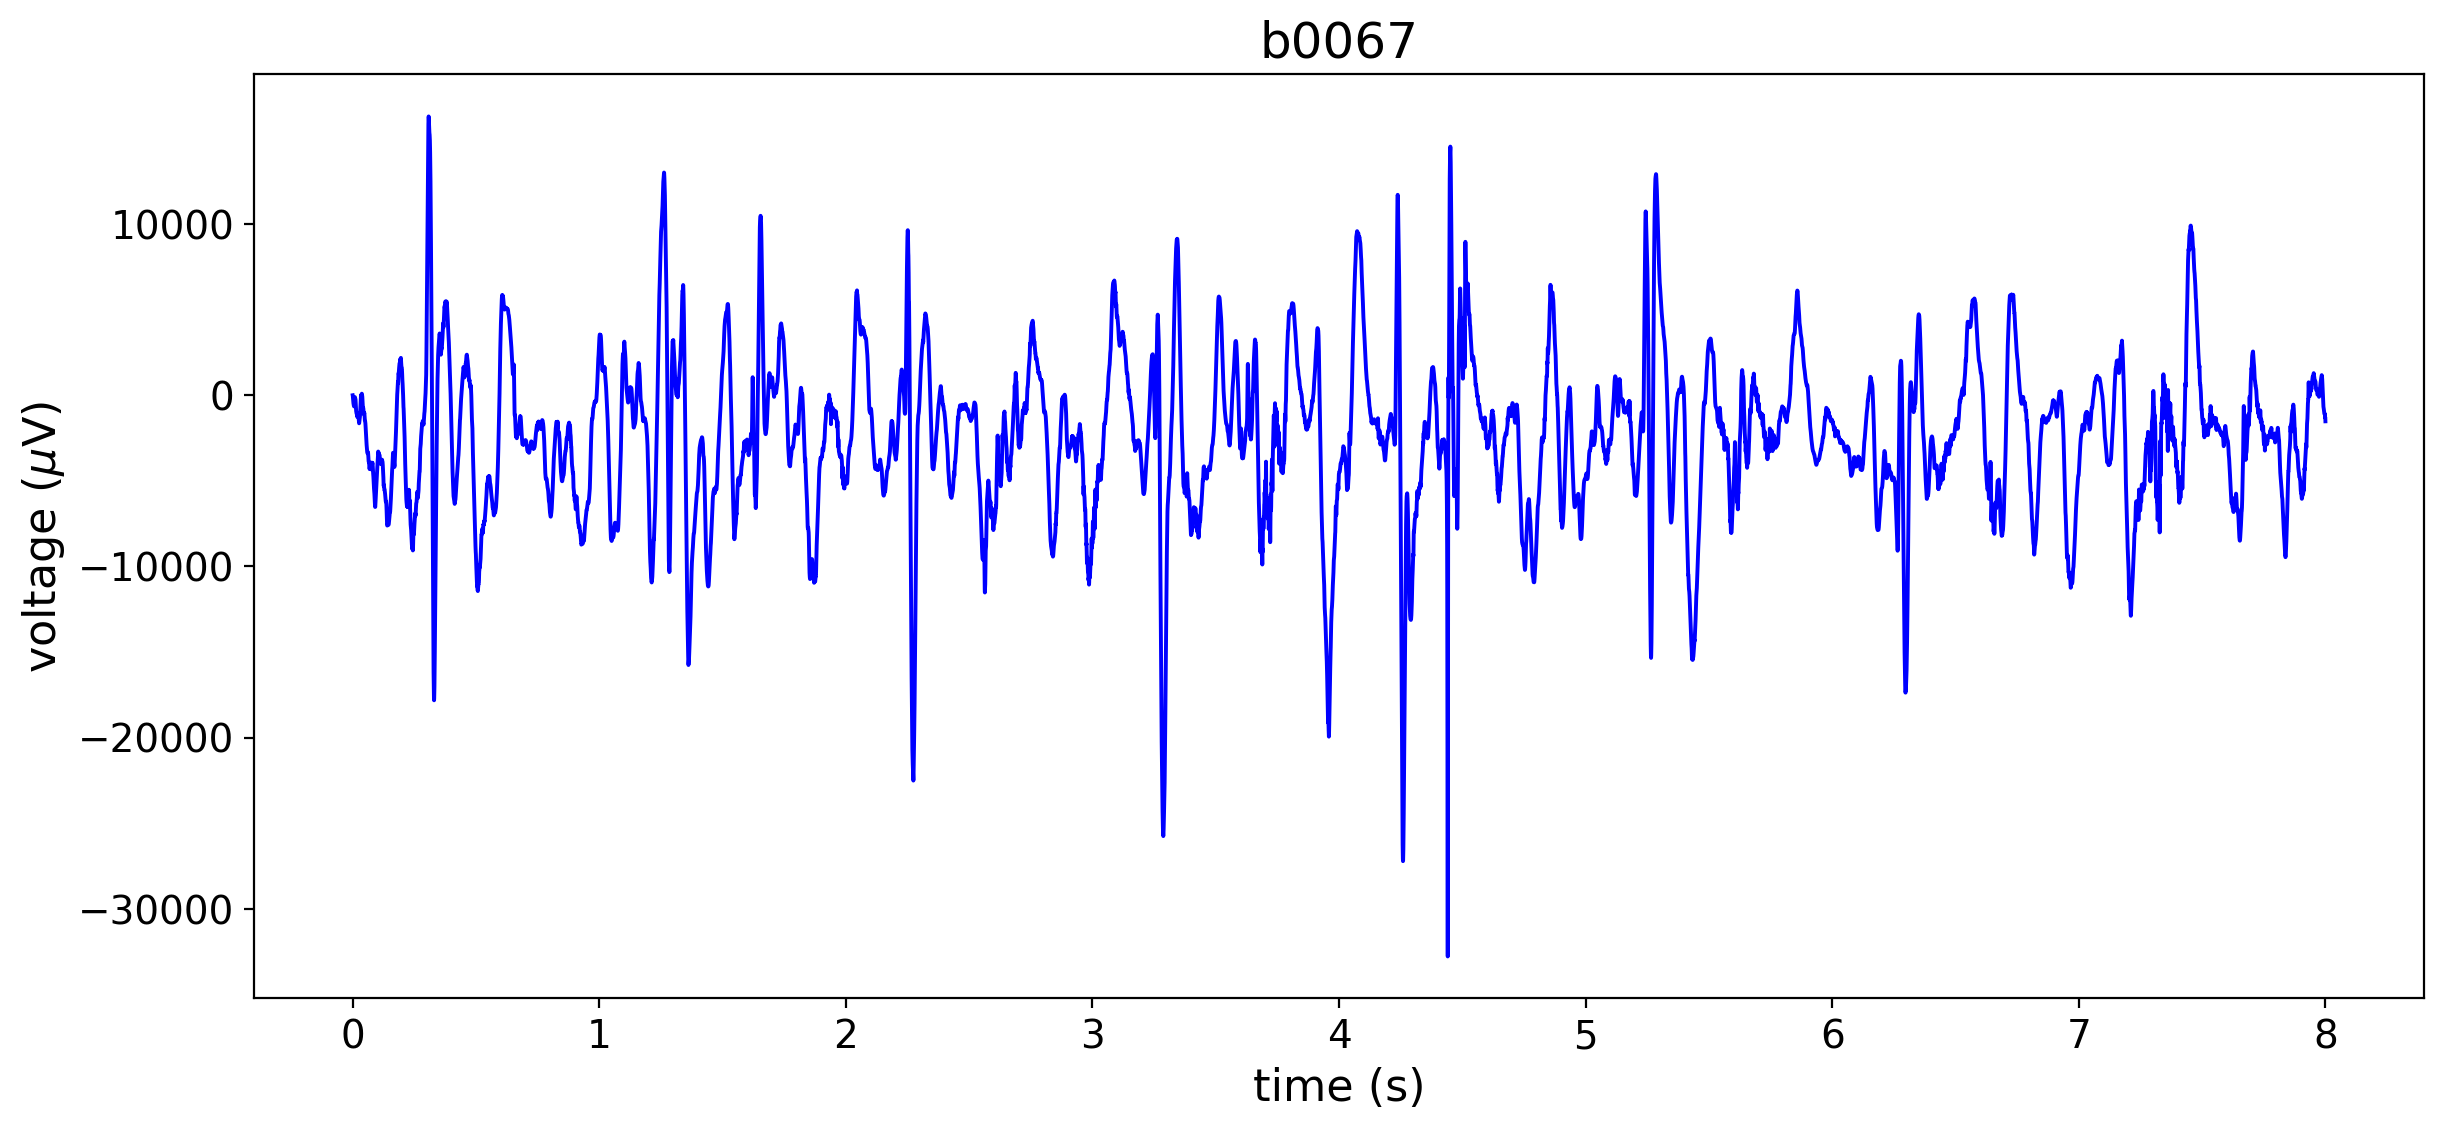

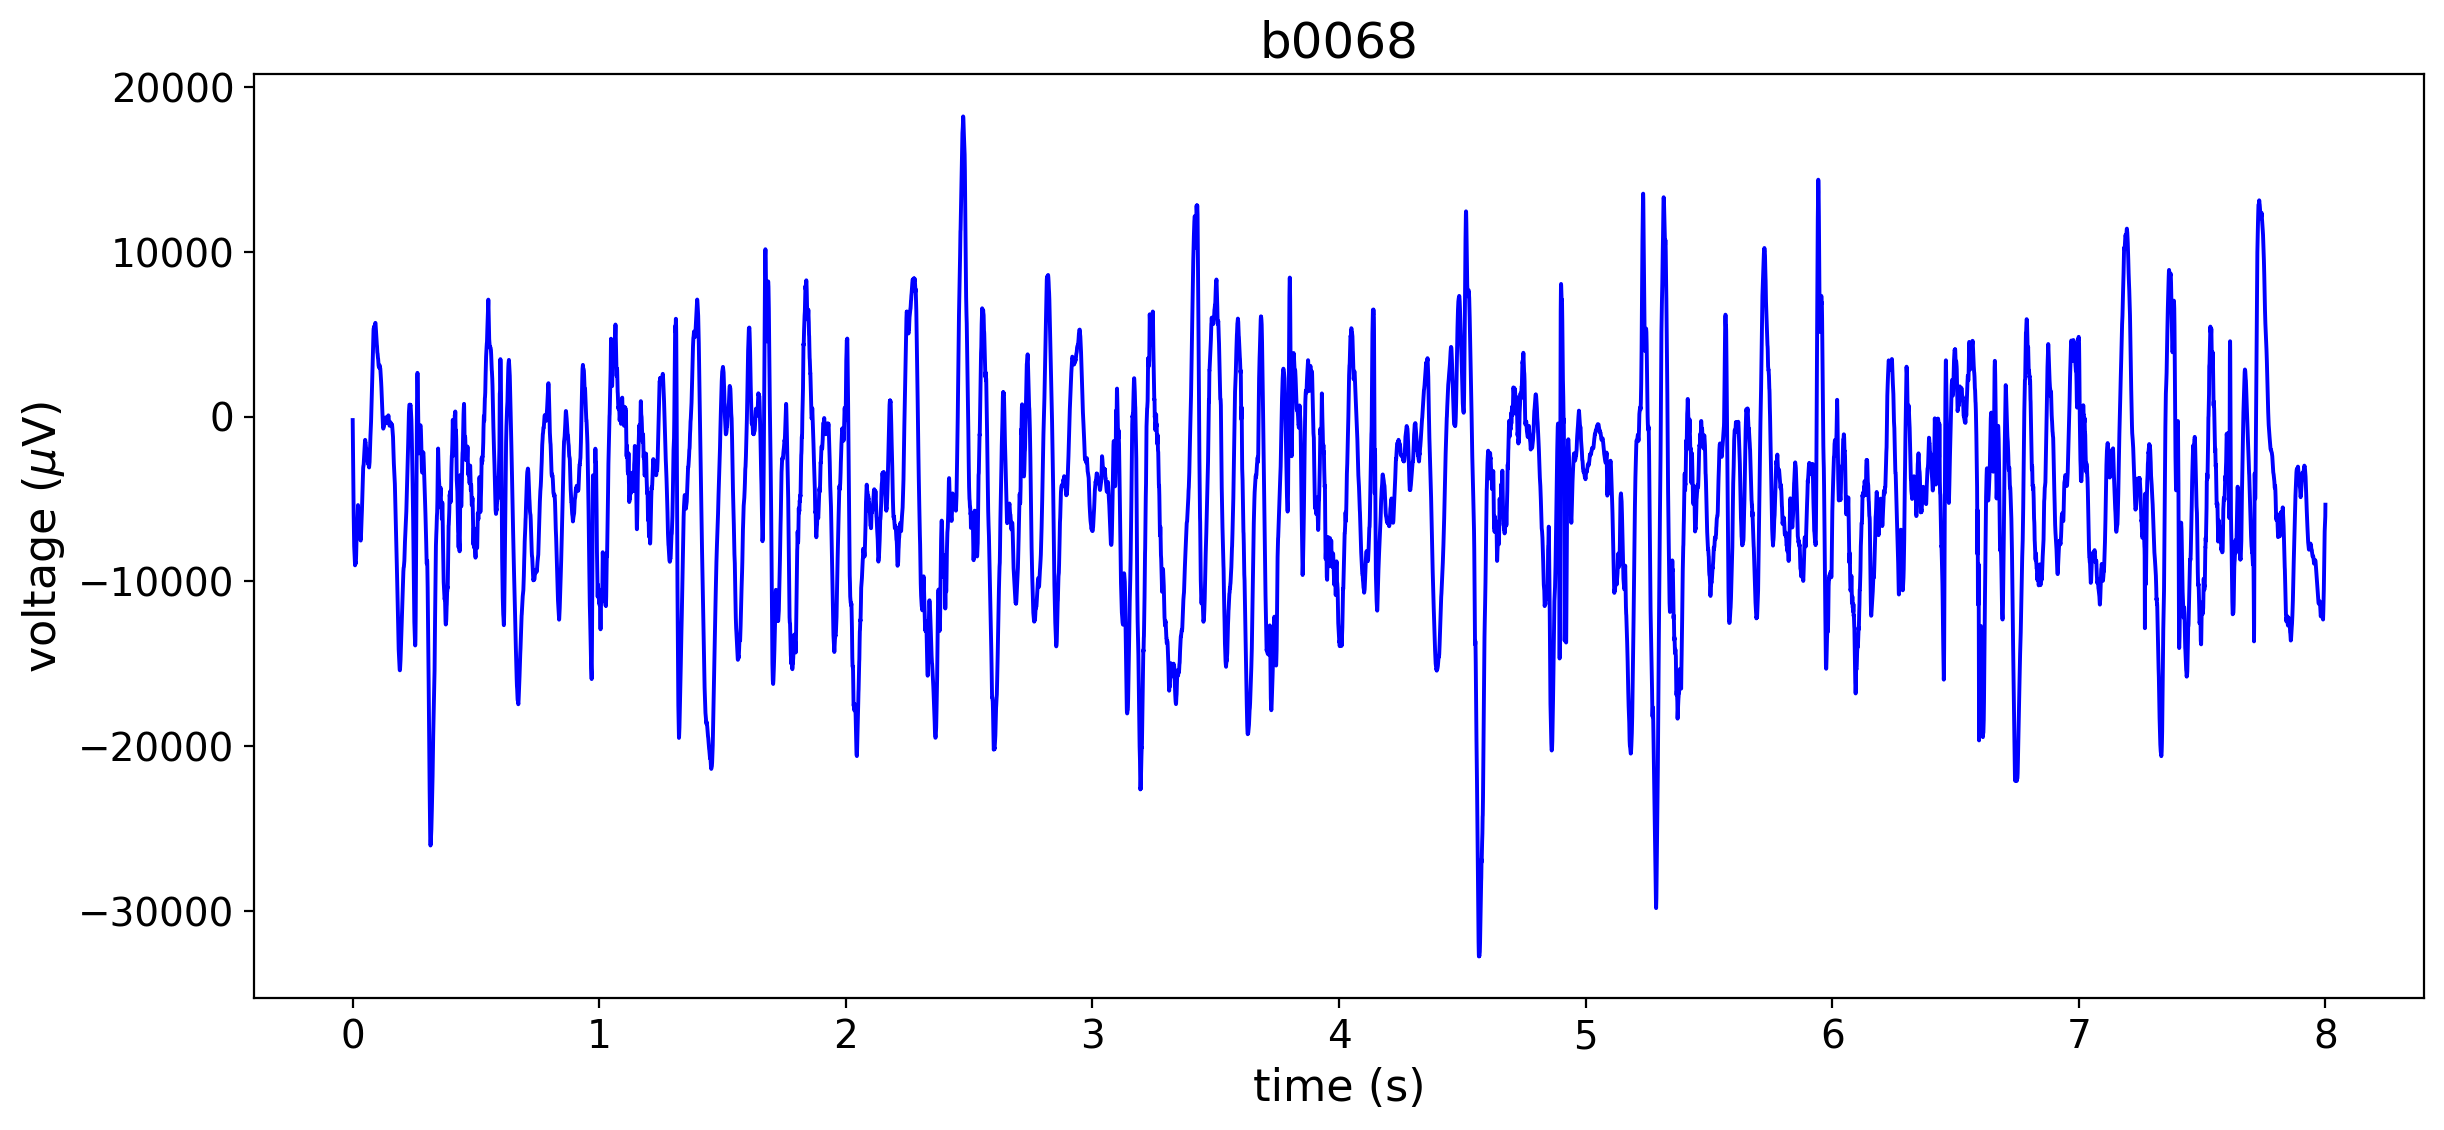

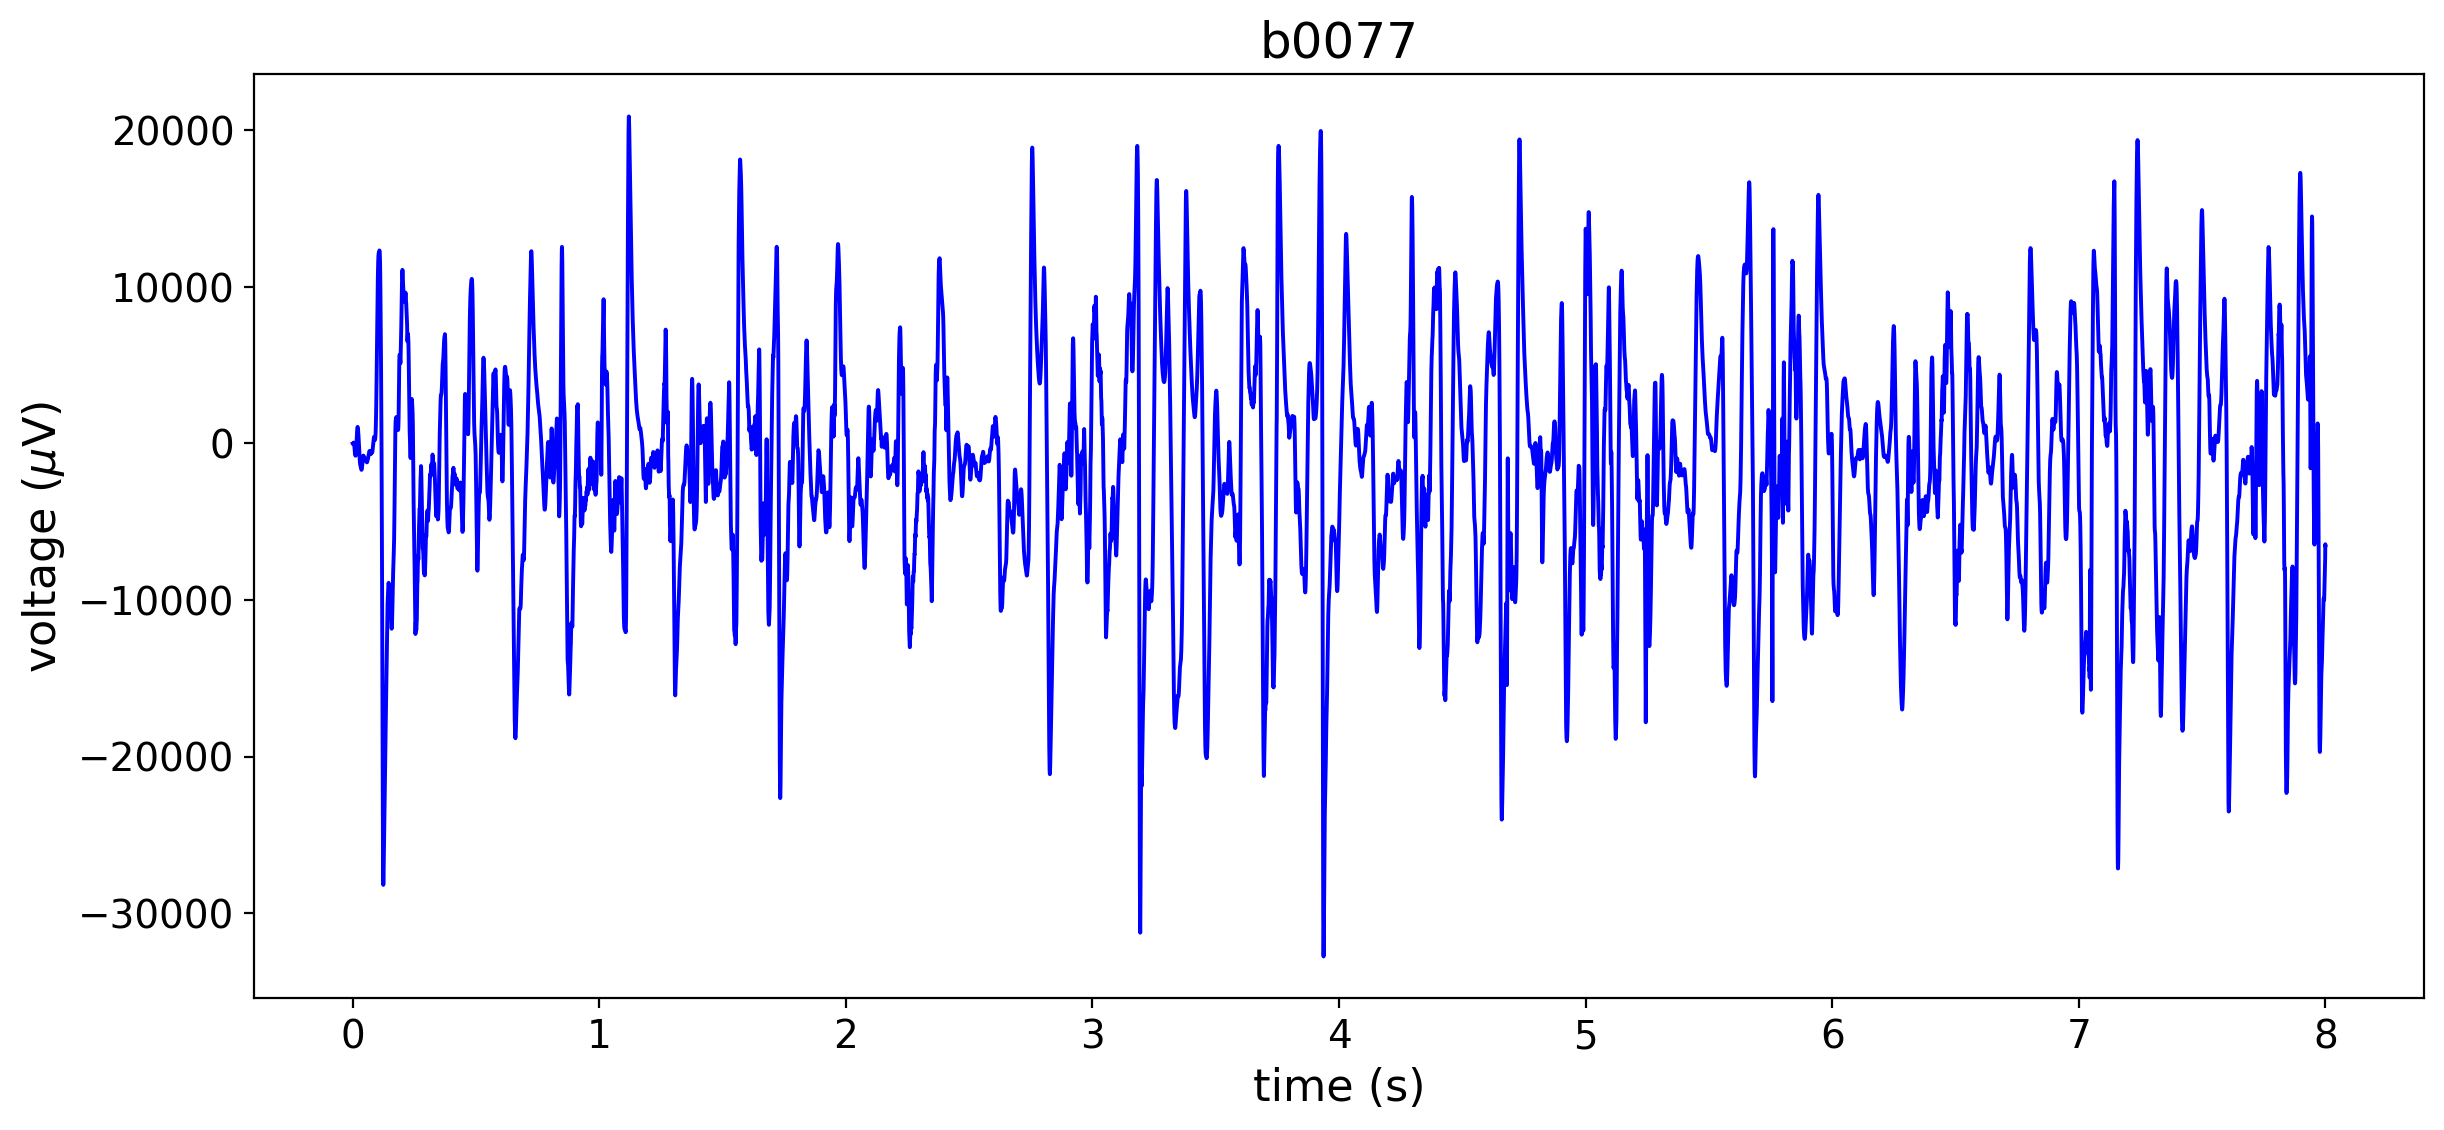

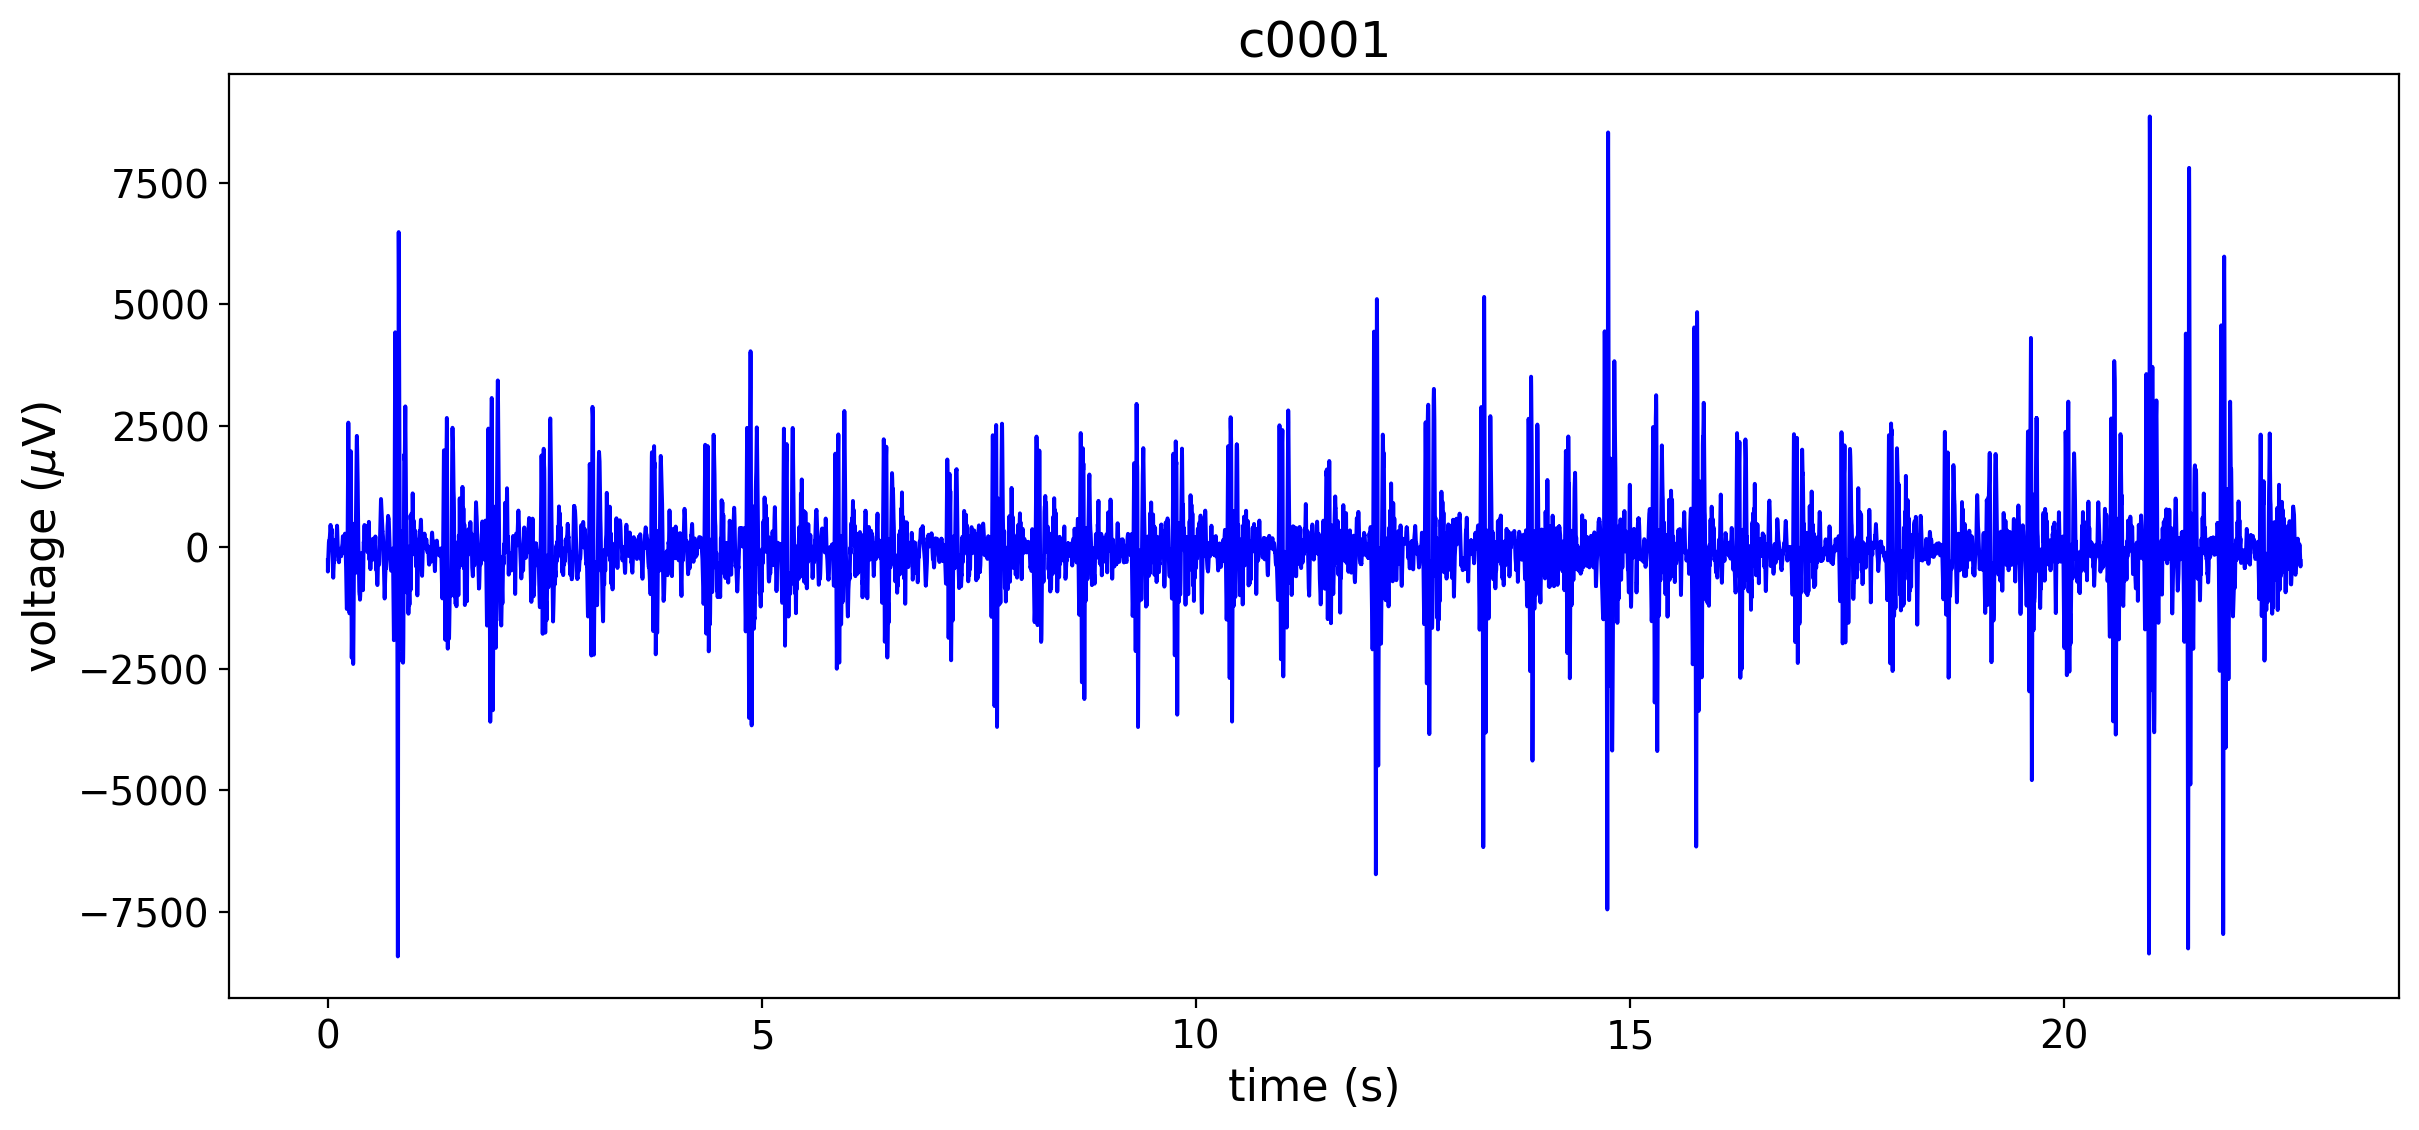

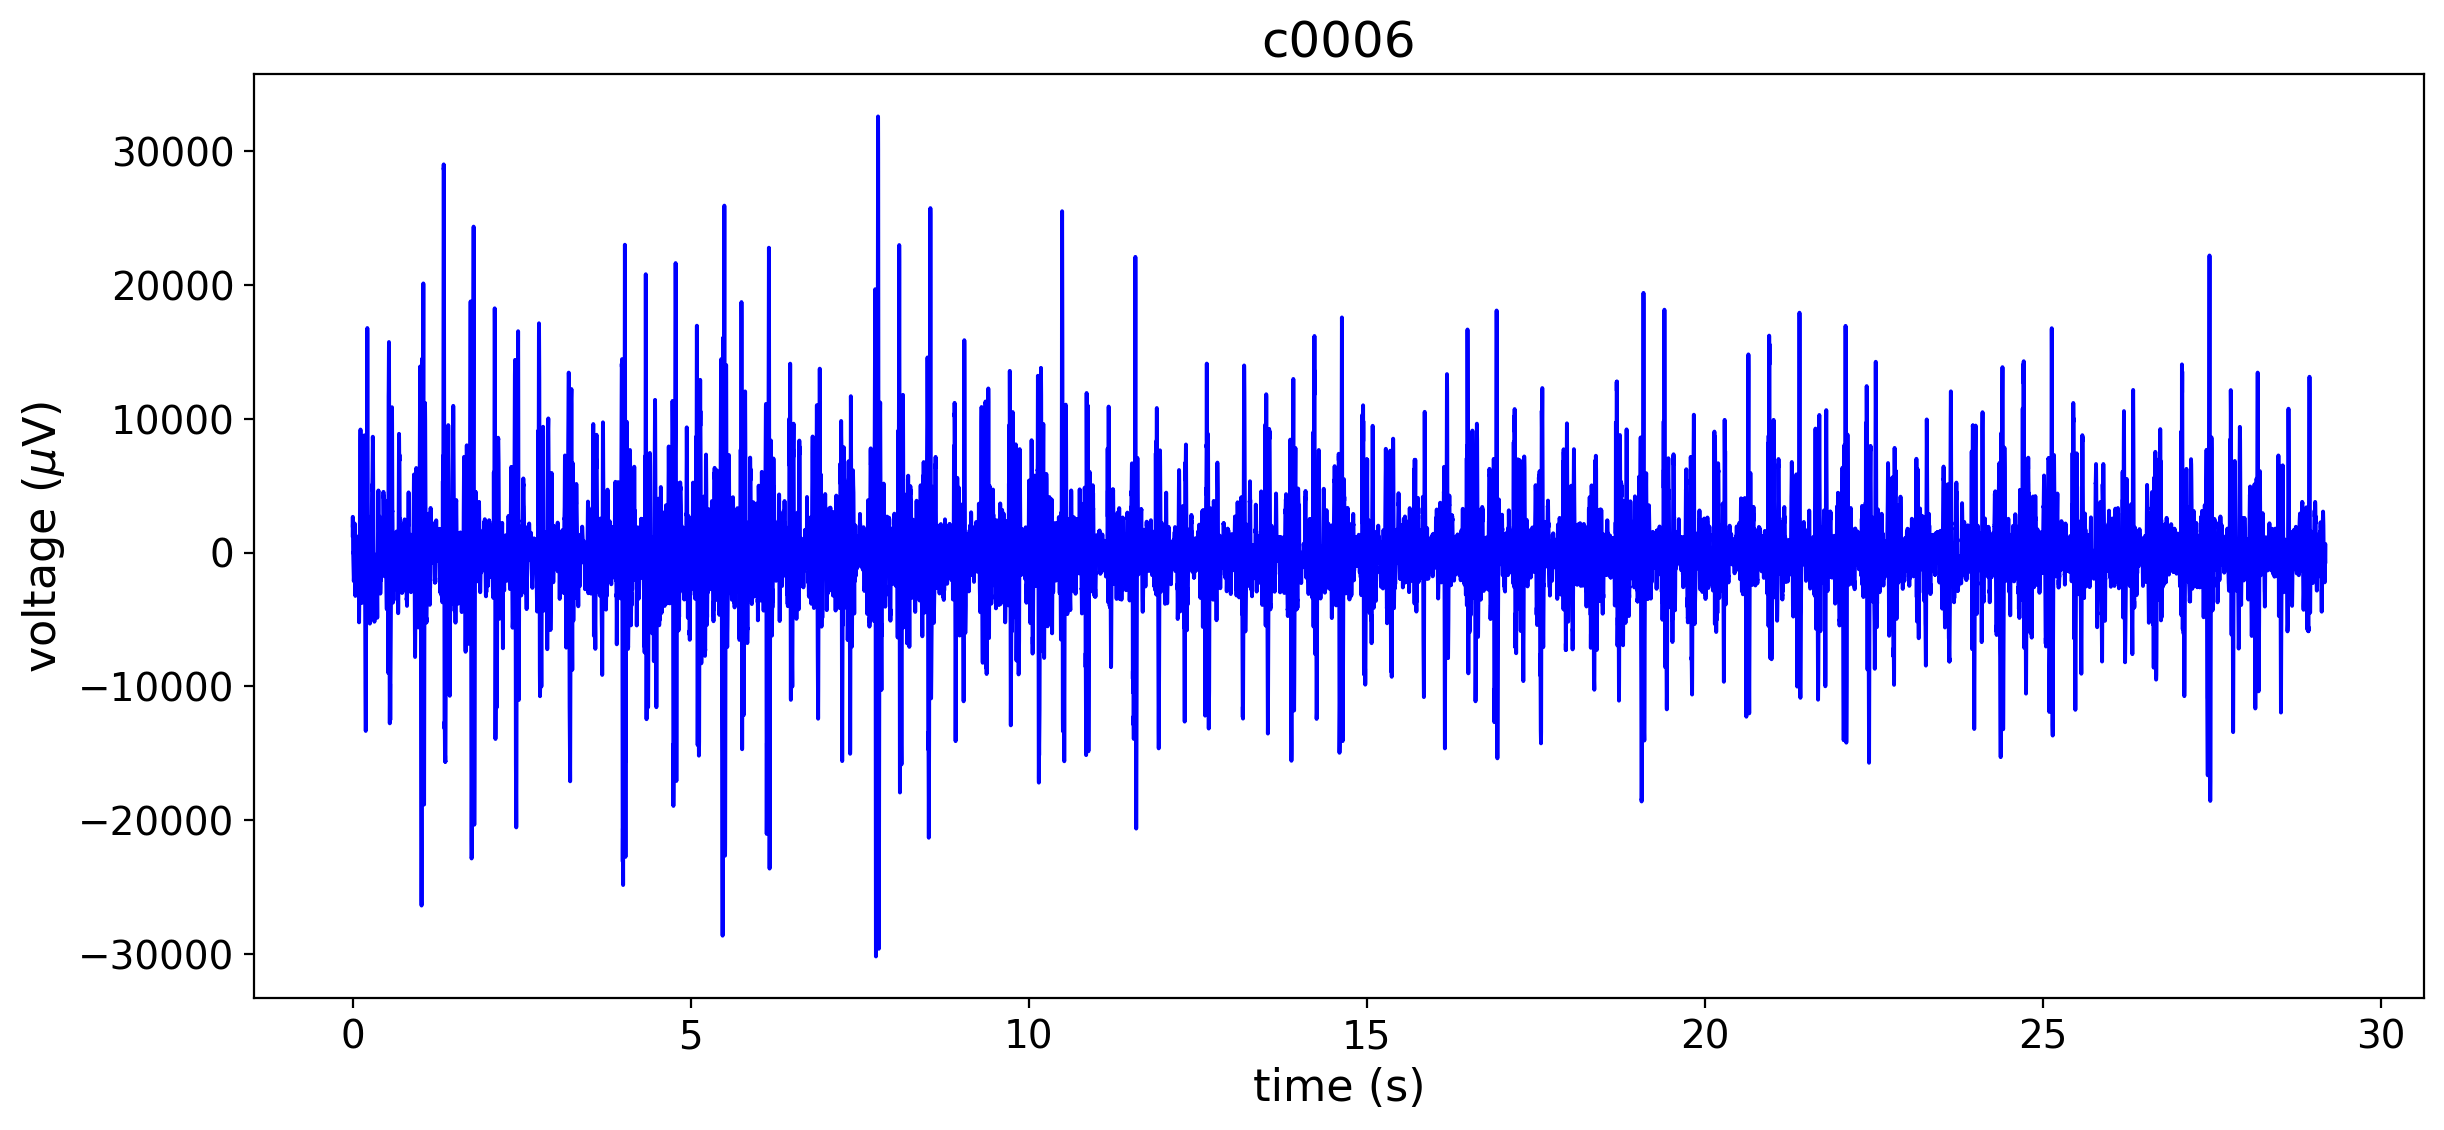

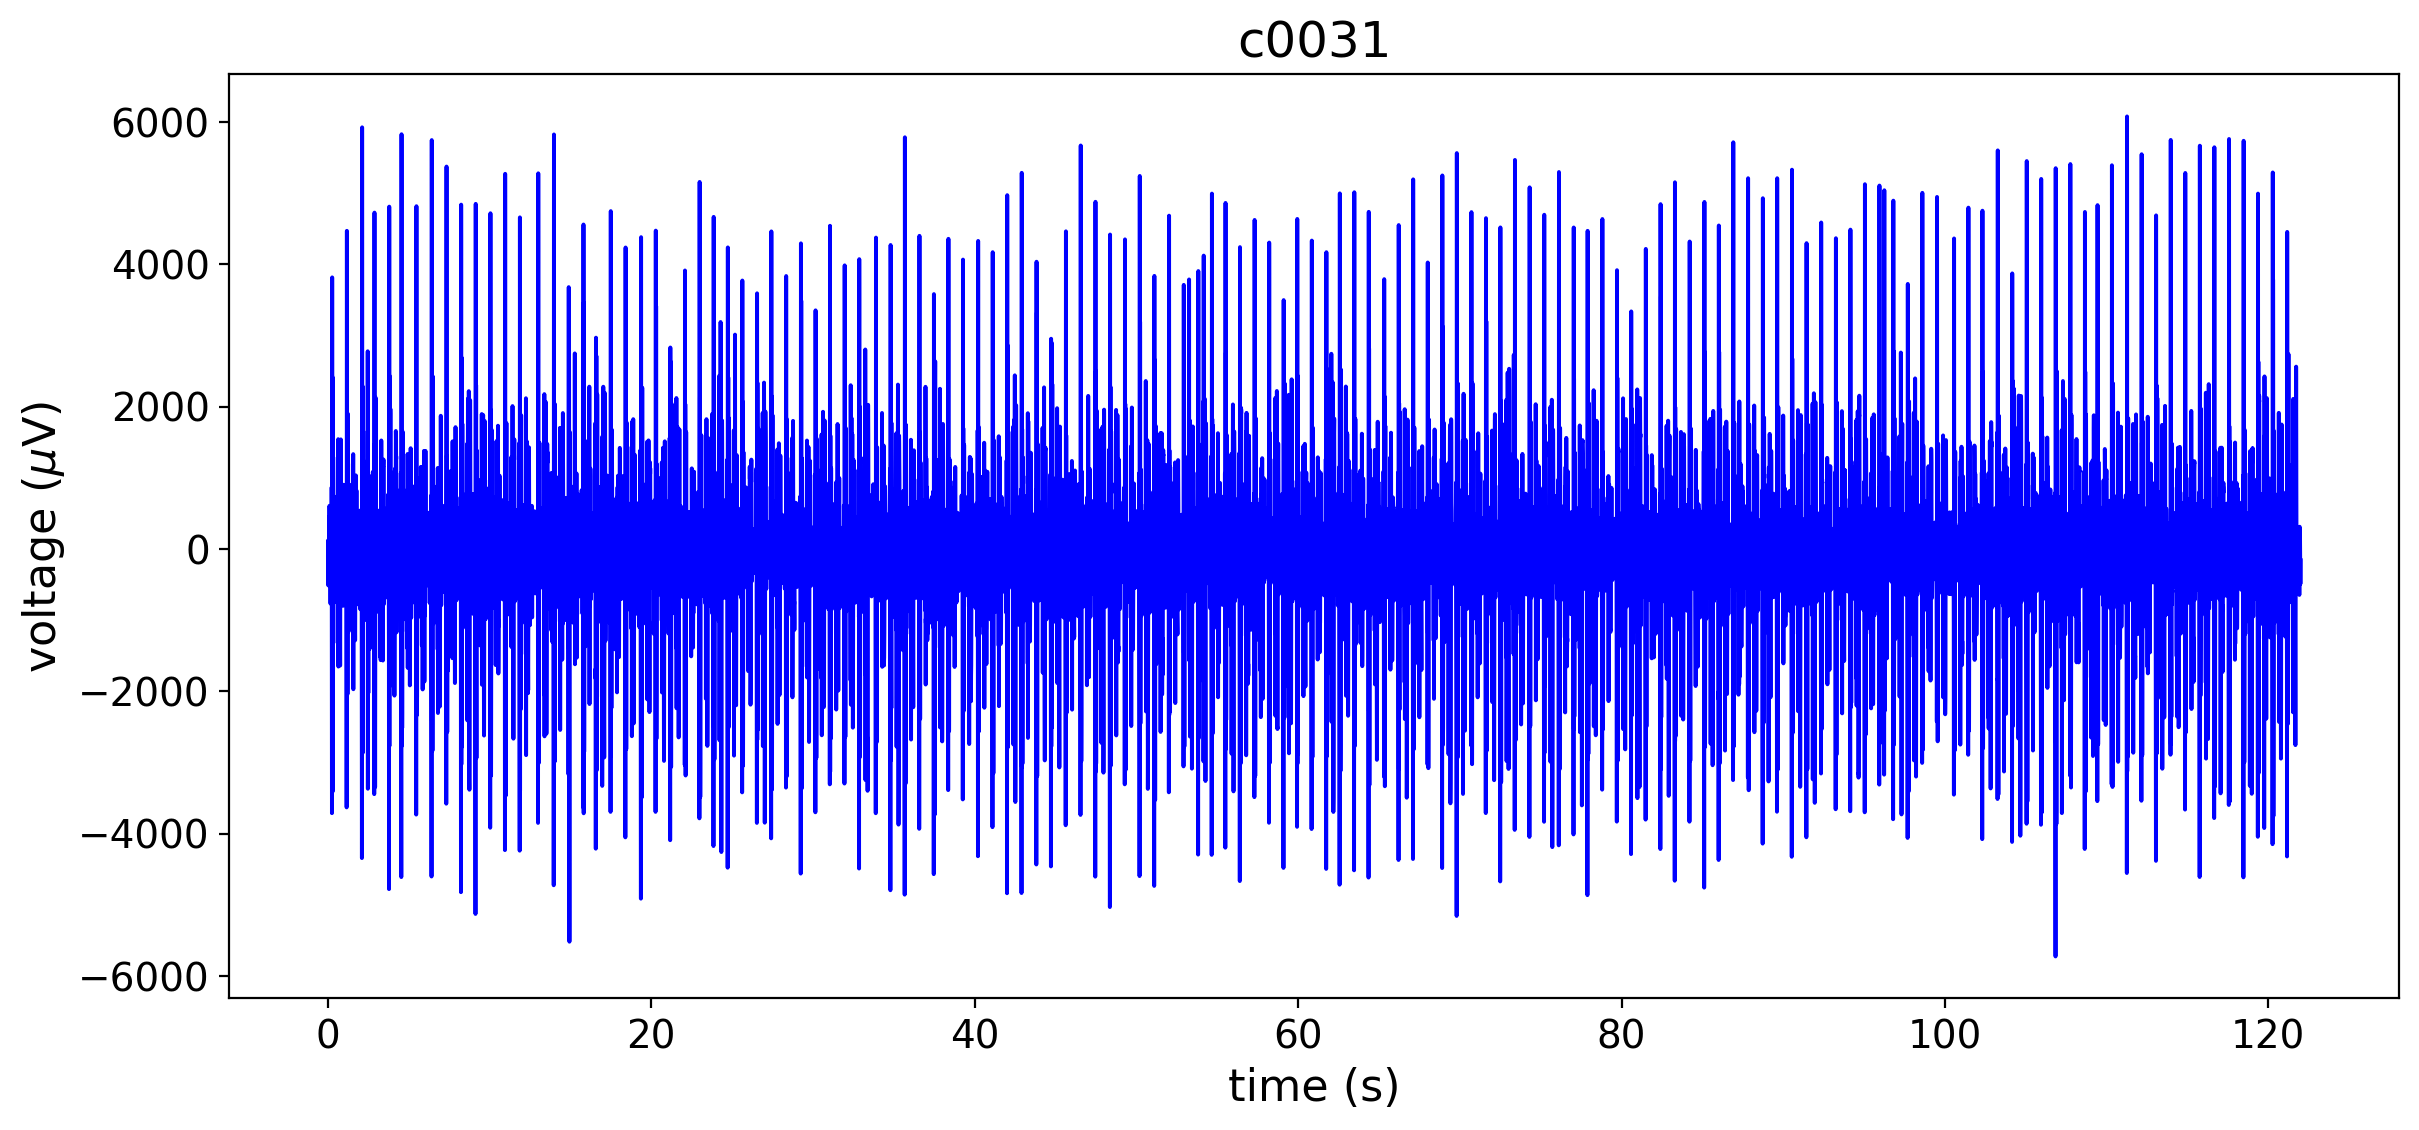

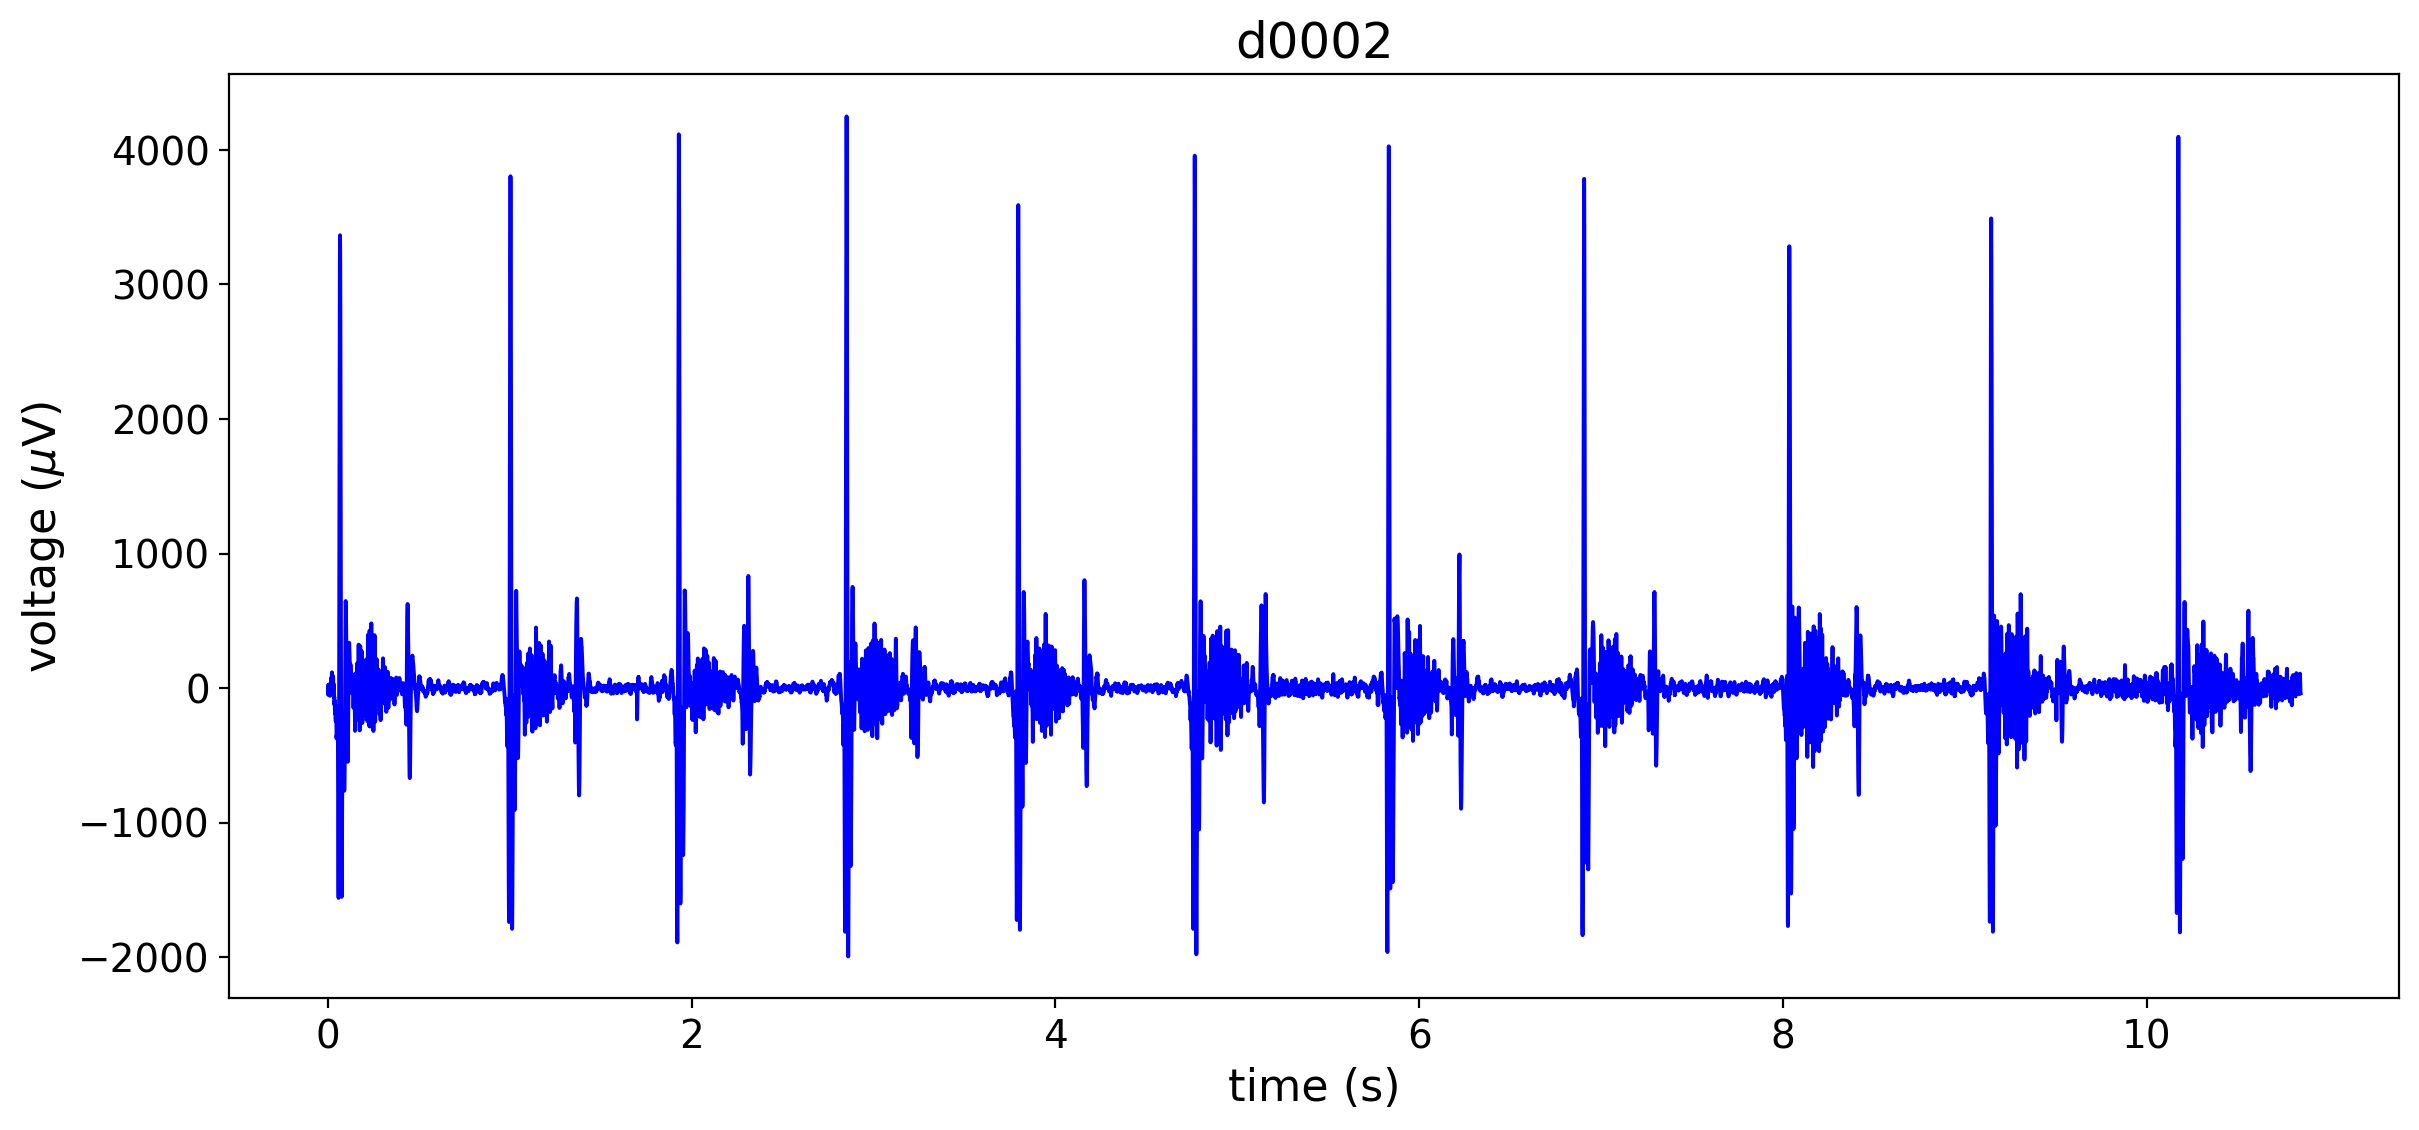

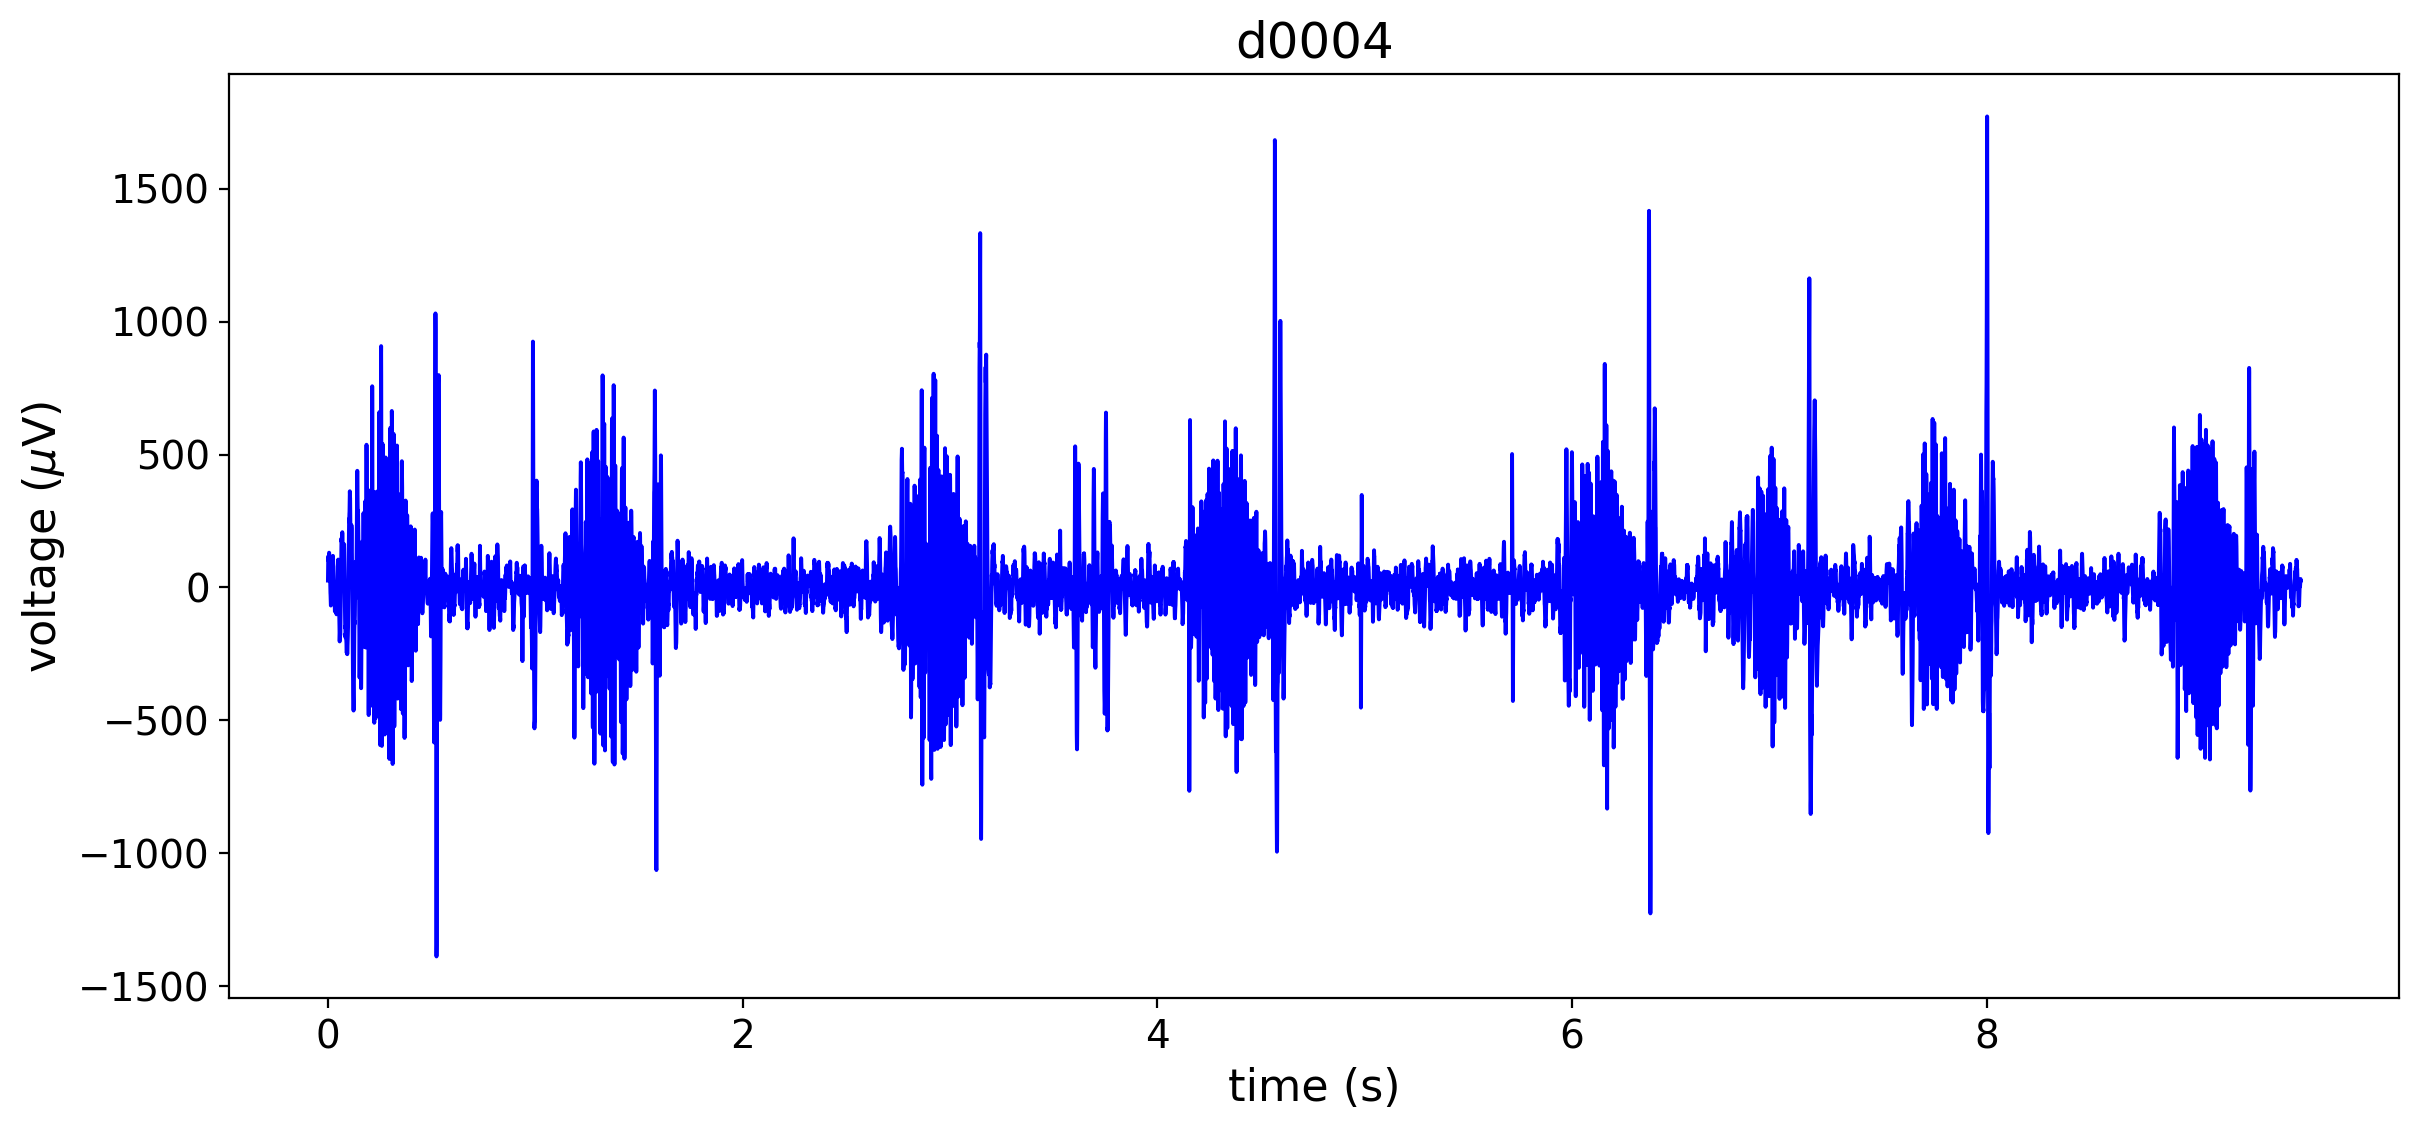

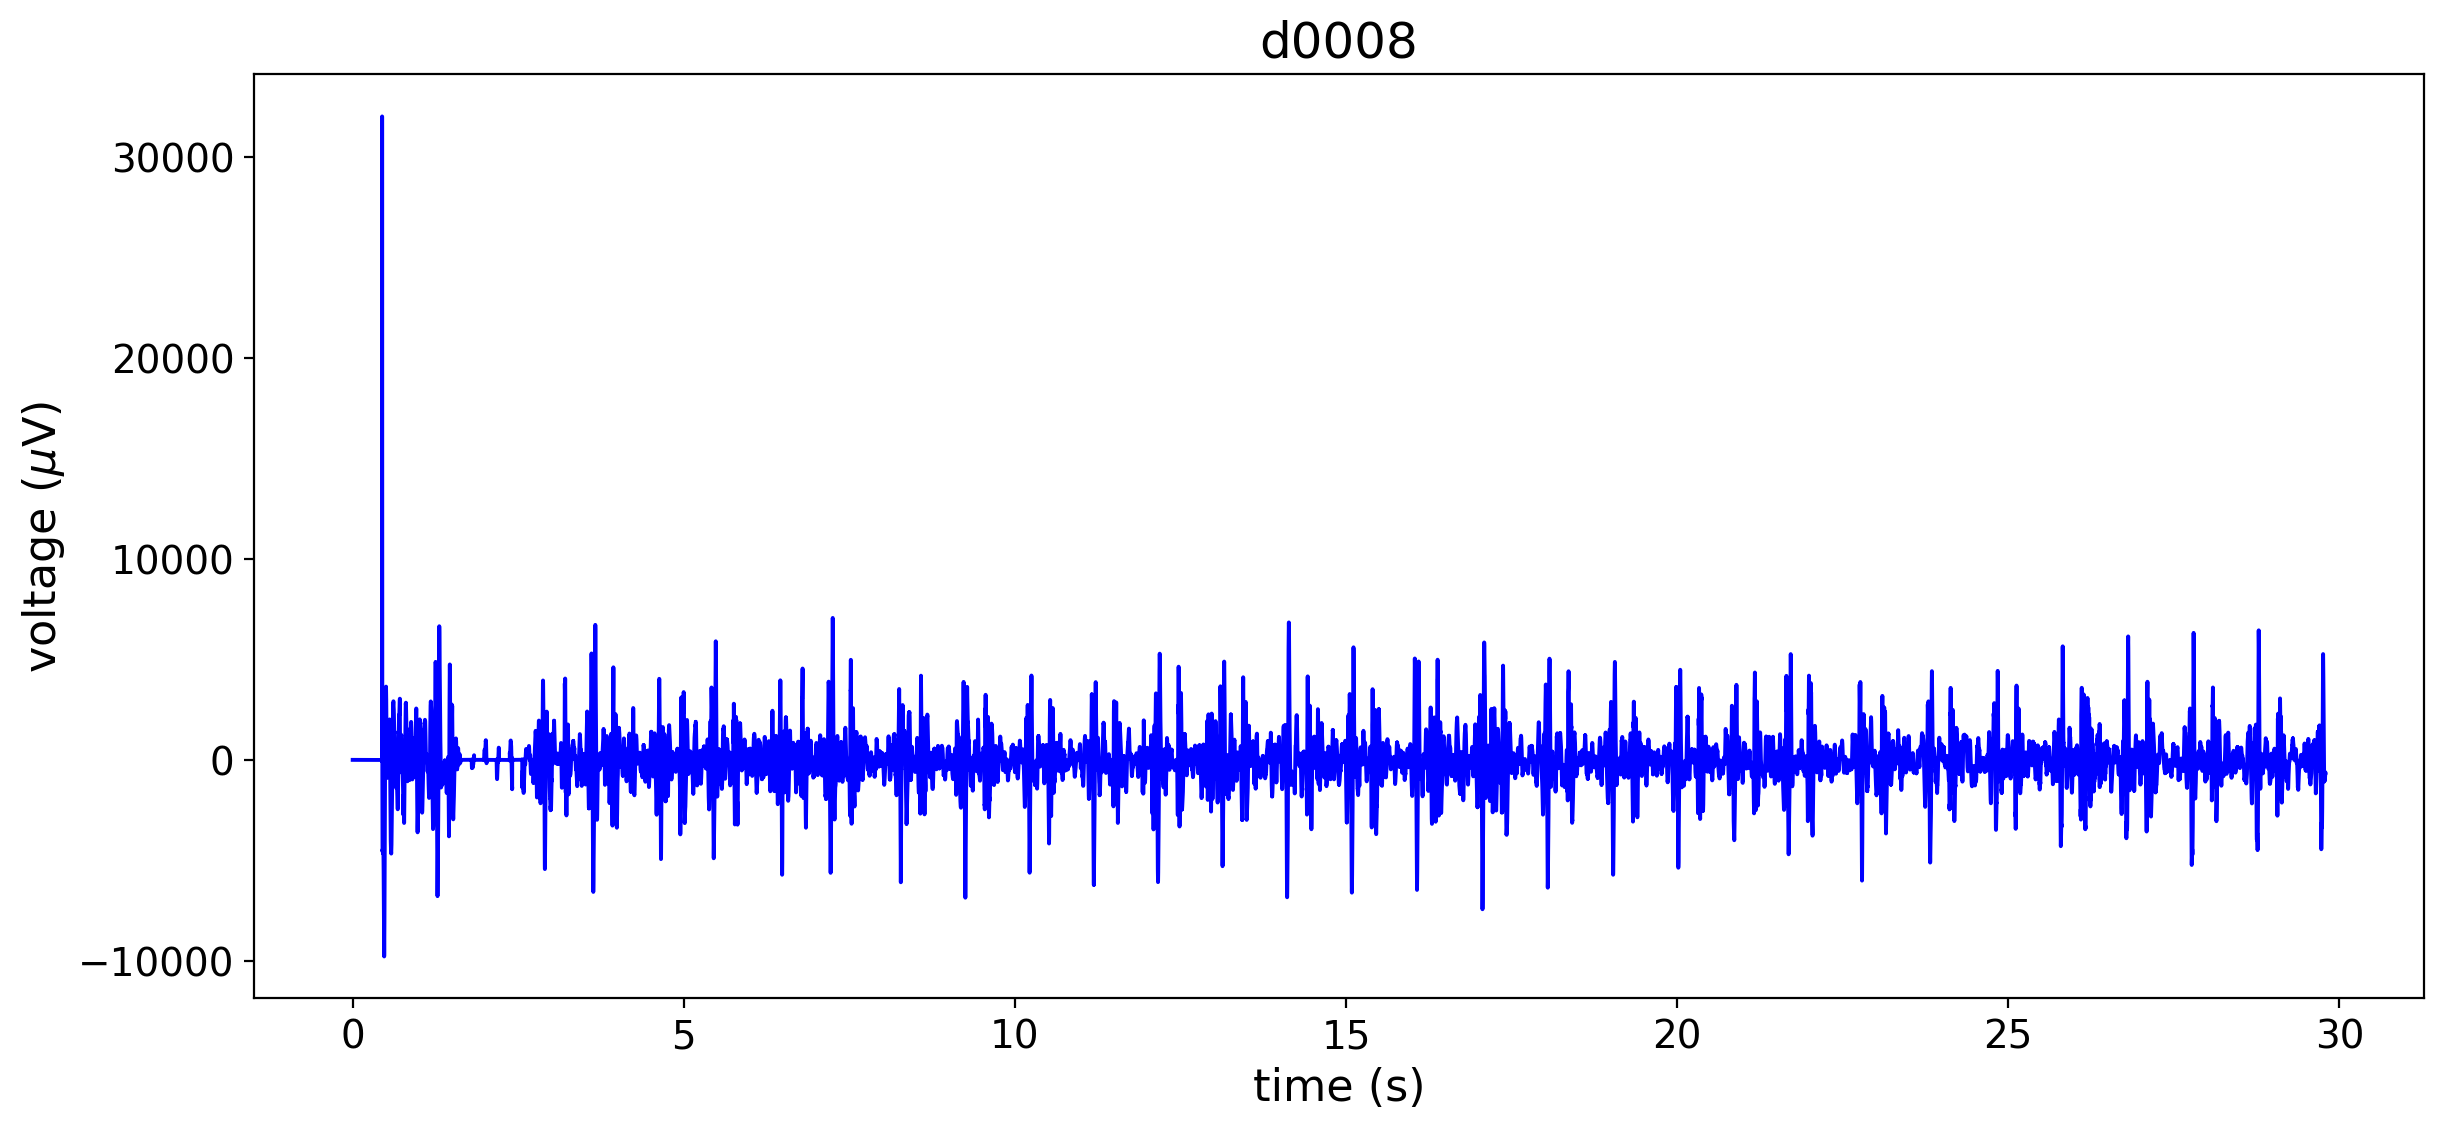

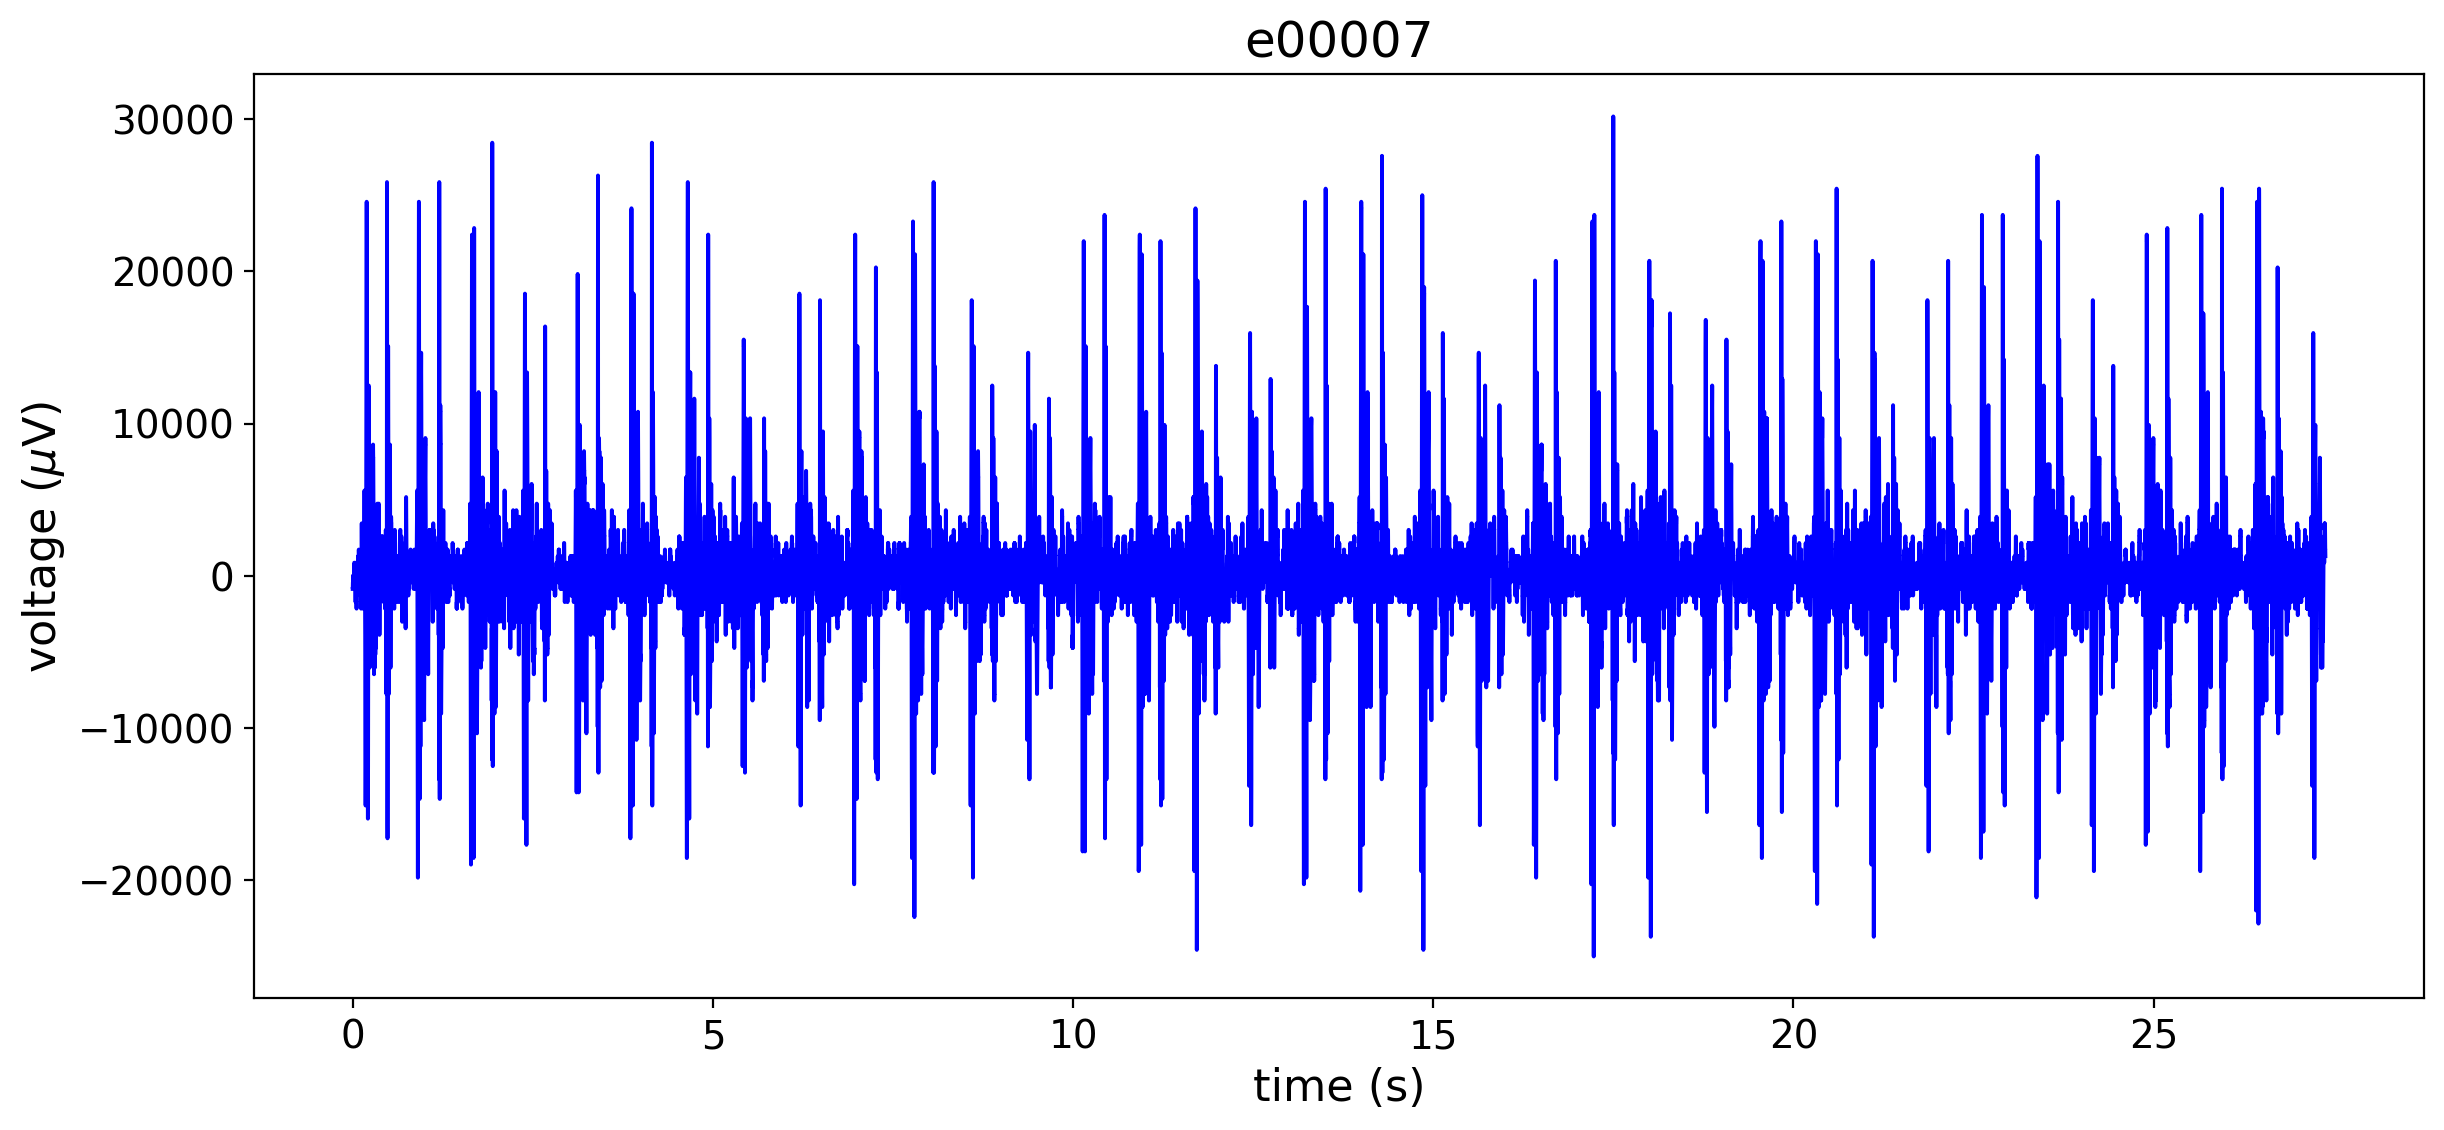

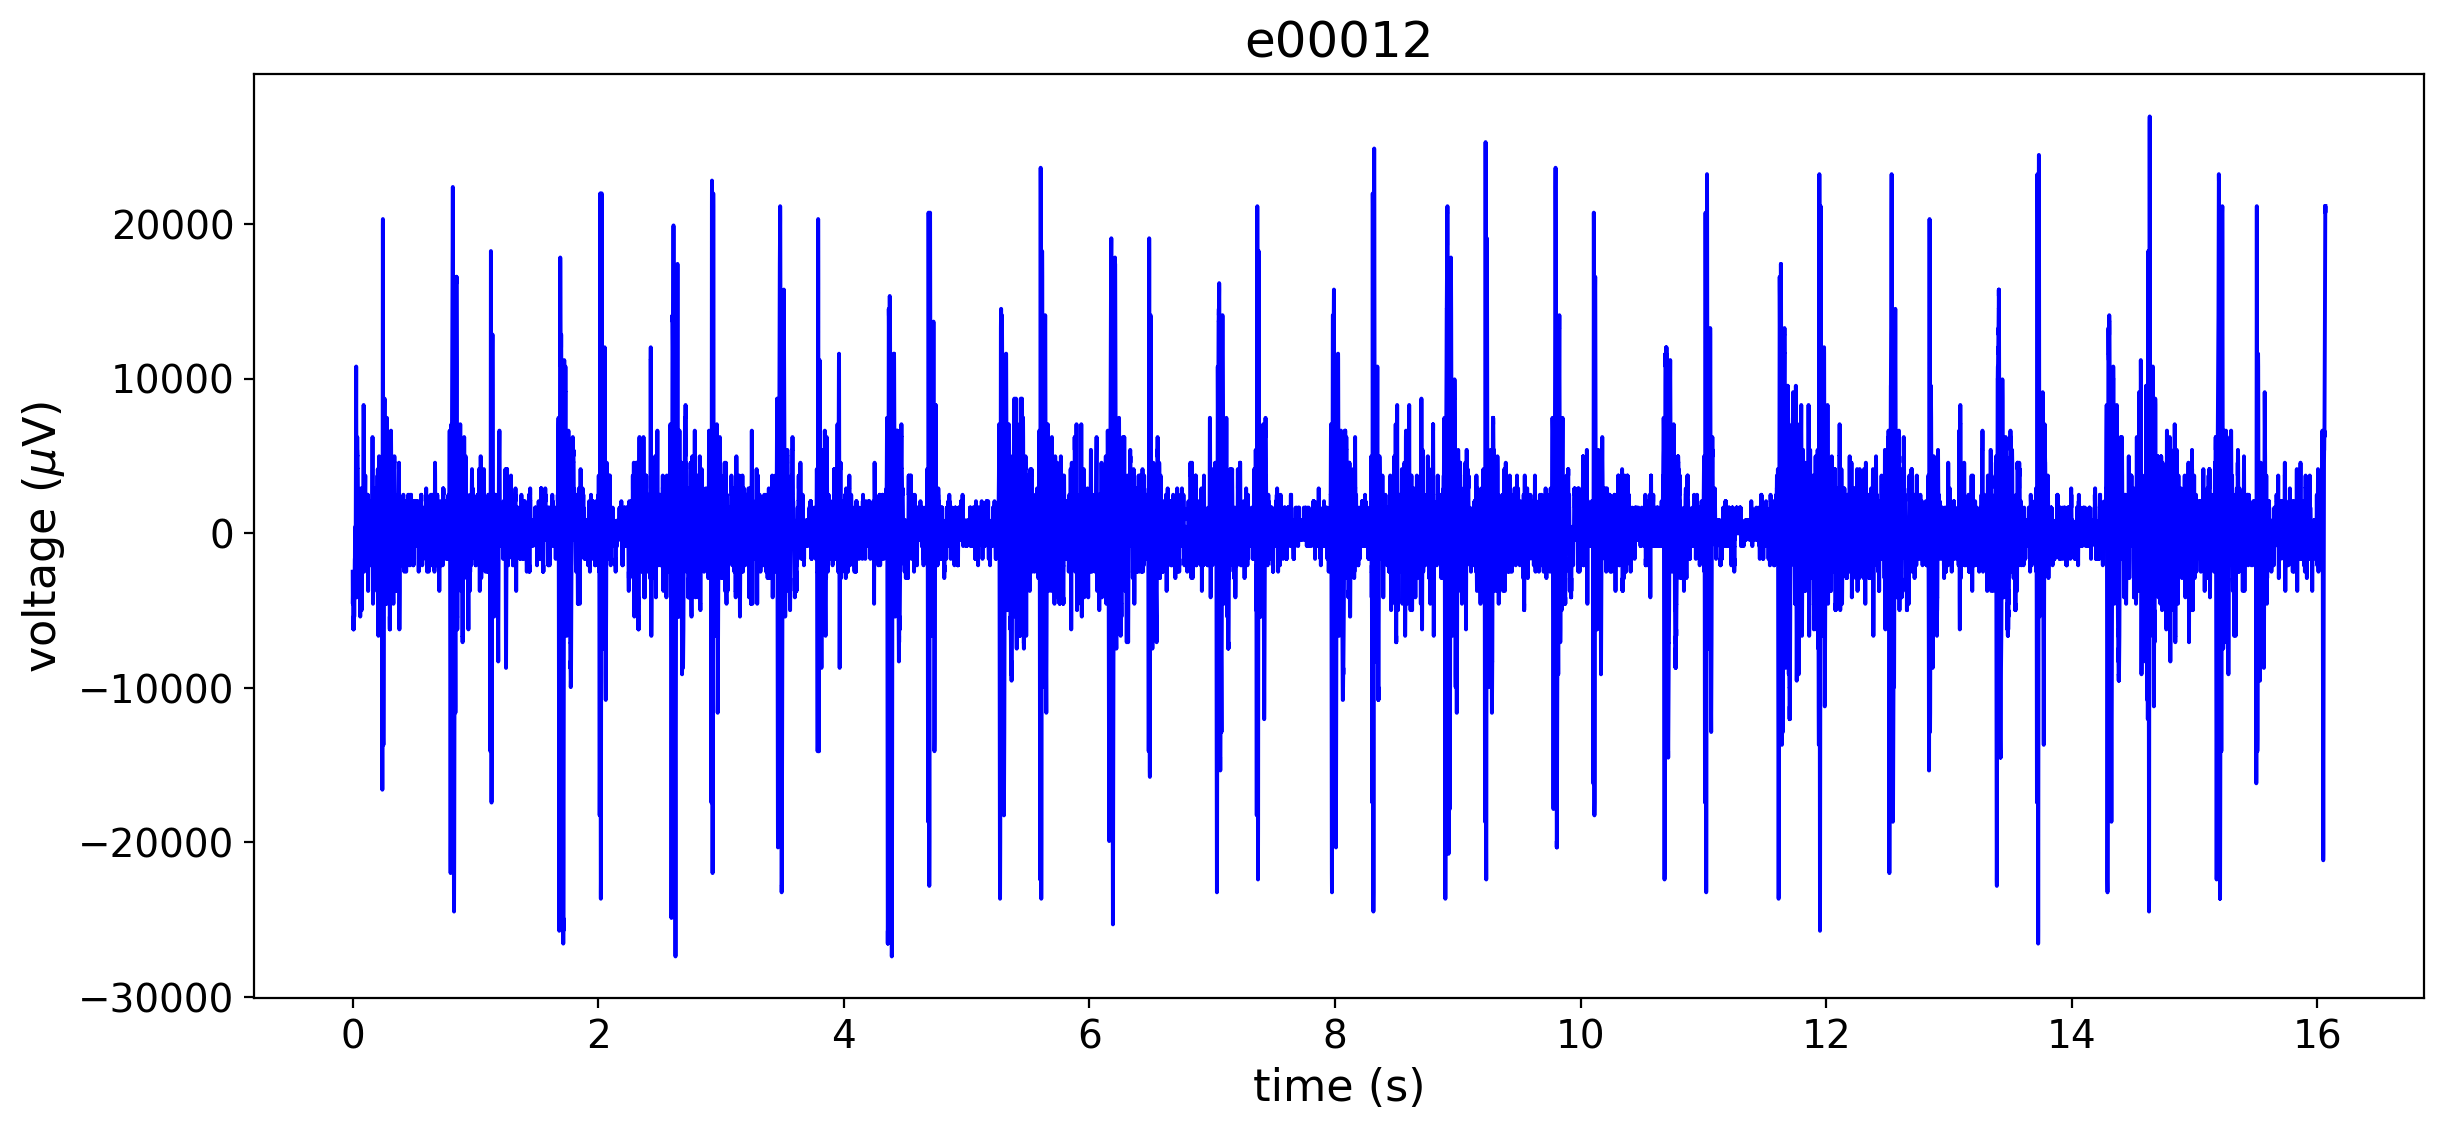

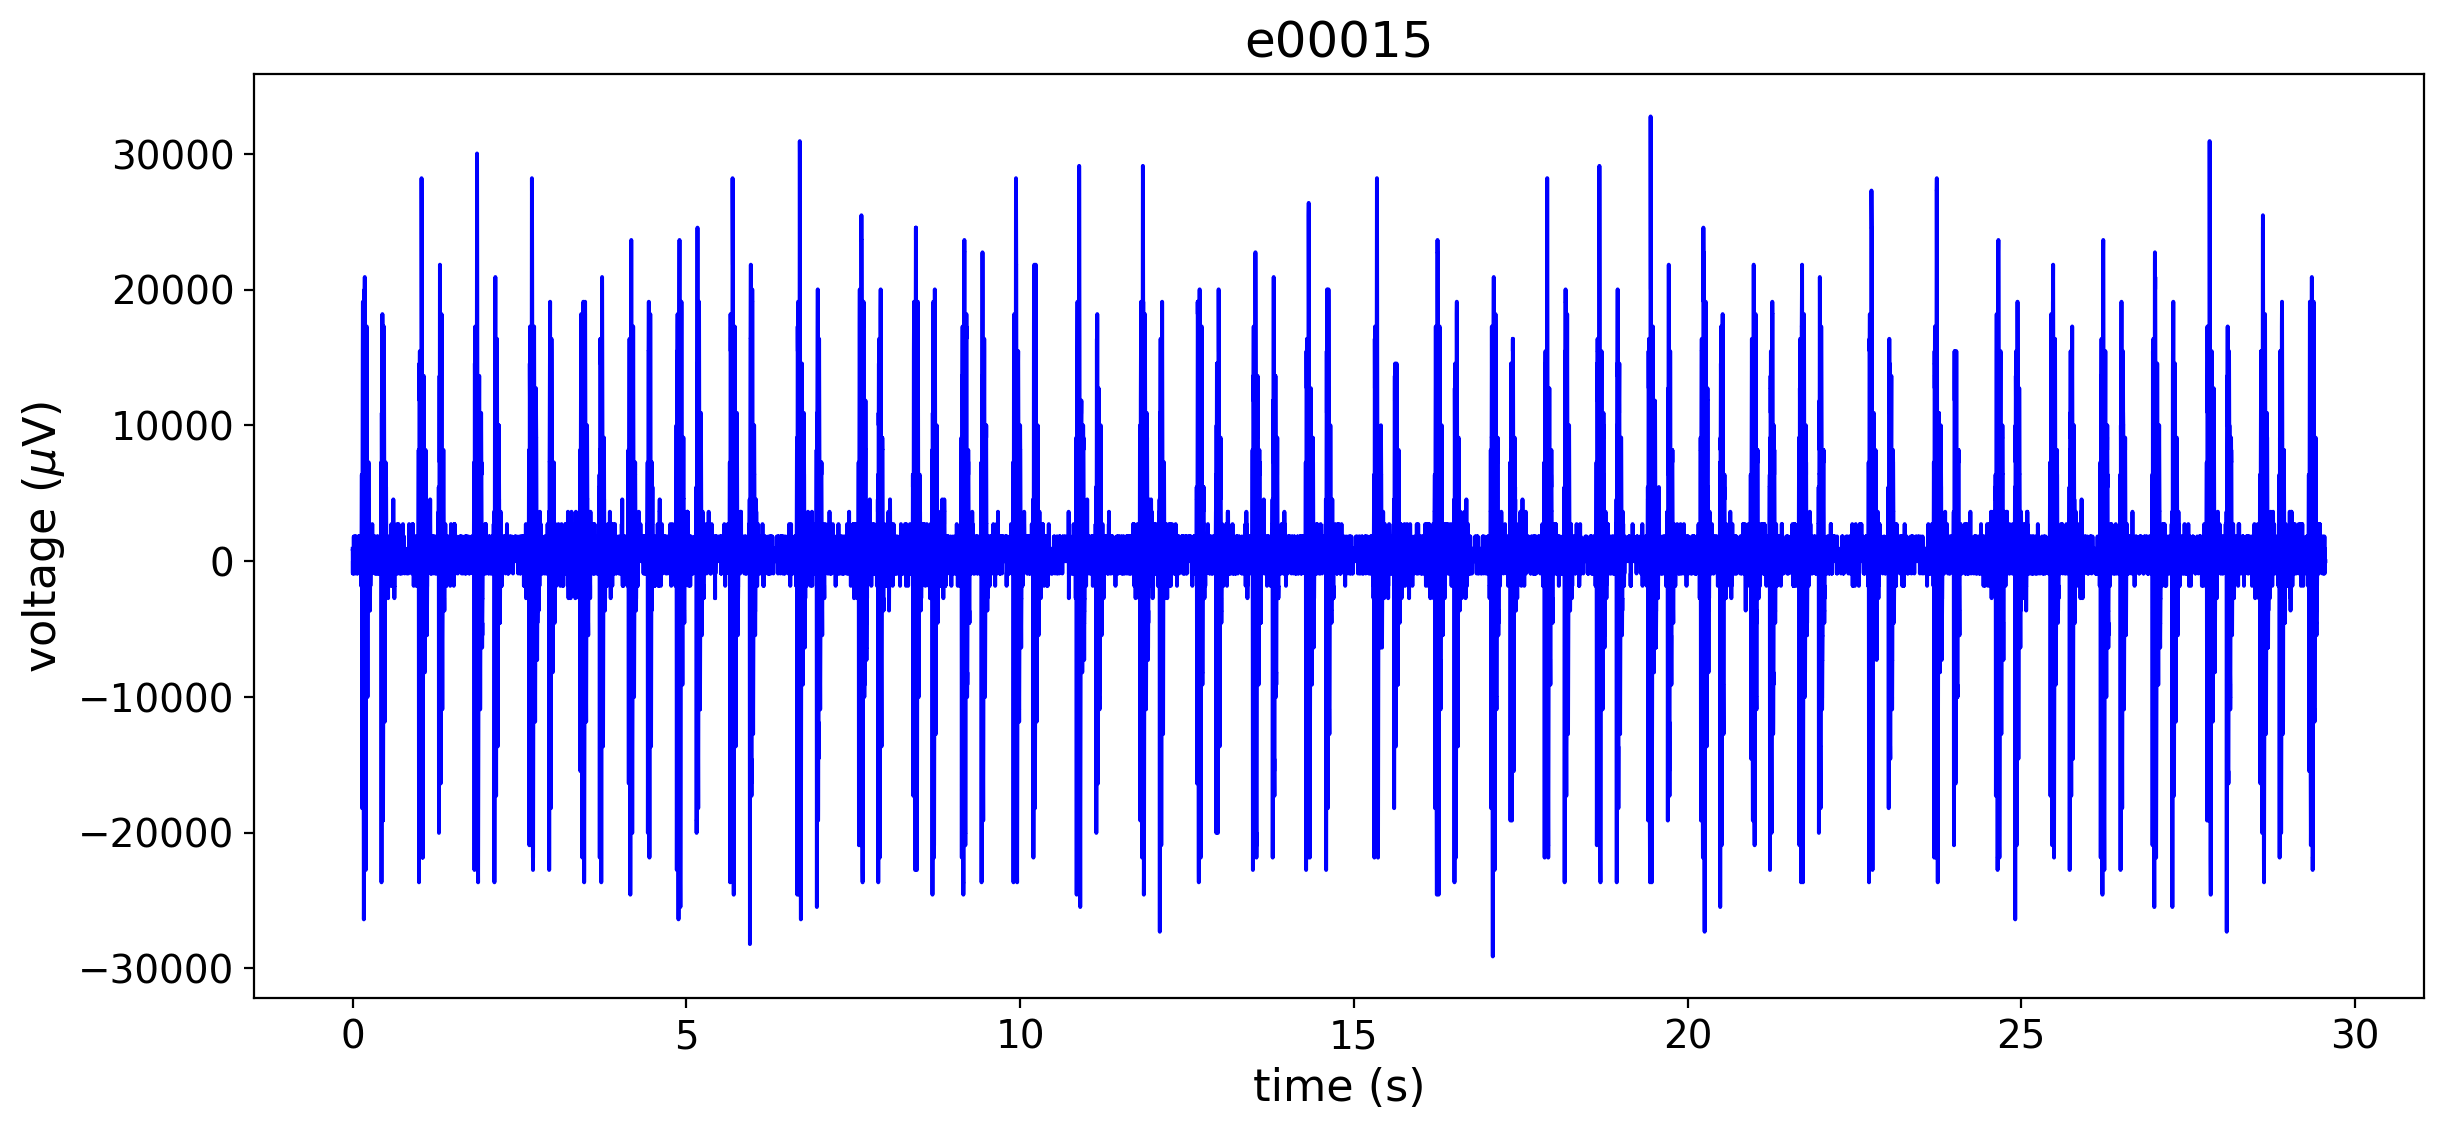

In [ ]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(14,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()

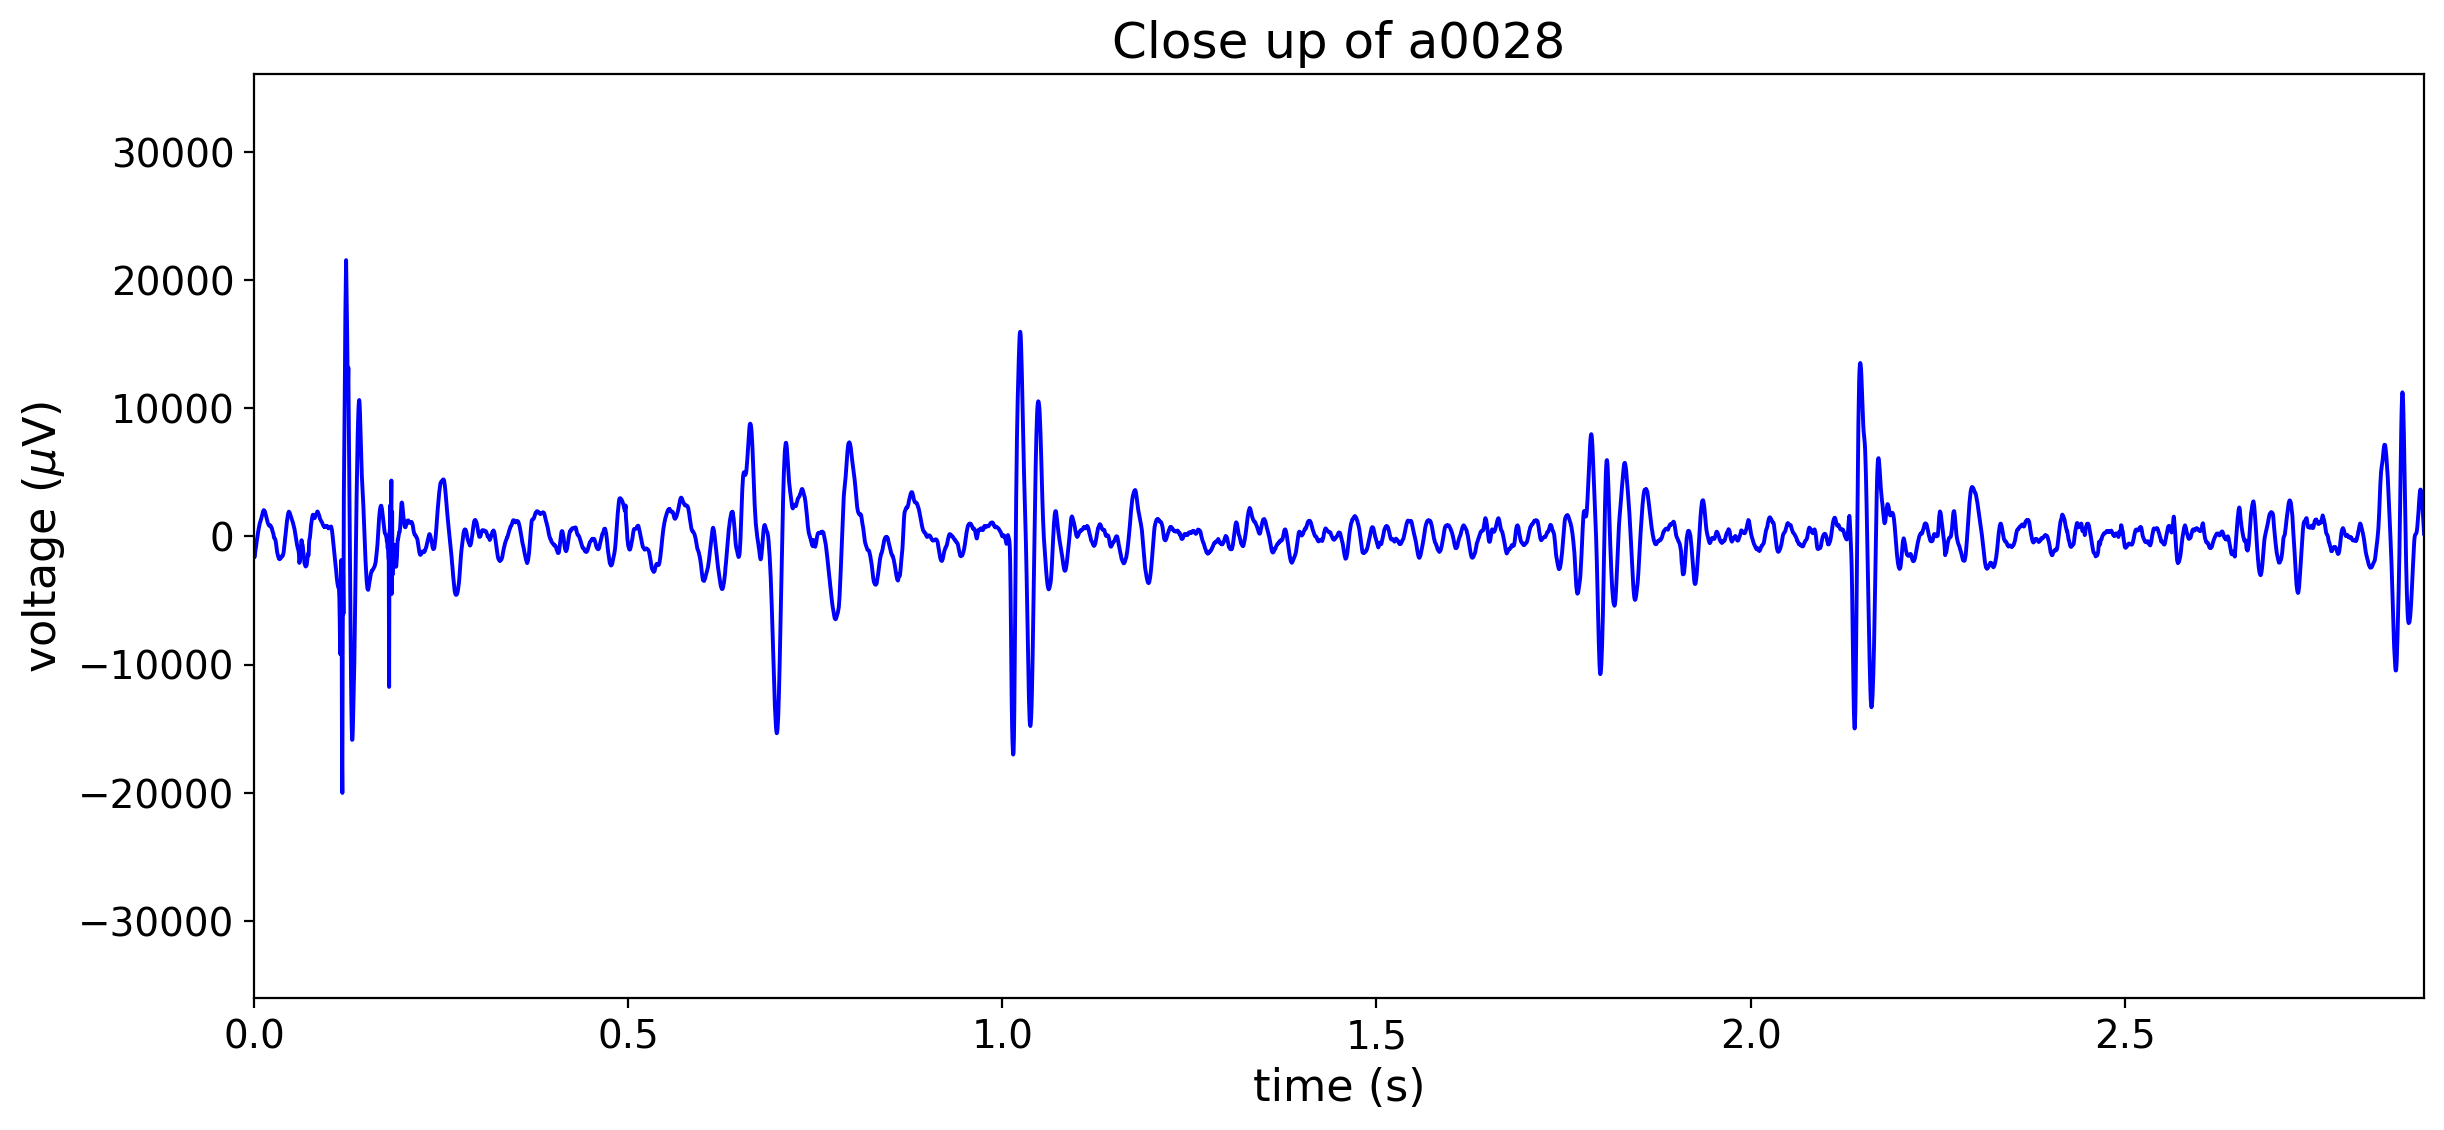

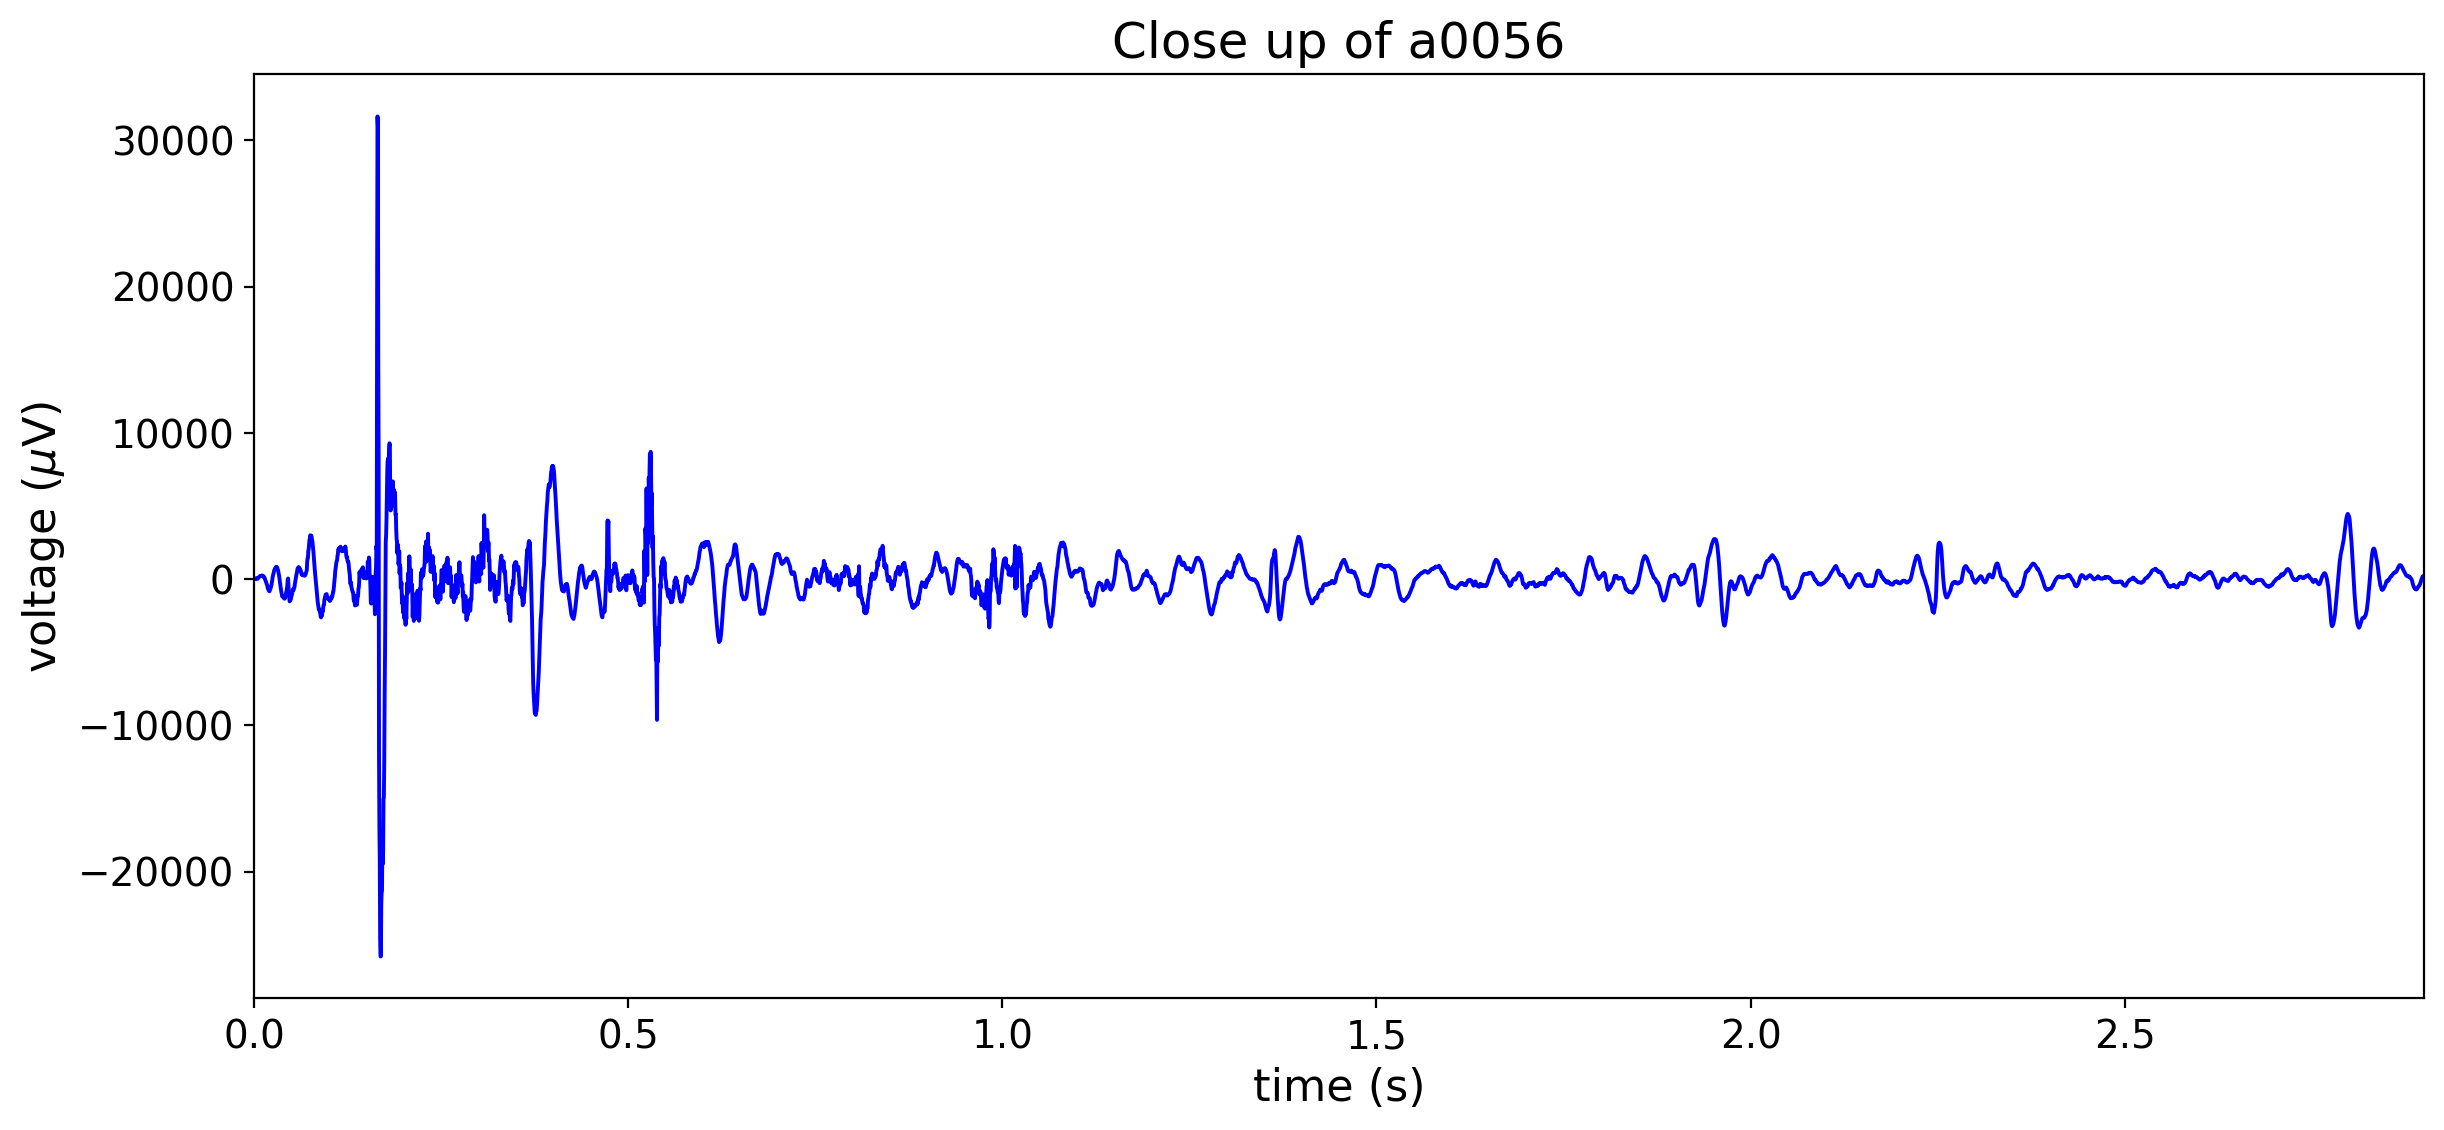

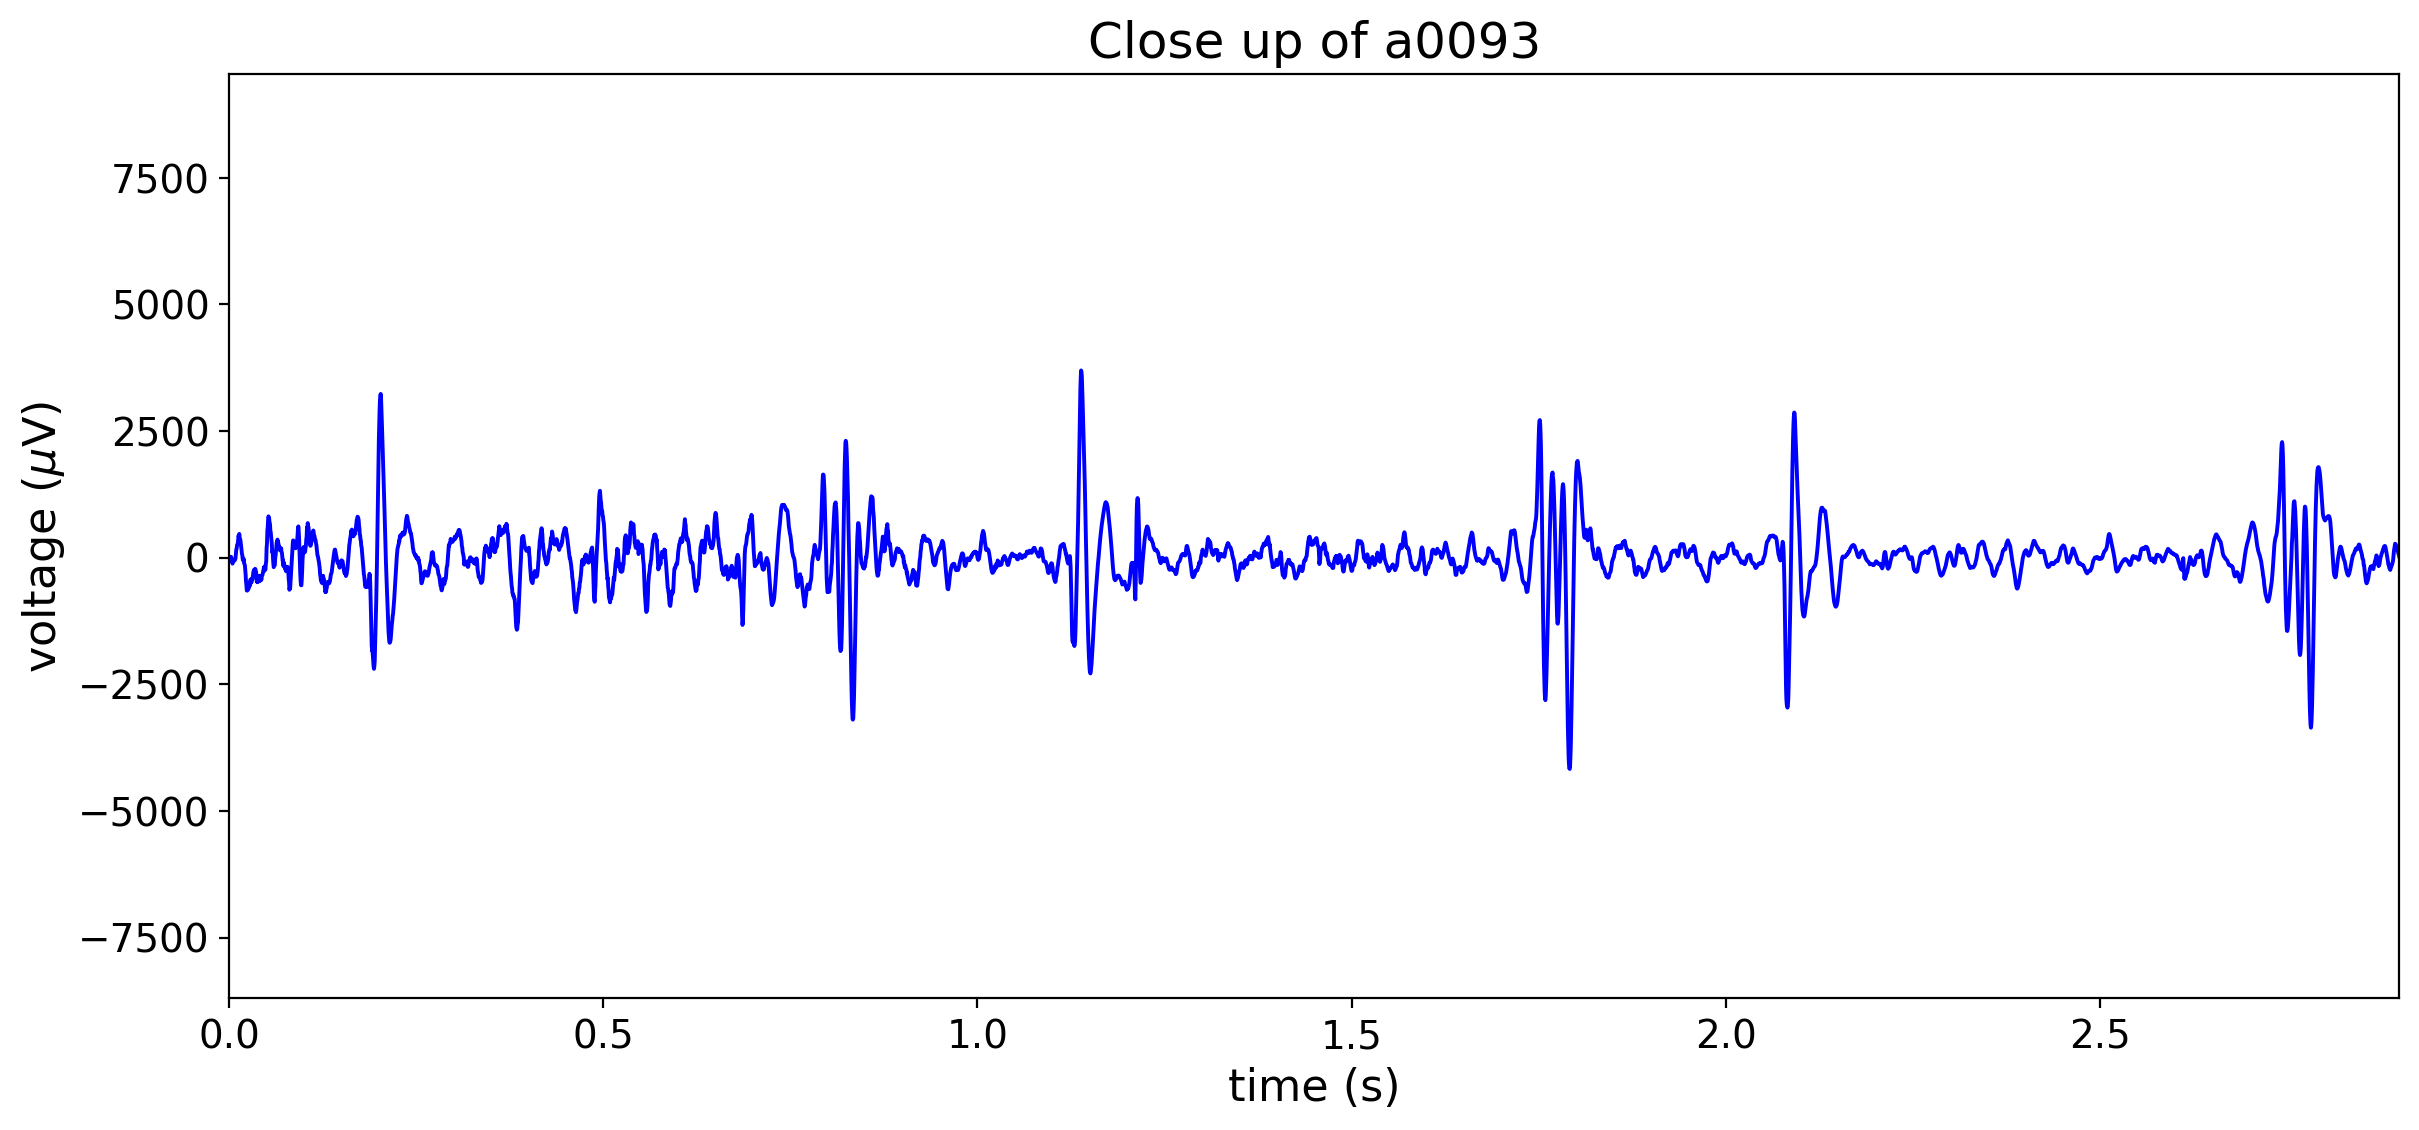

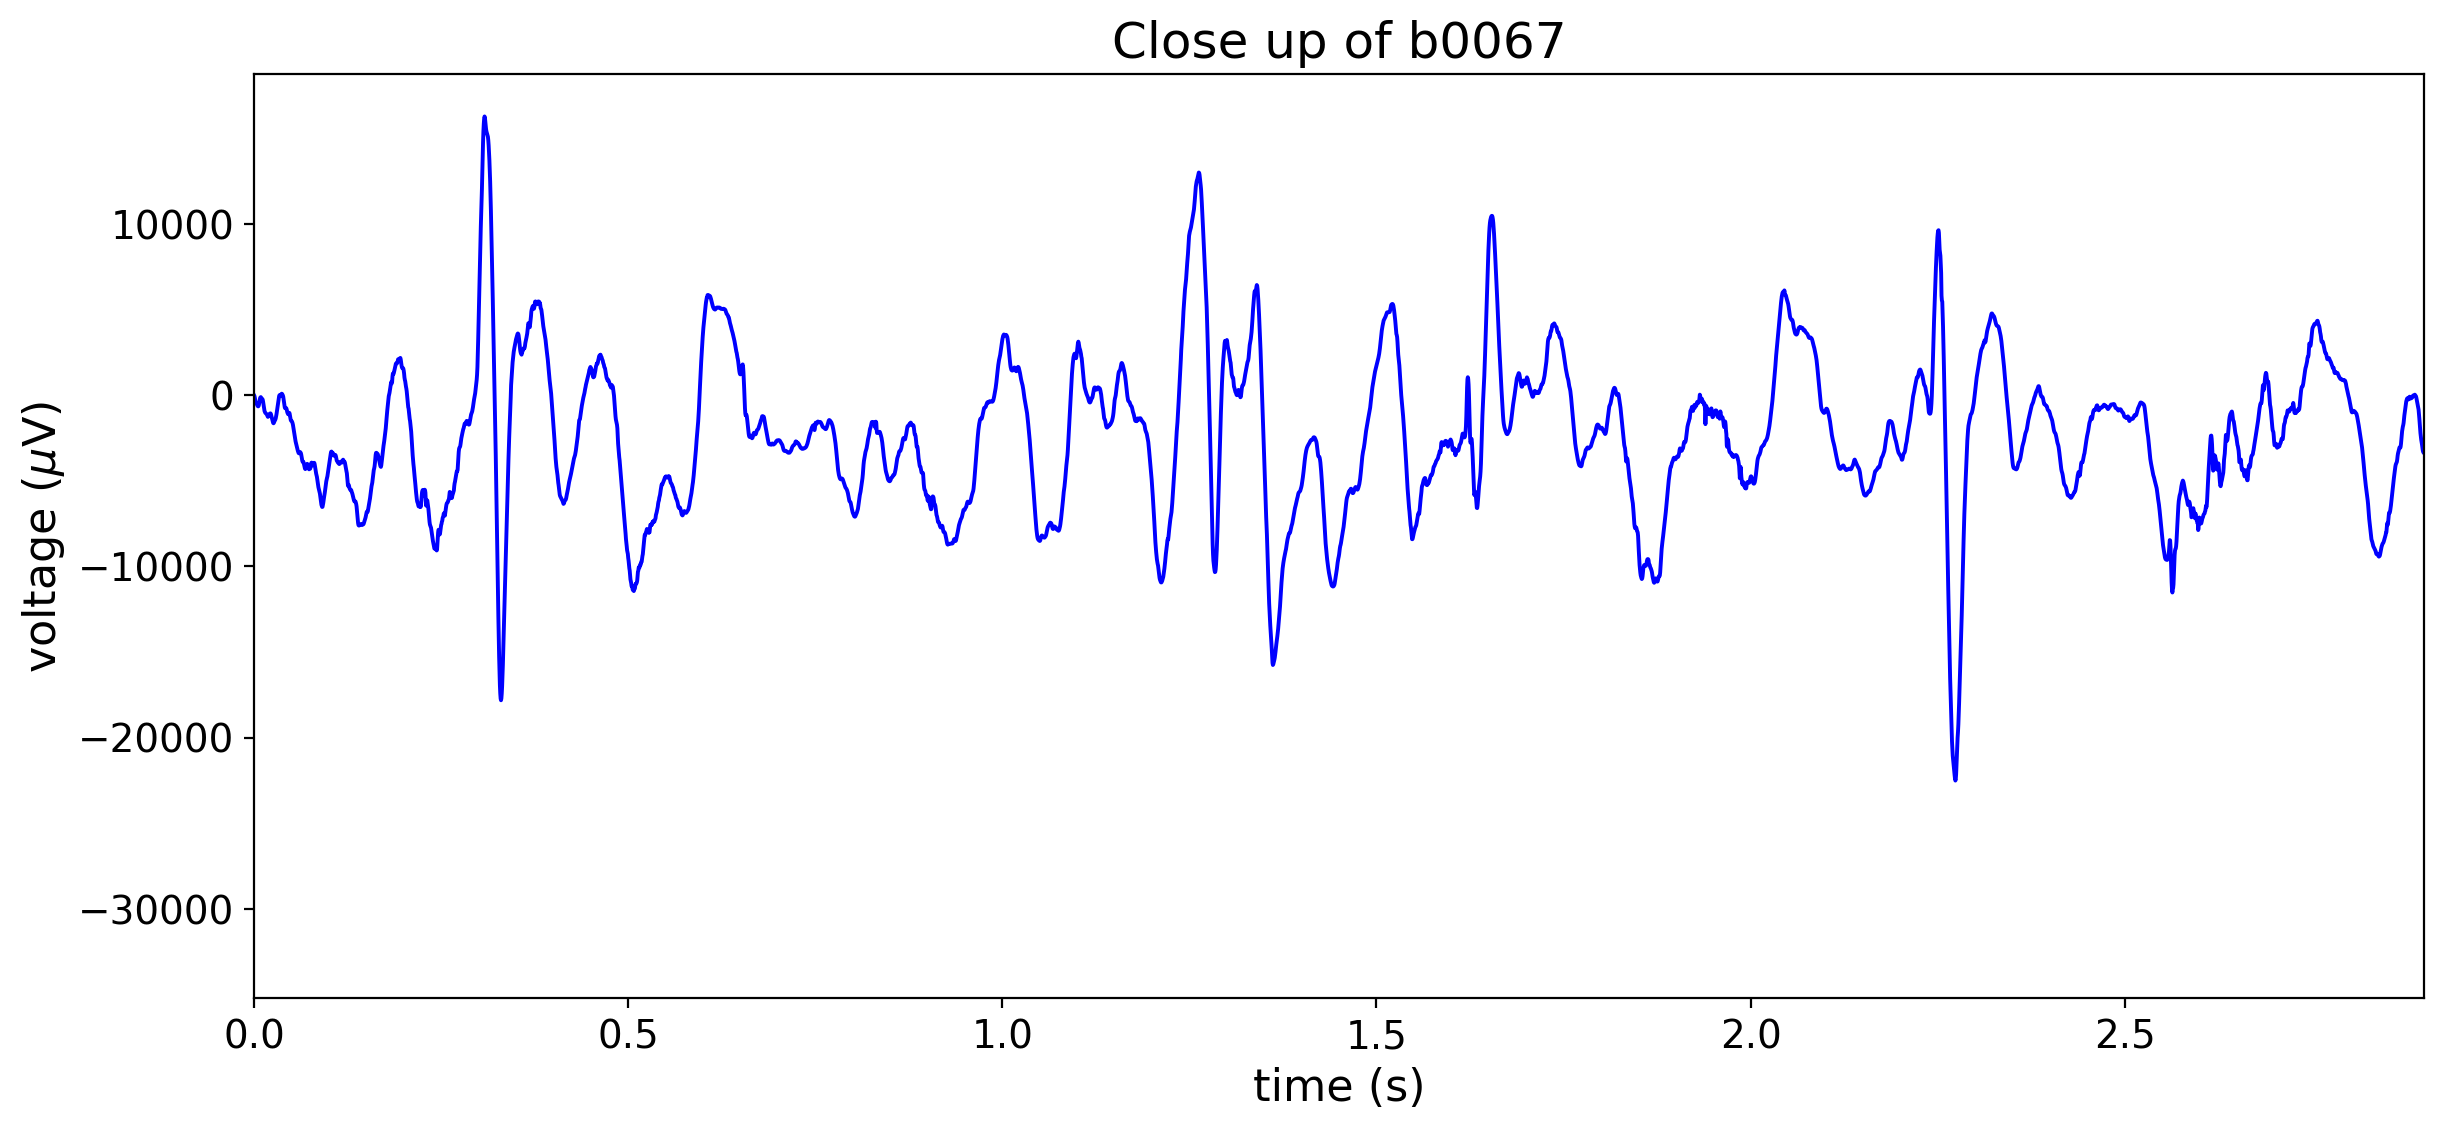

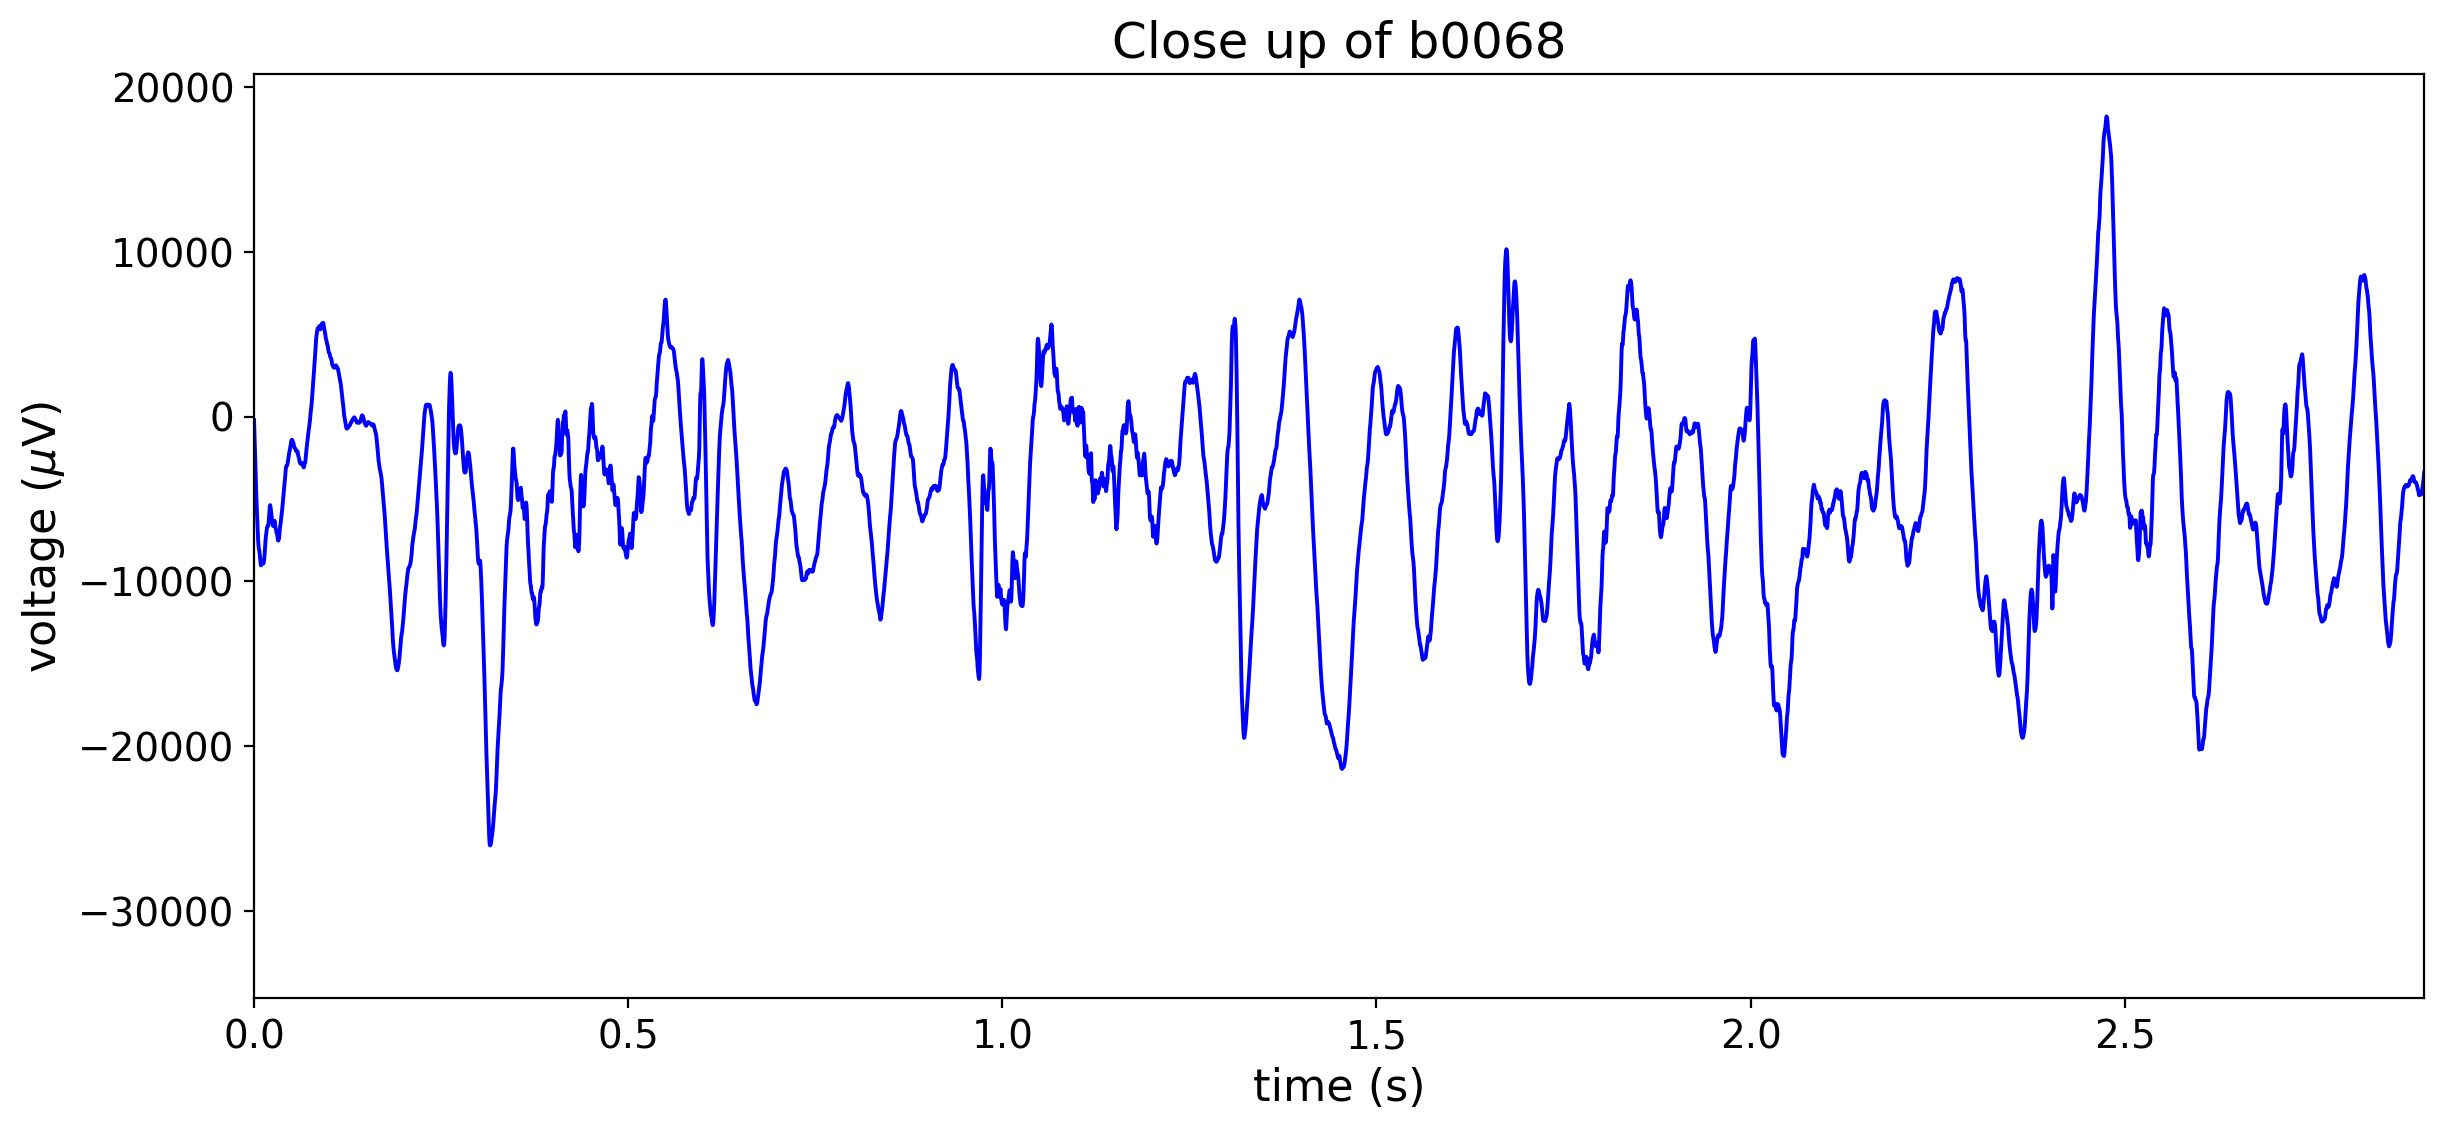

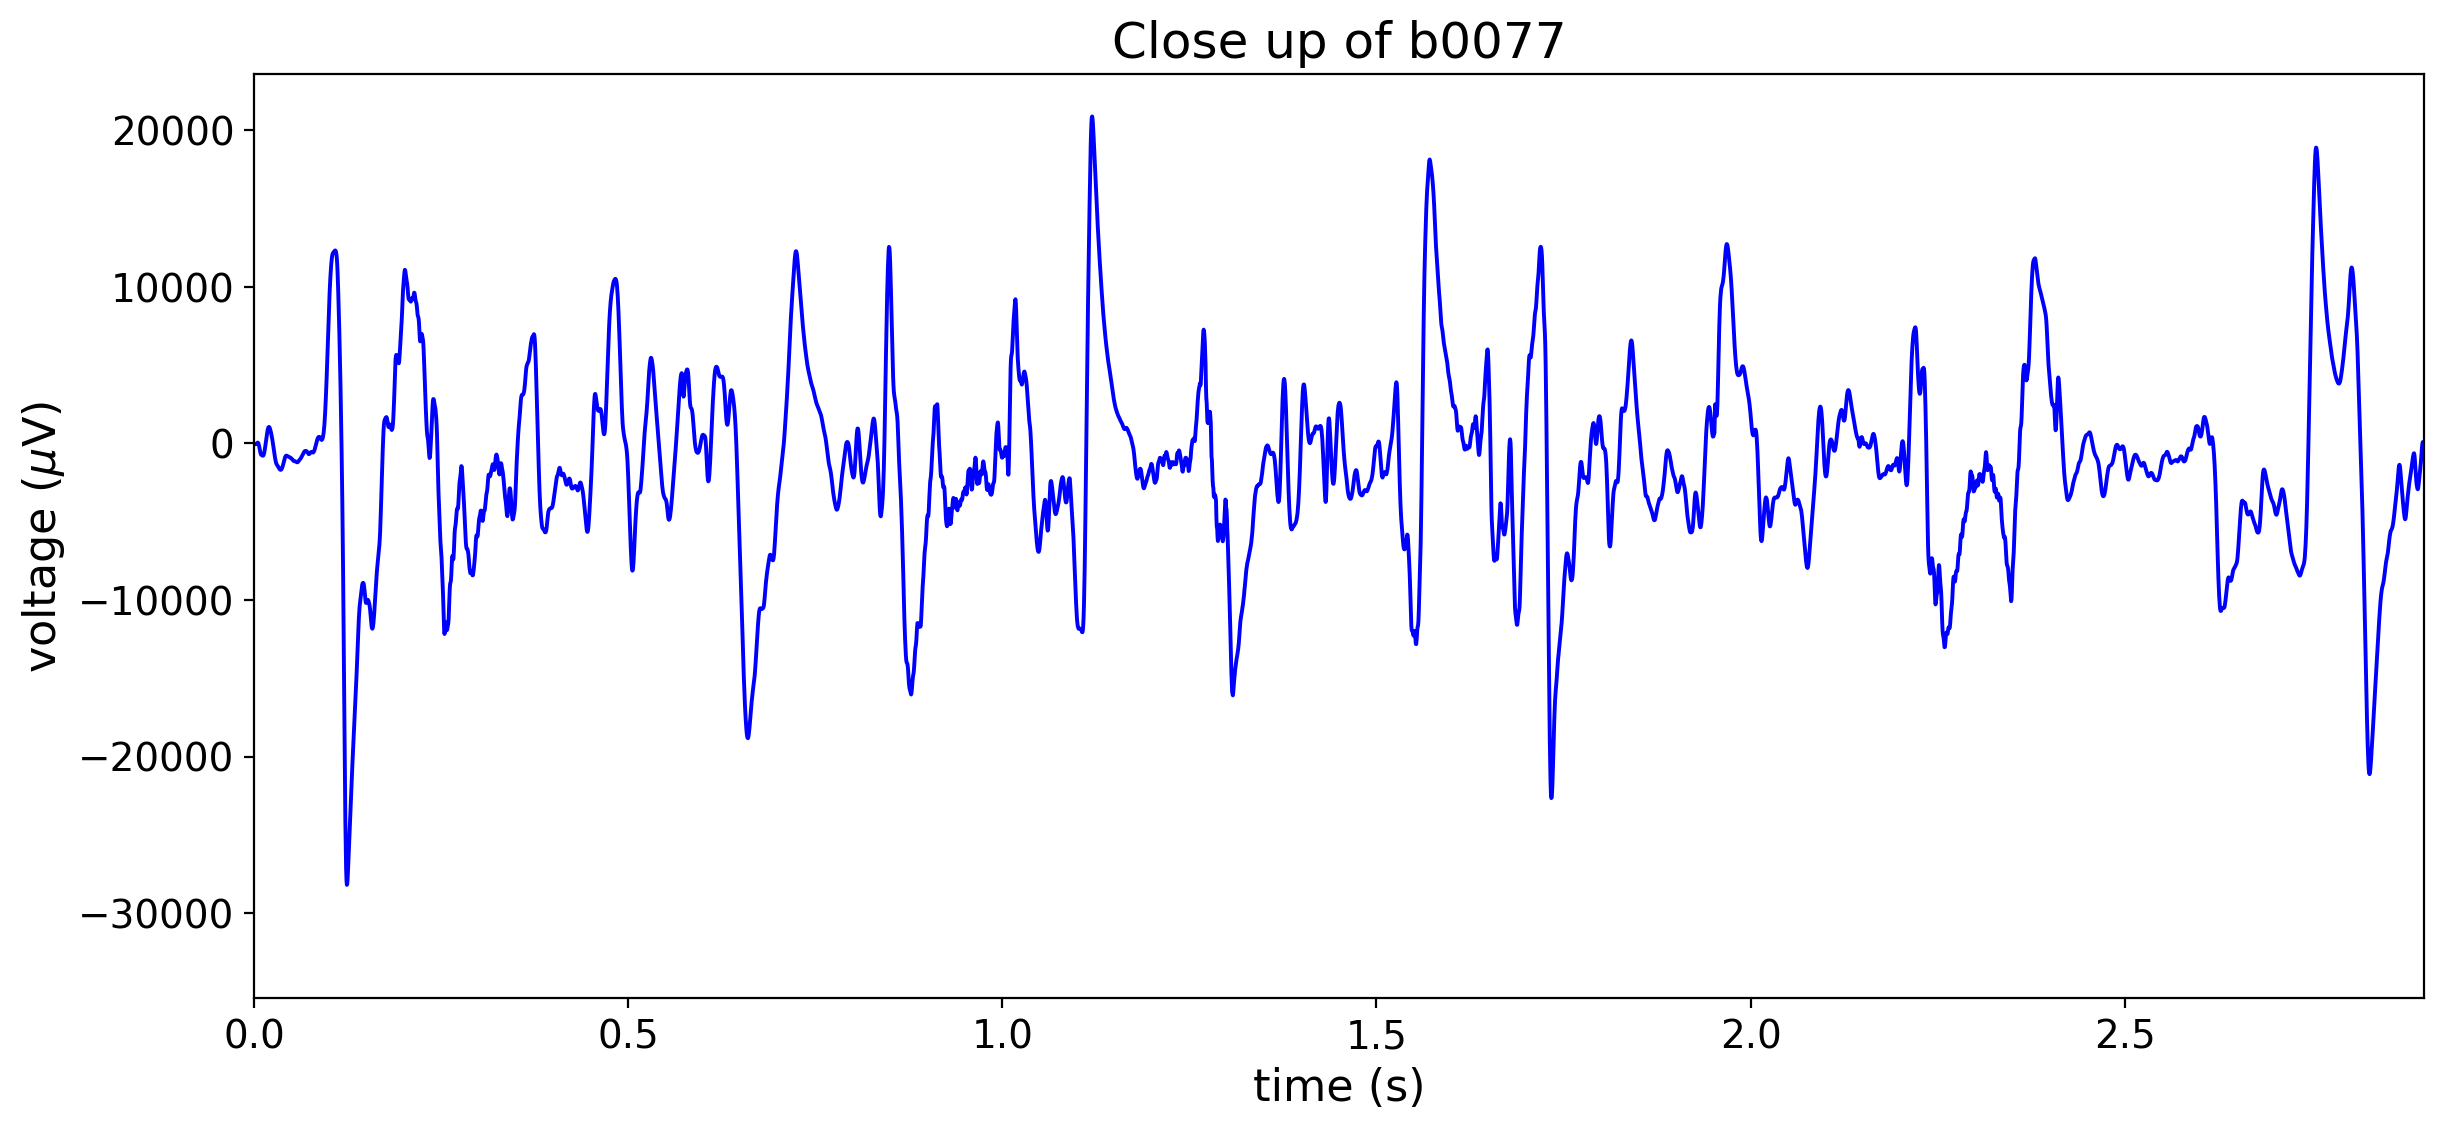

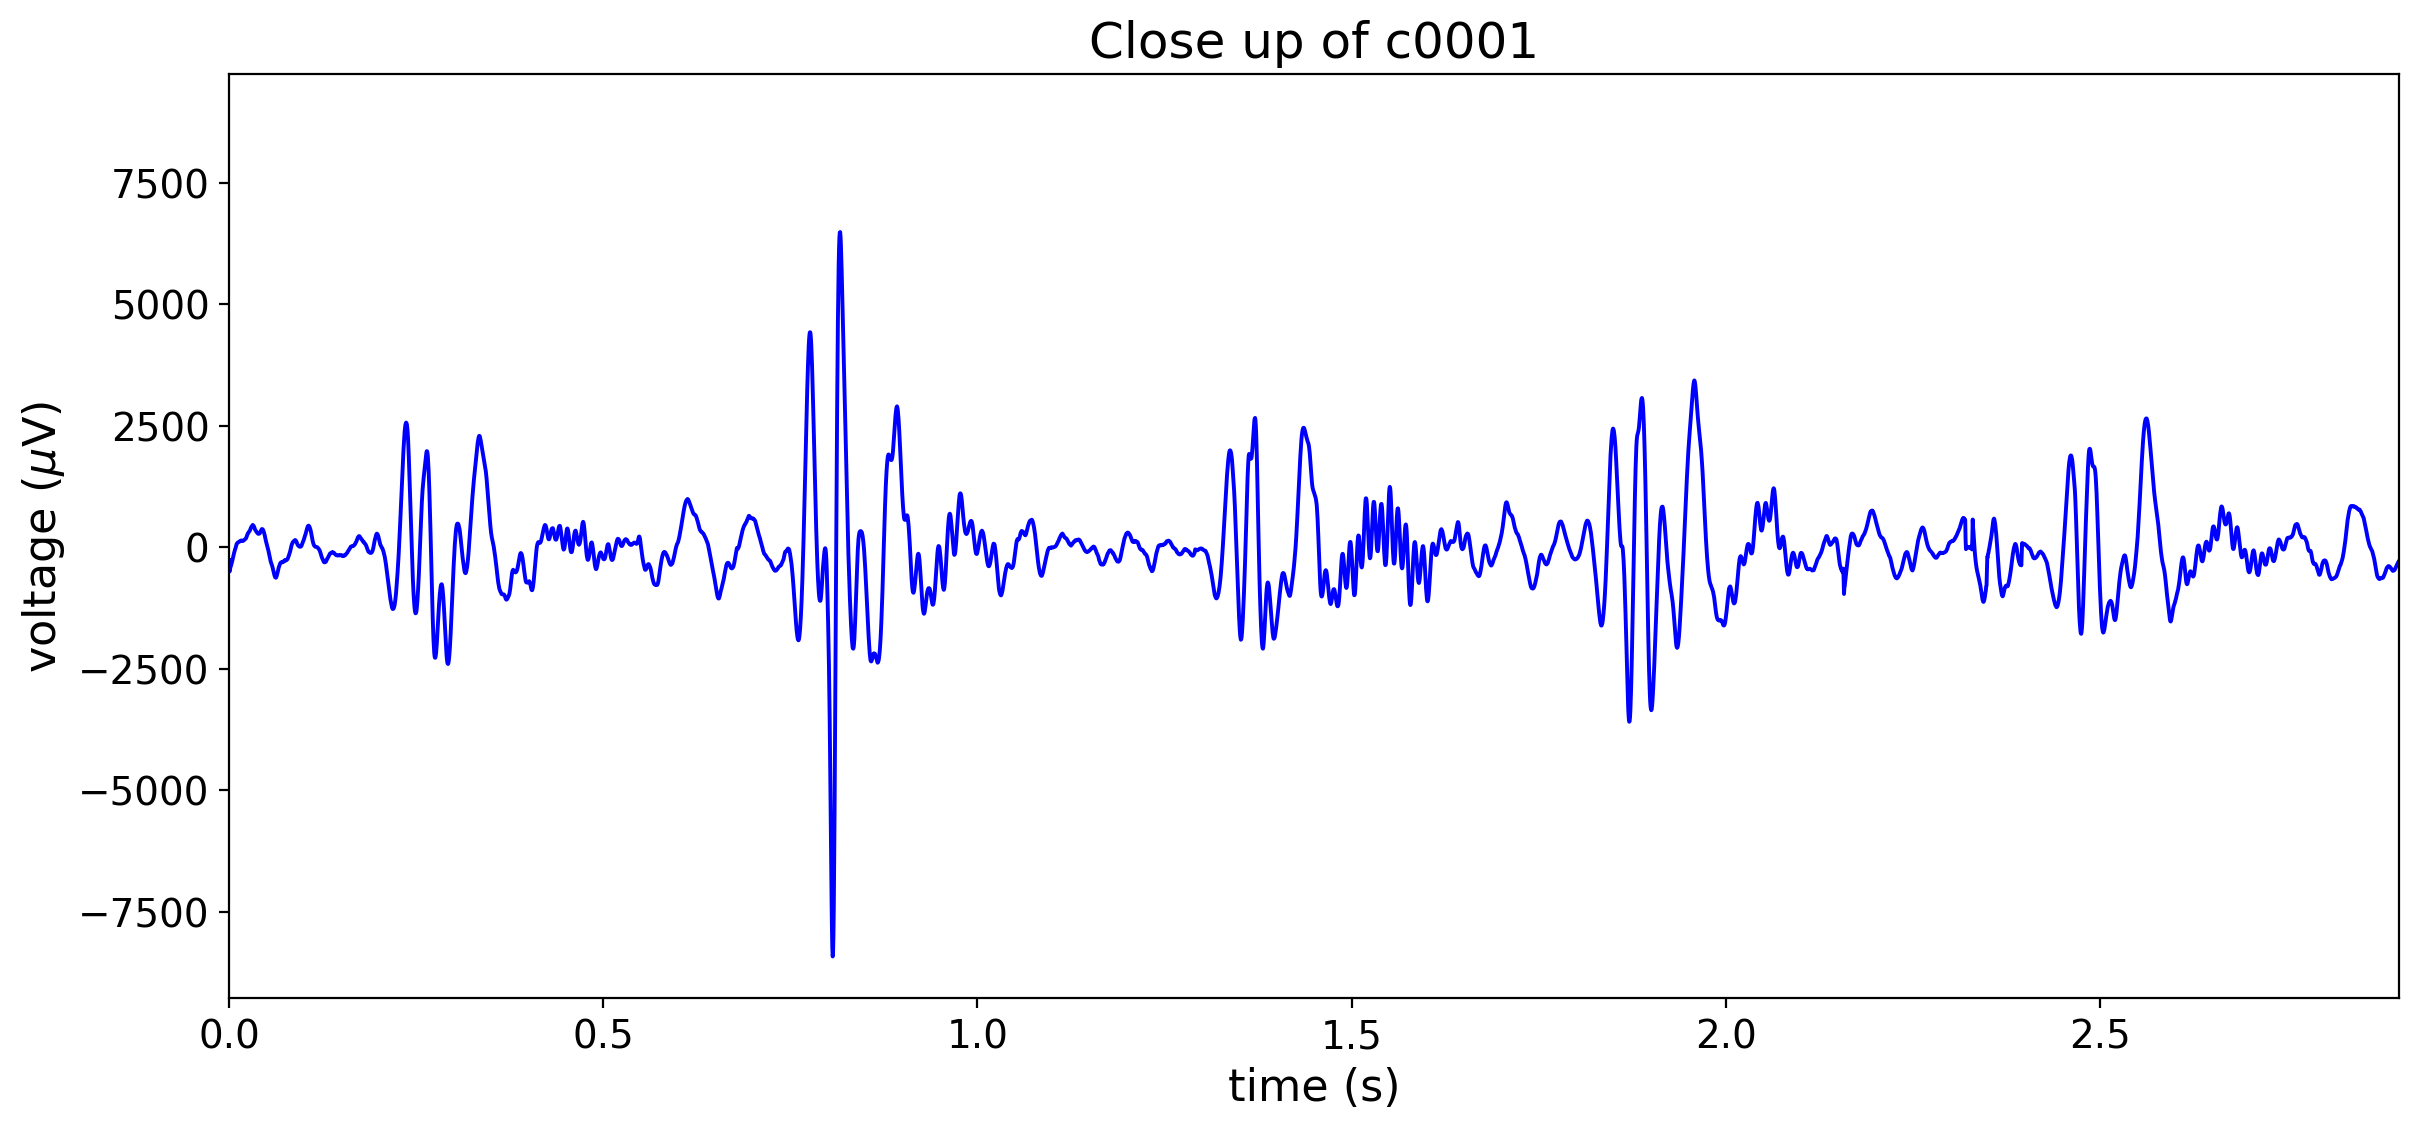

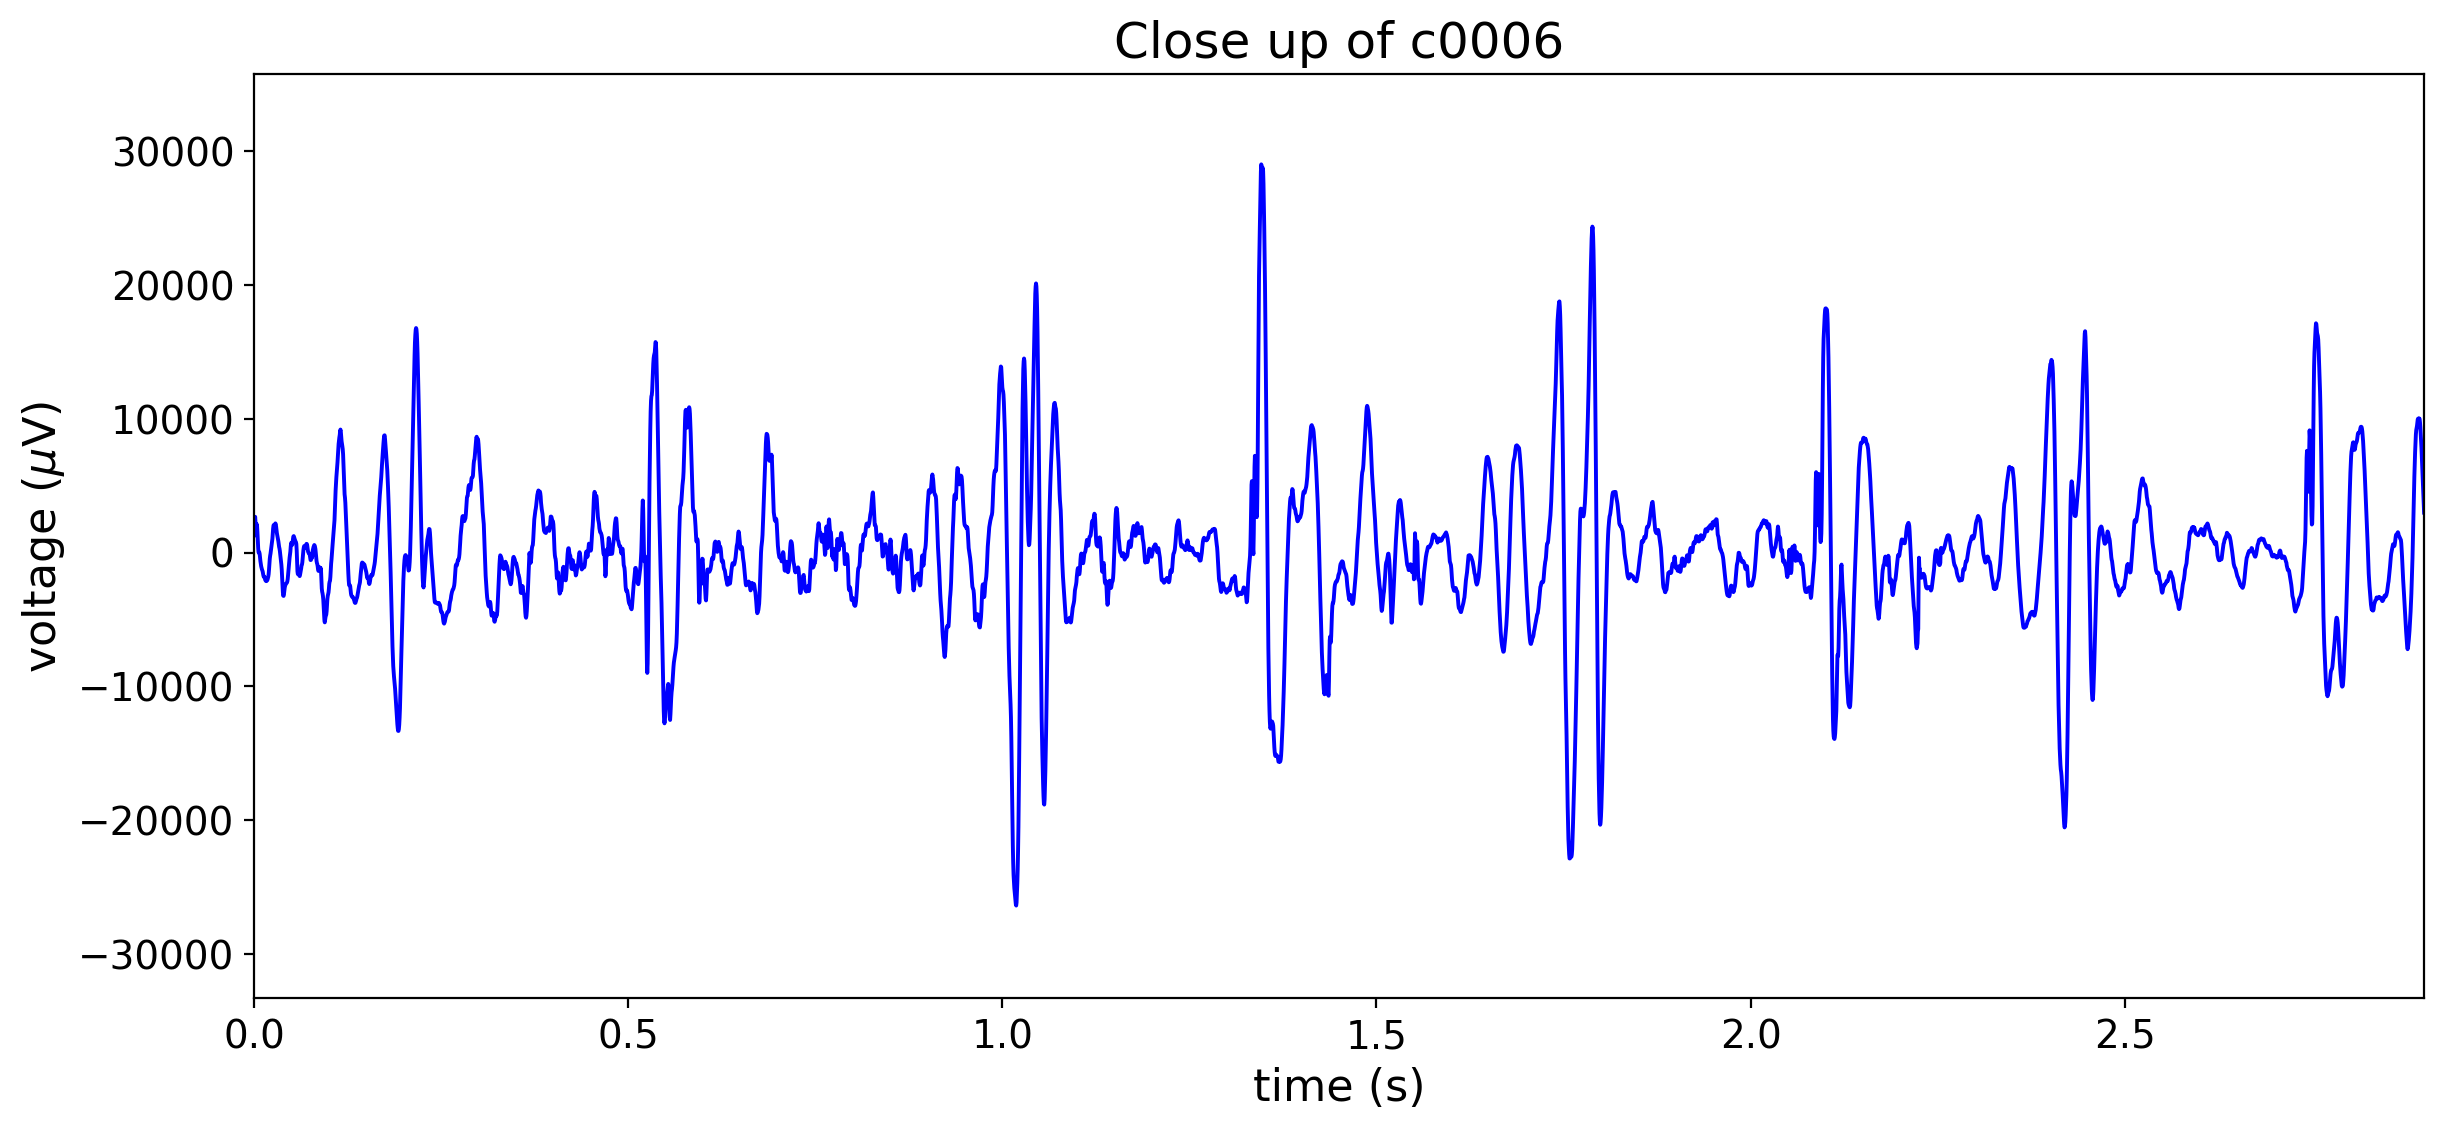

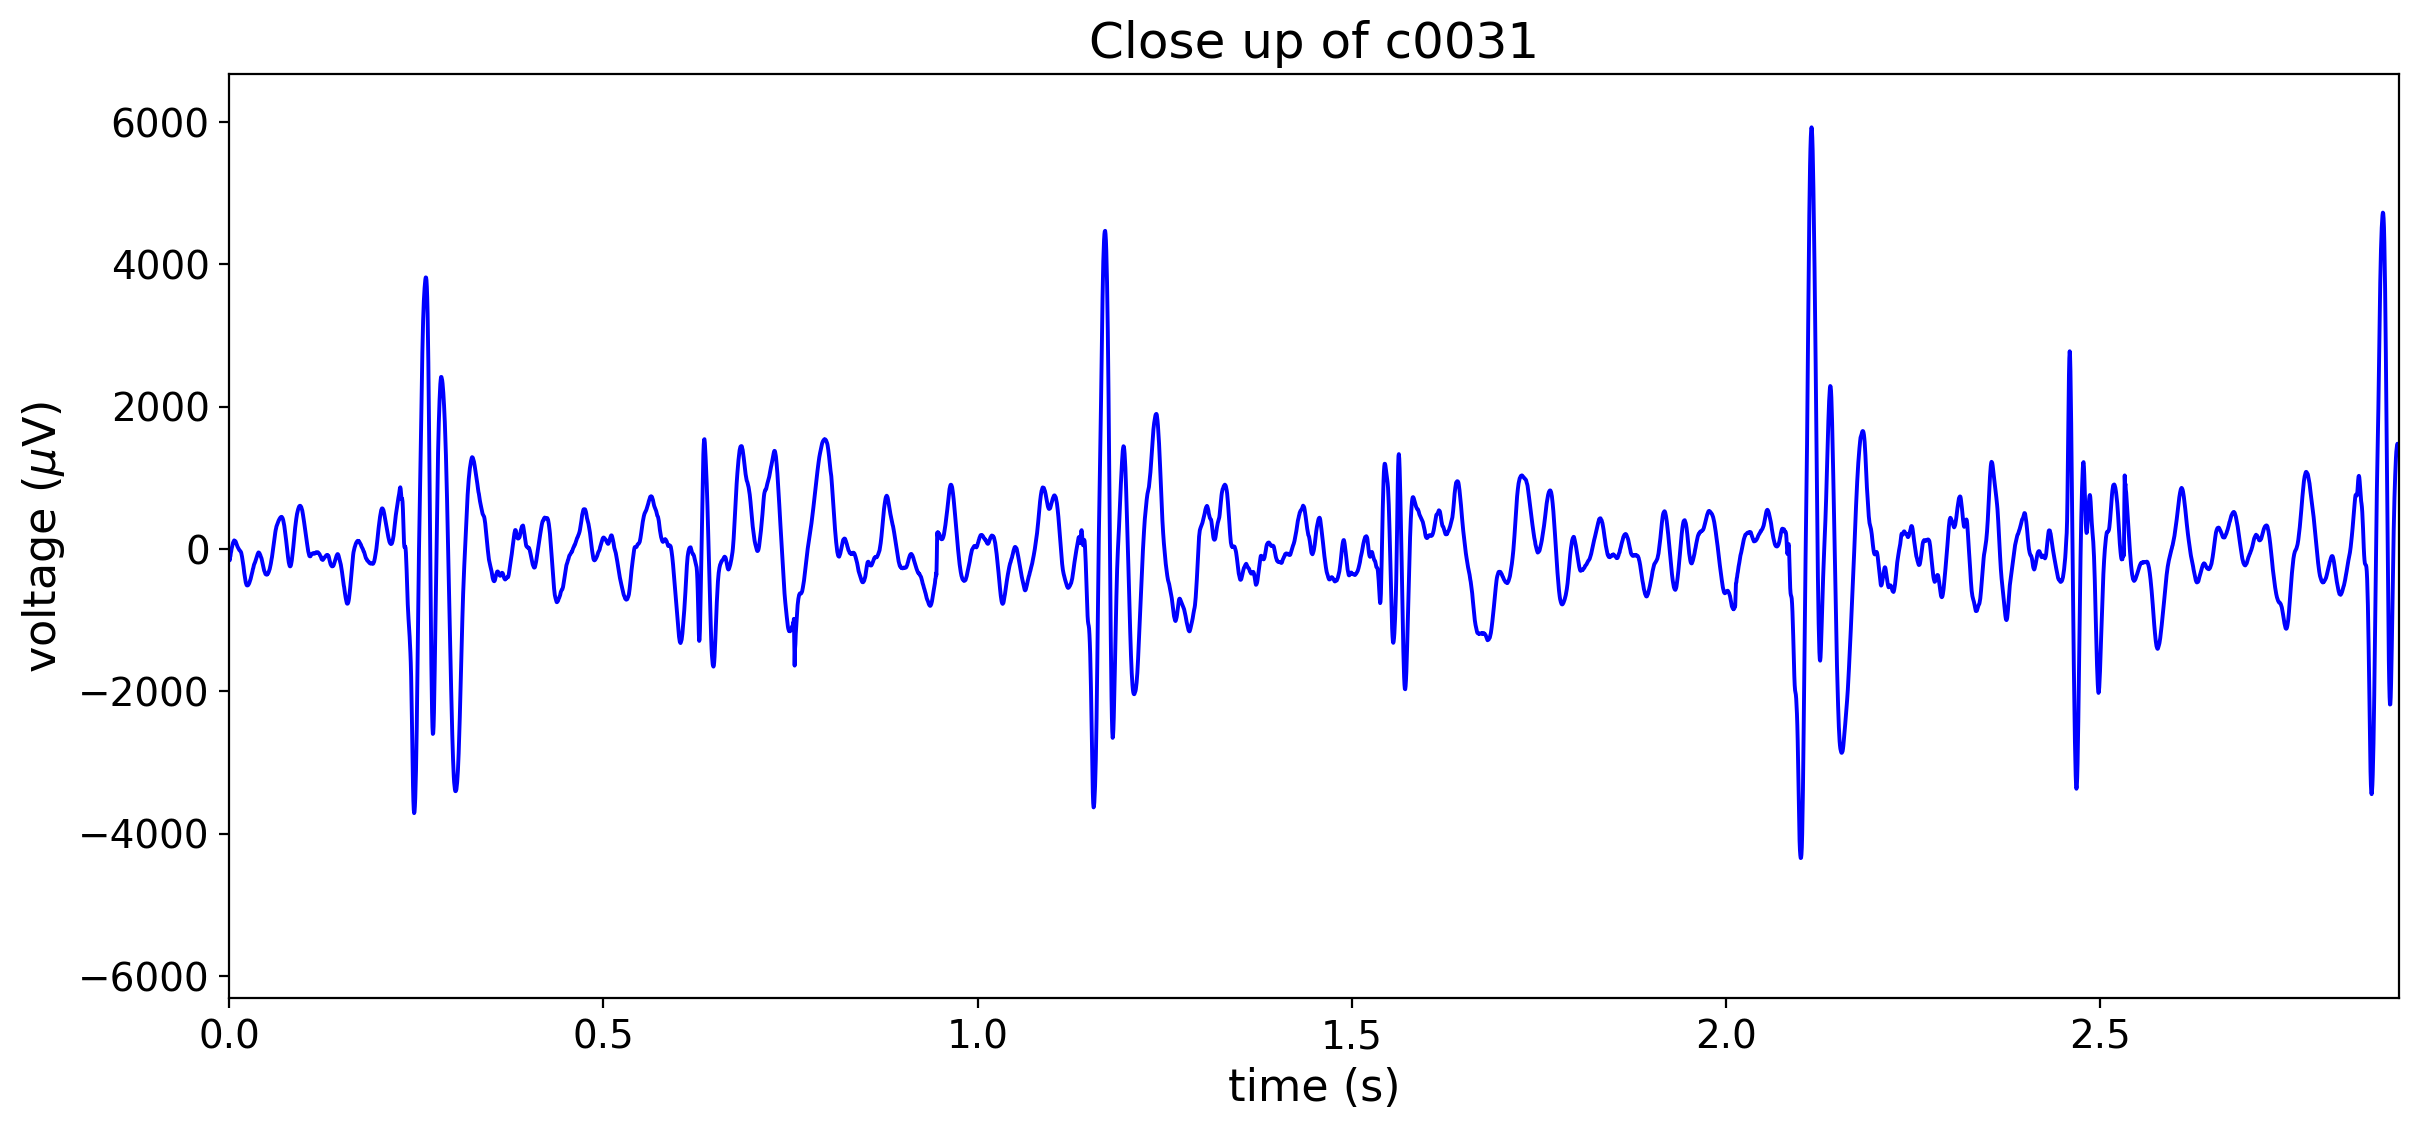

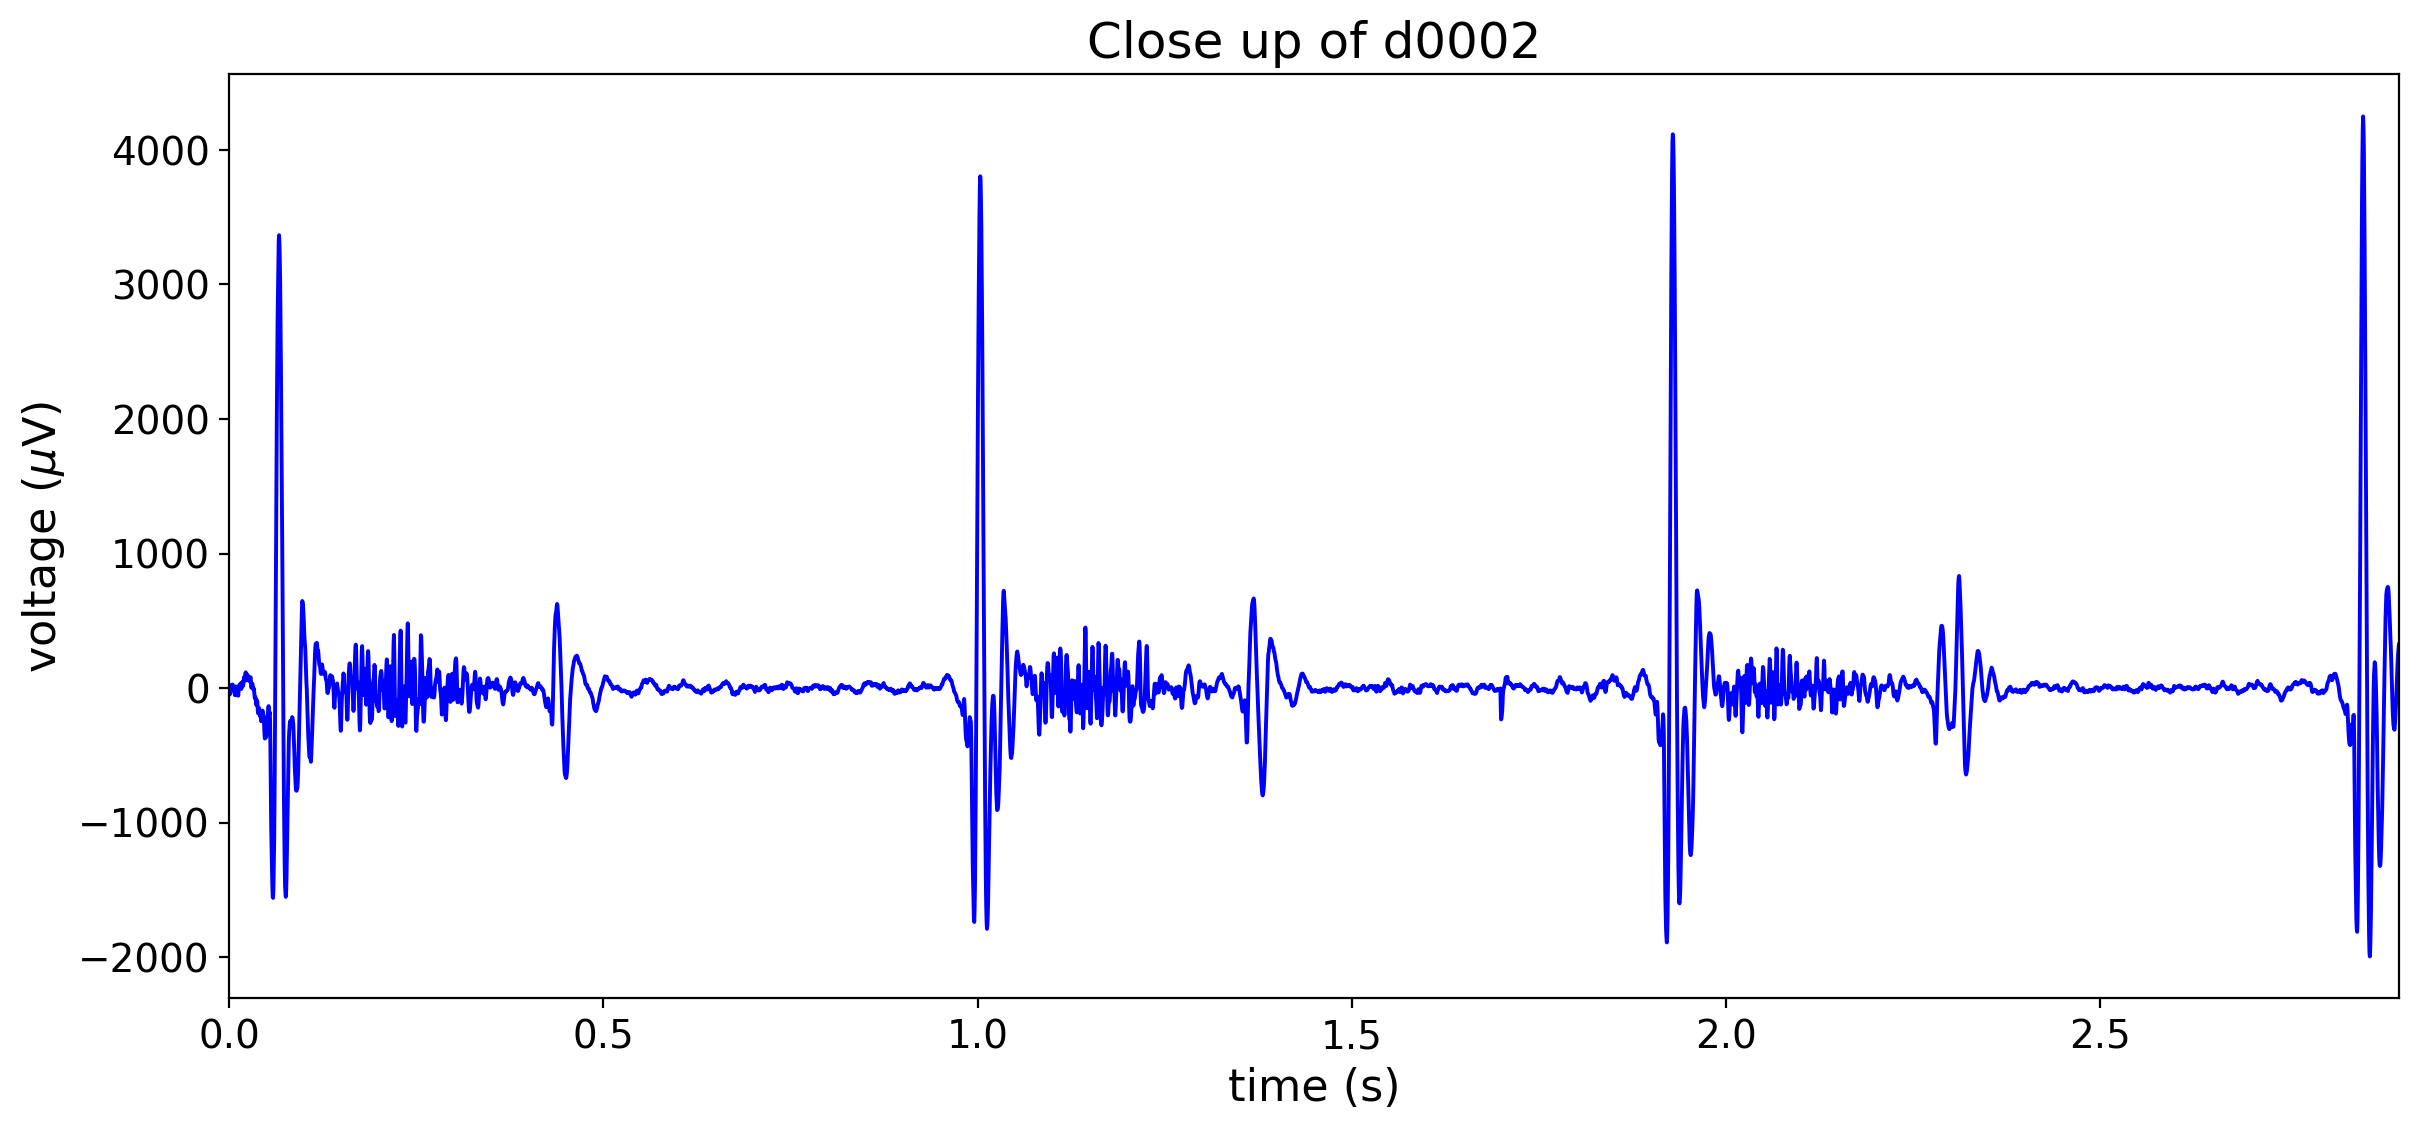

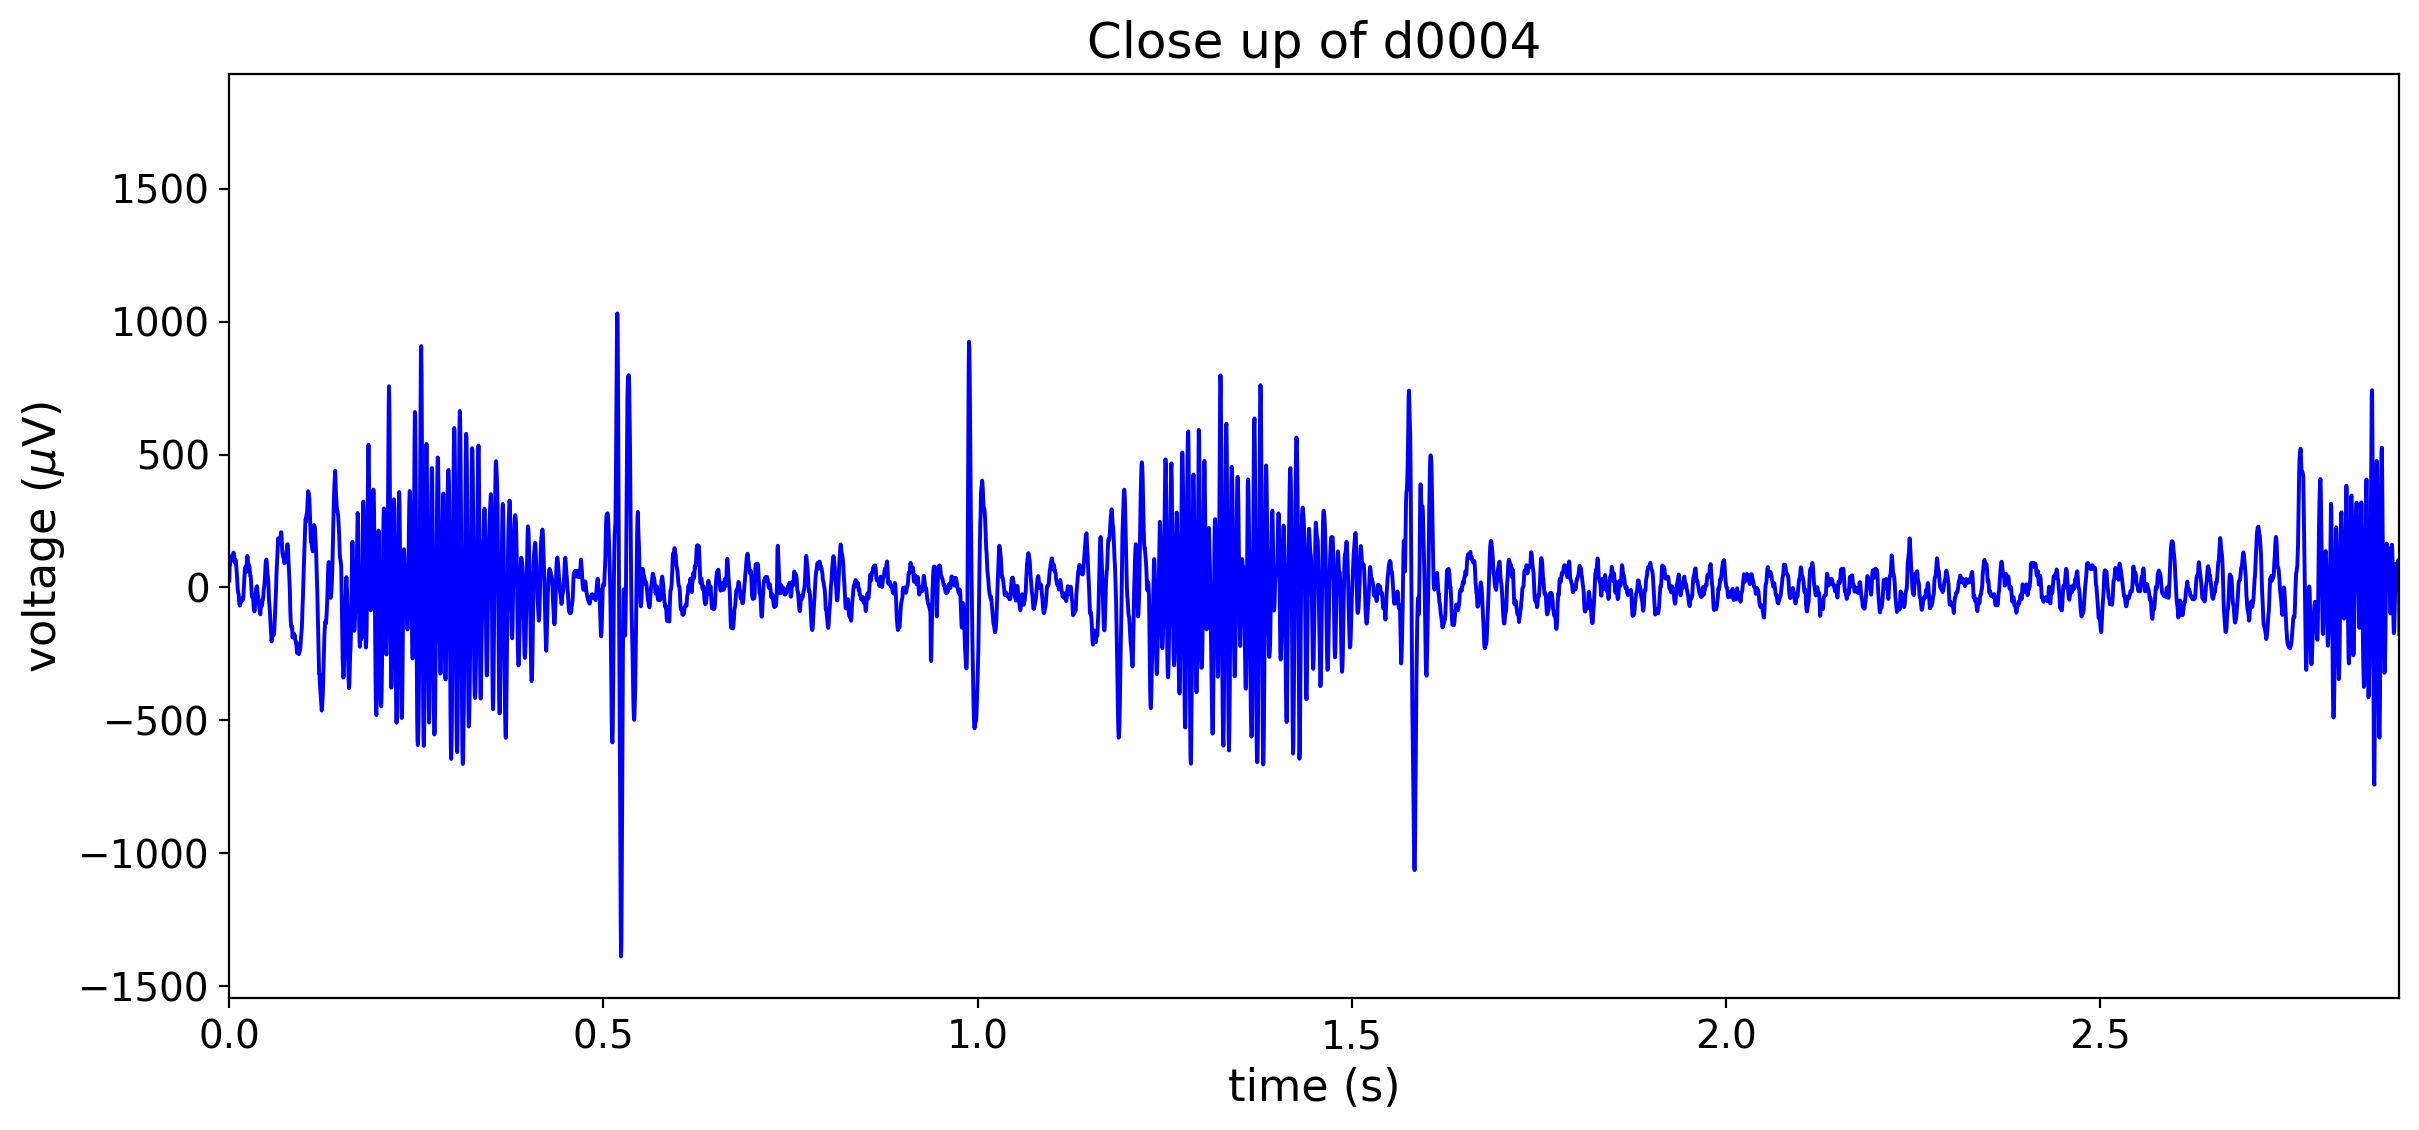

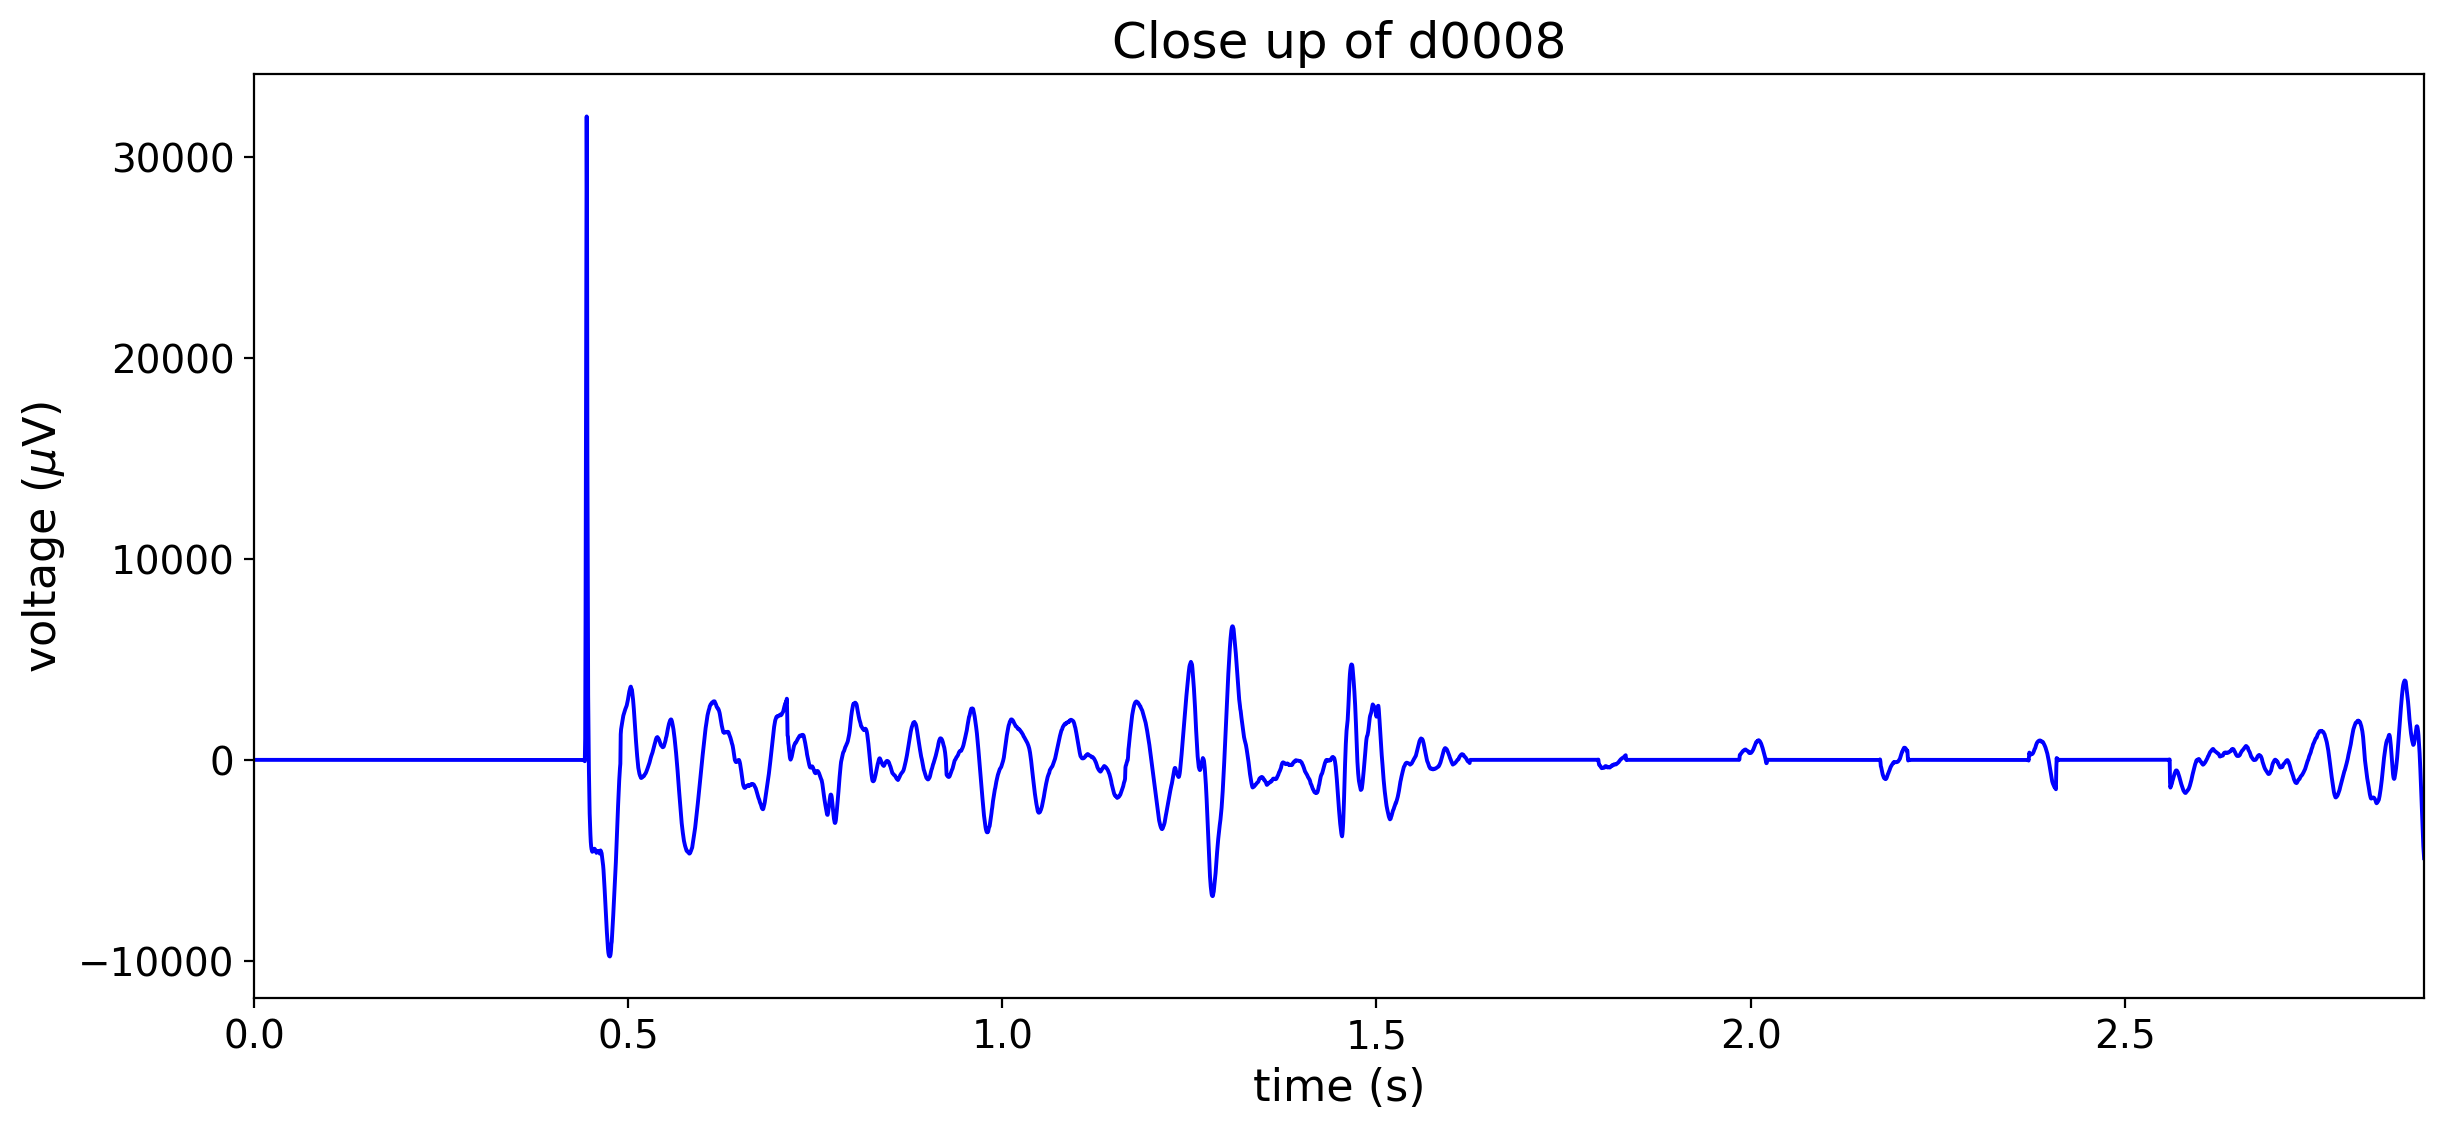

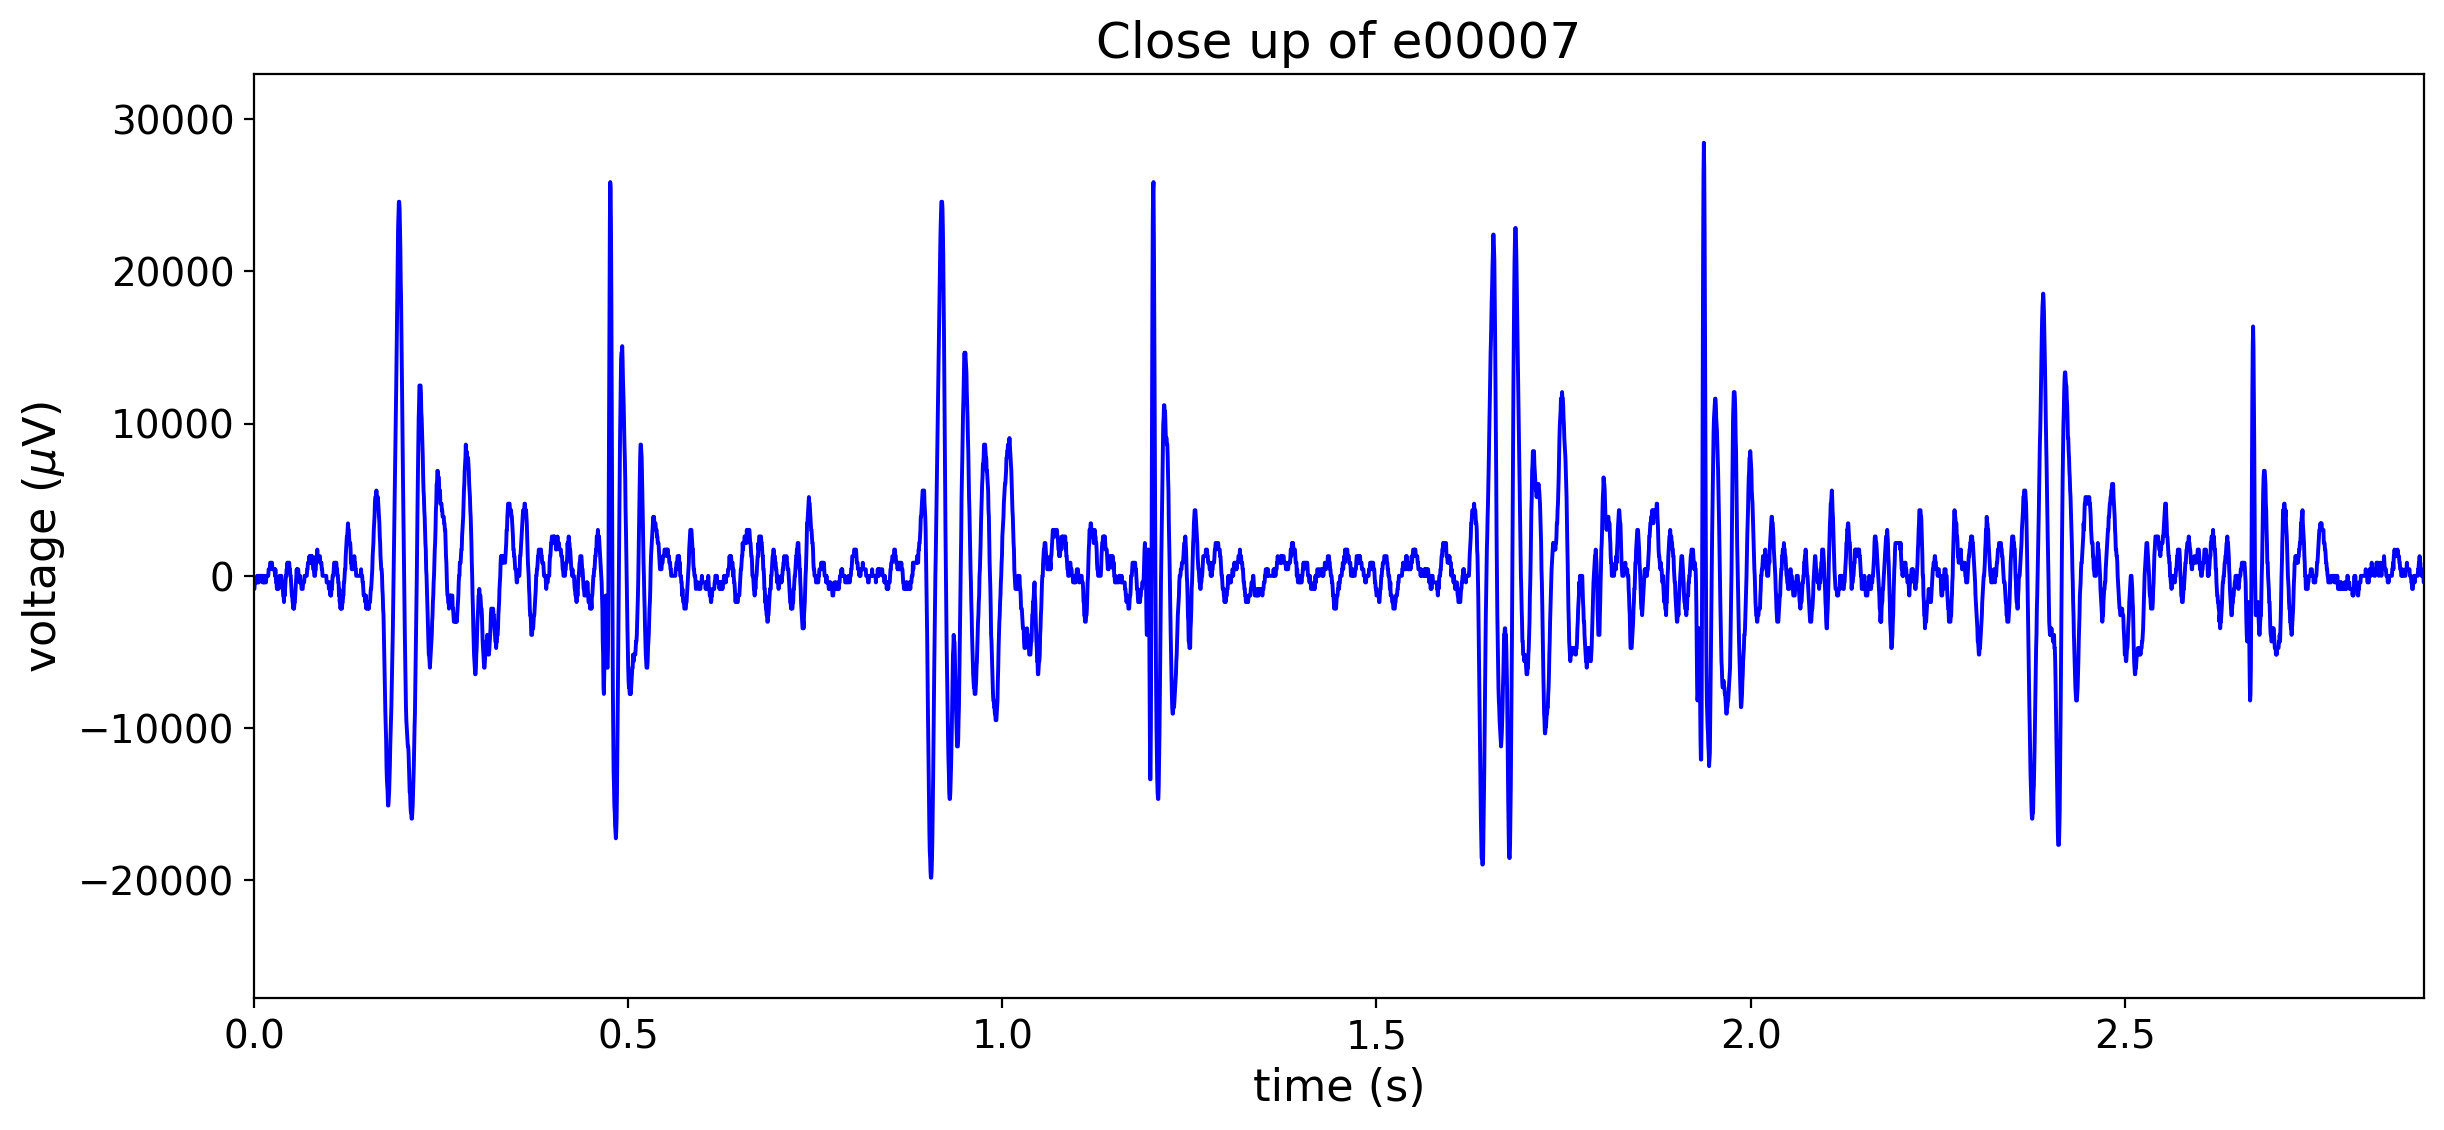

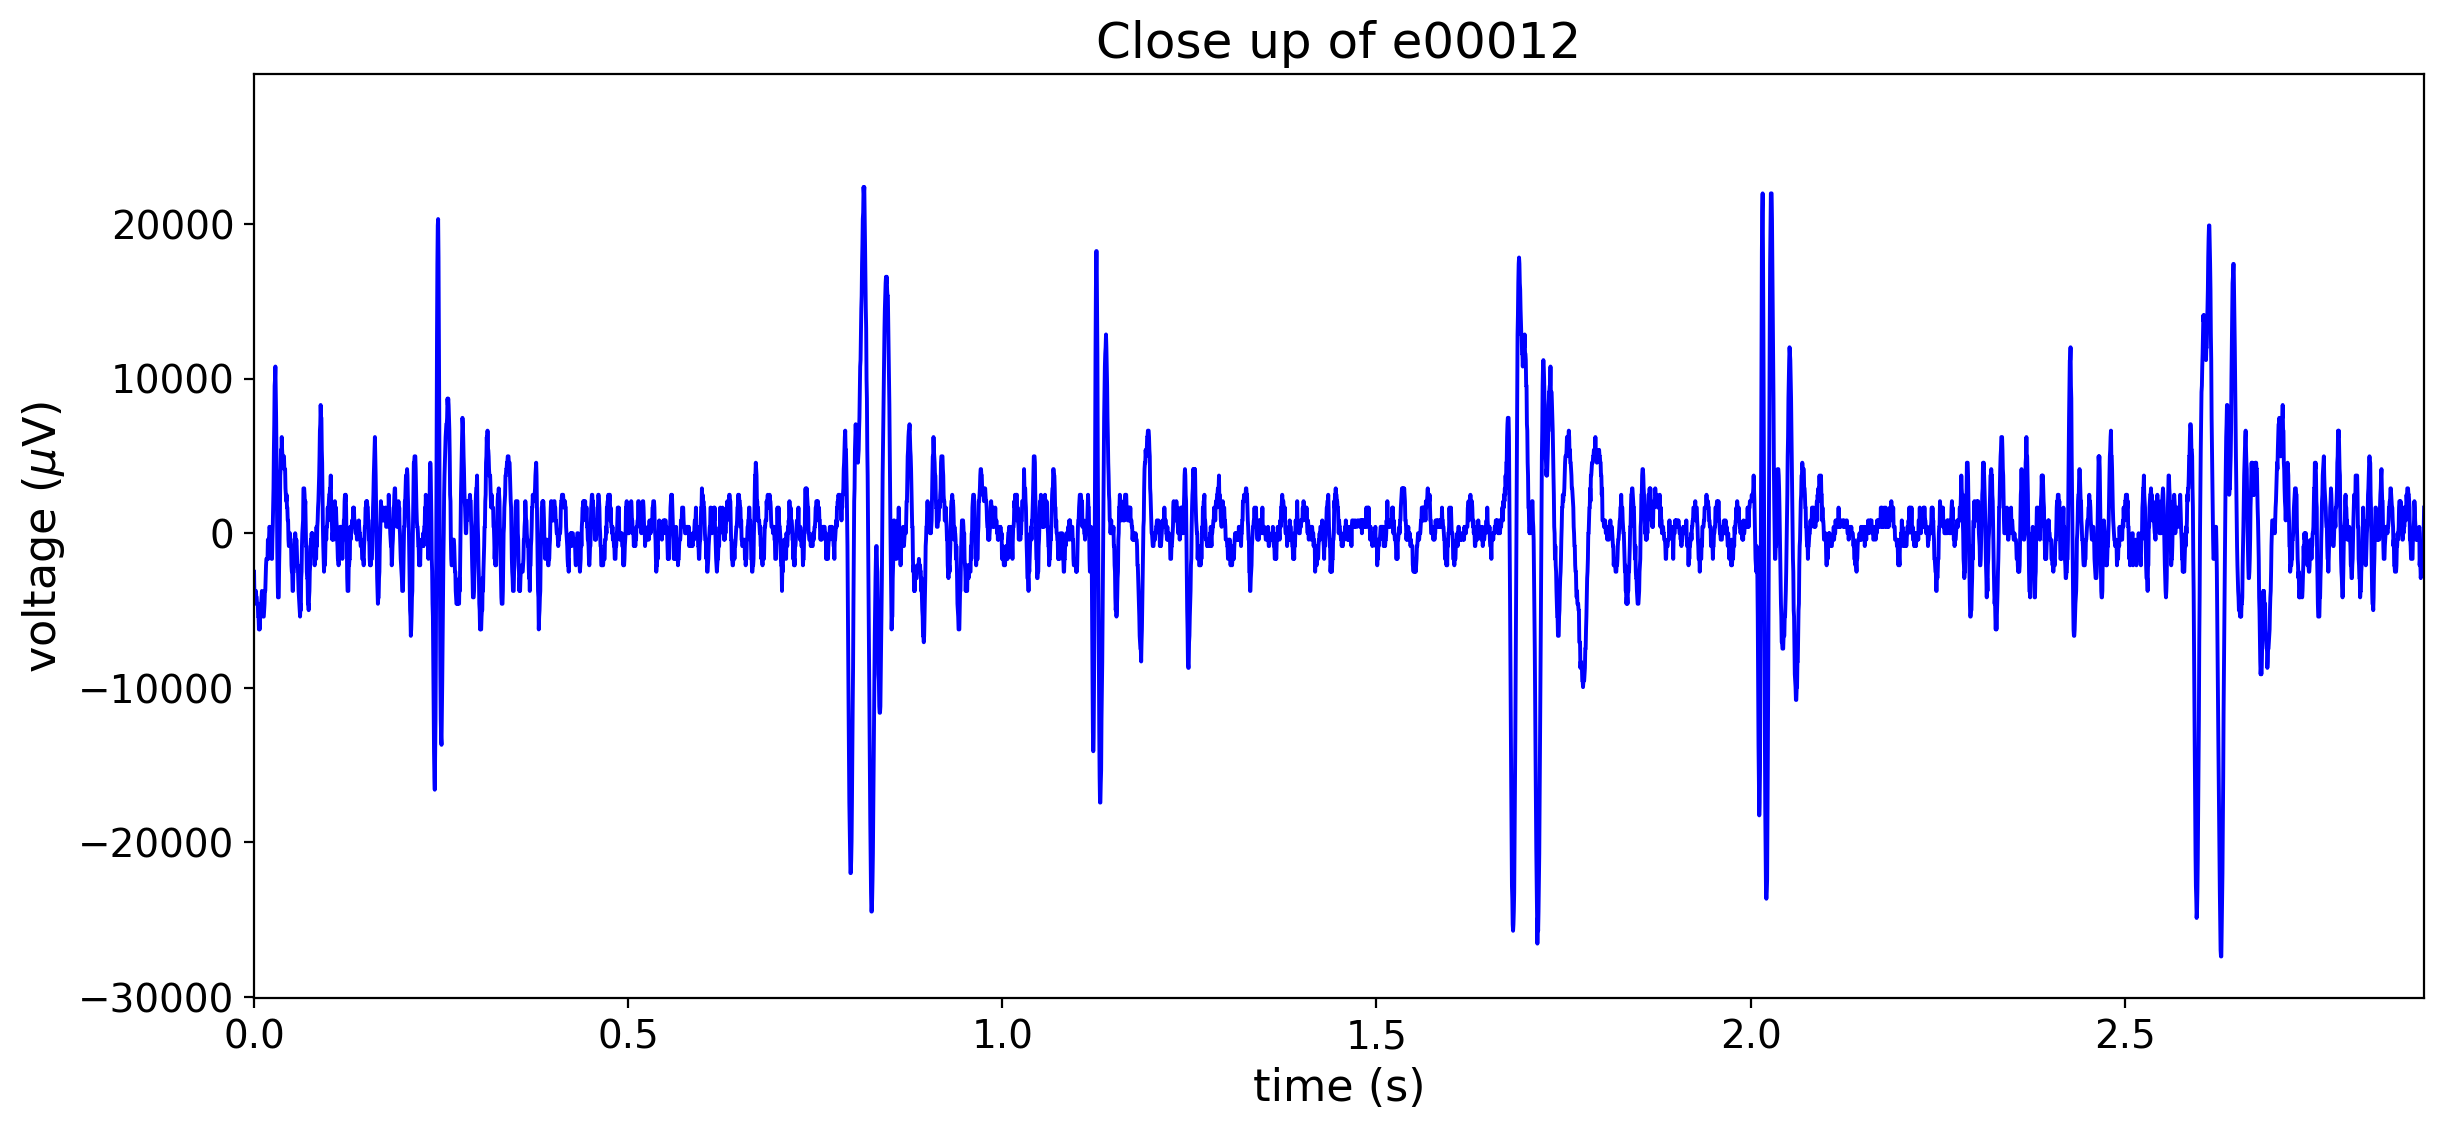

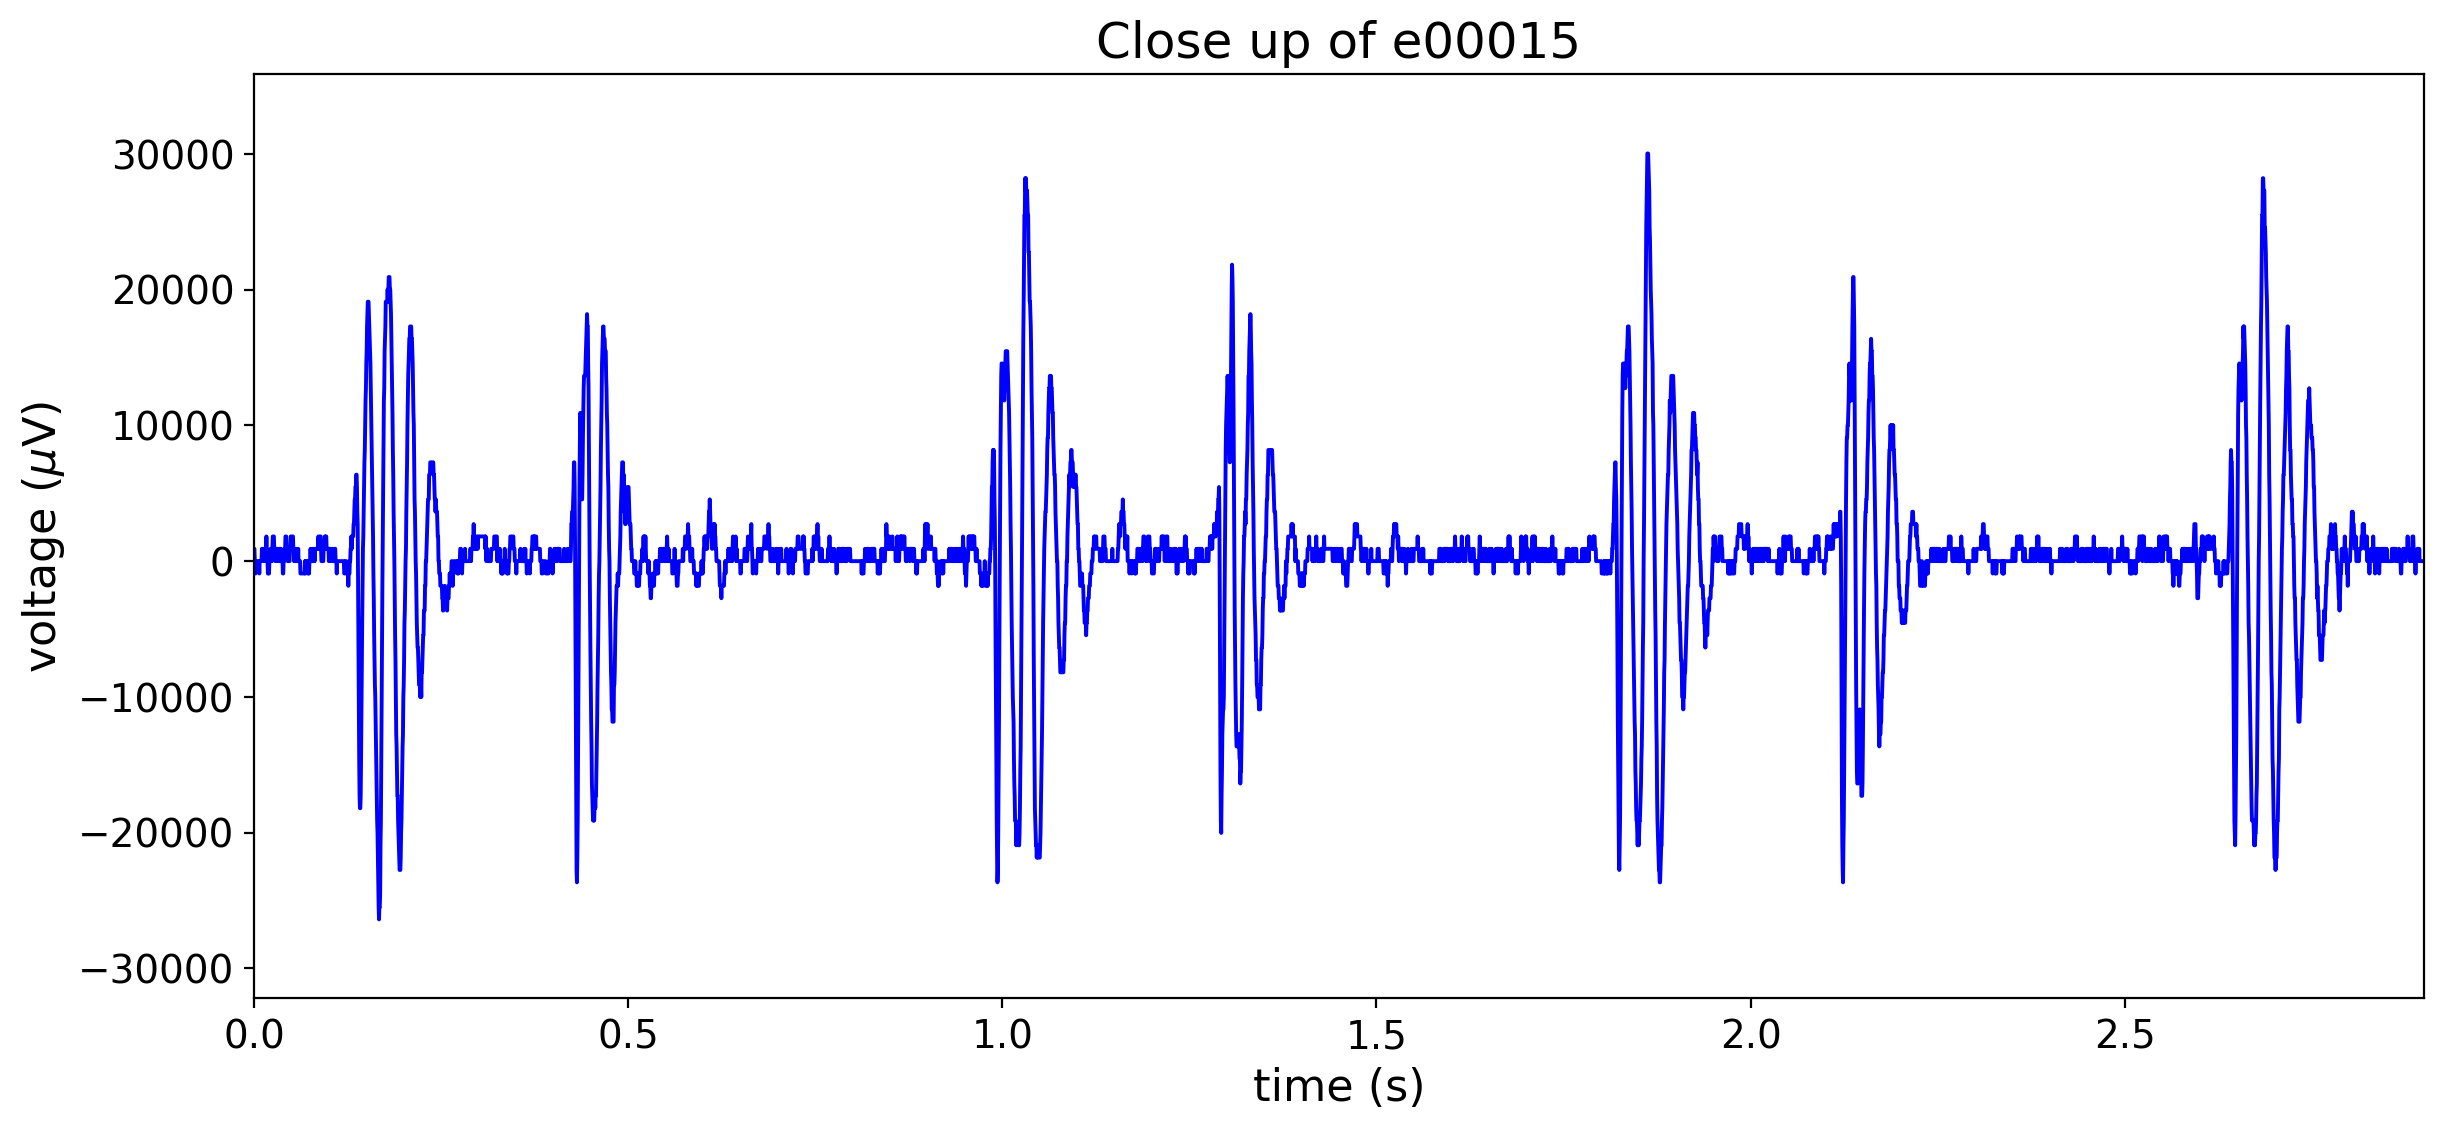

In [ ]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(14,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.xlim(0,2.9)
    plt.title("Close up of "+nice[i])
    plt.show()

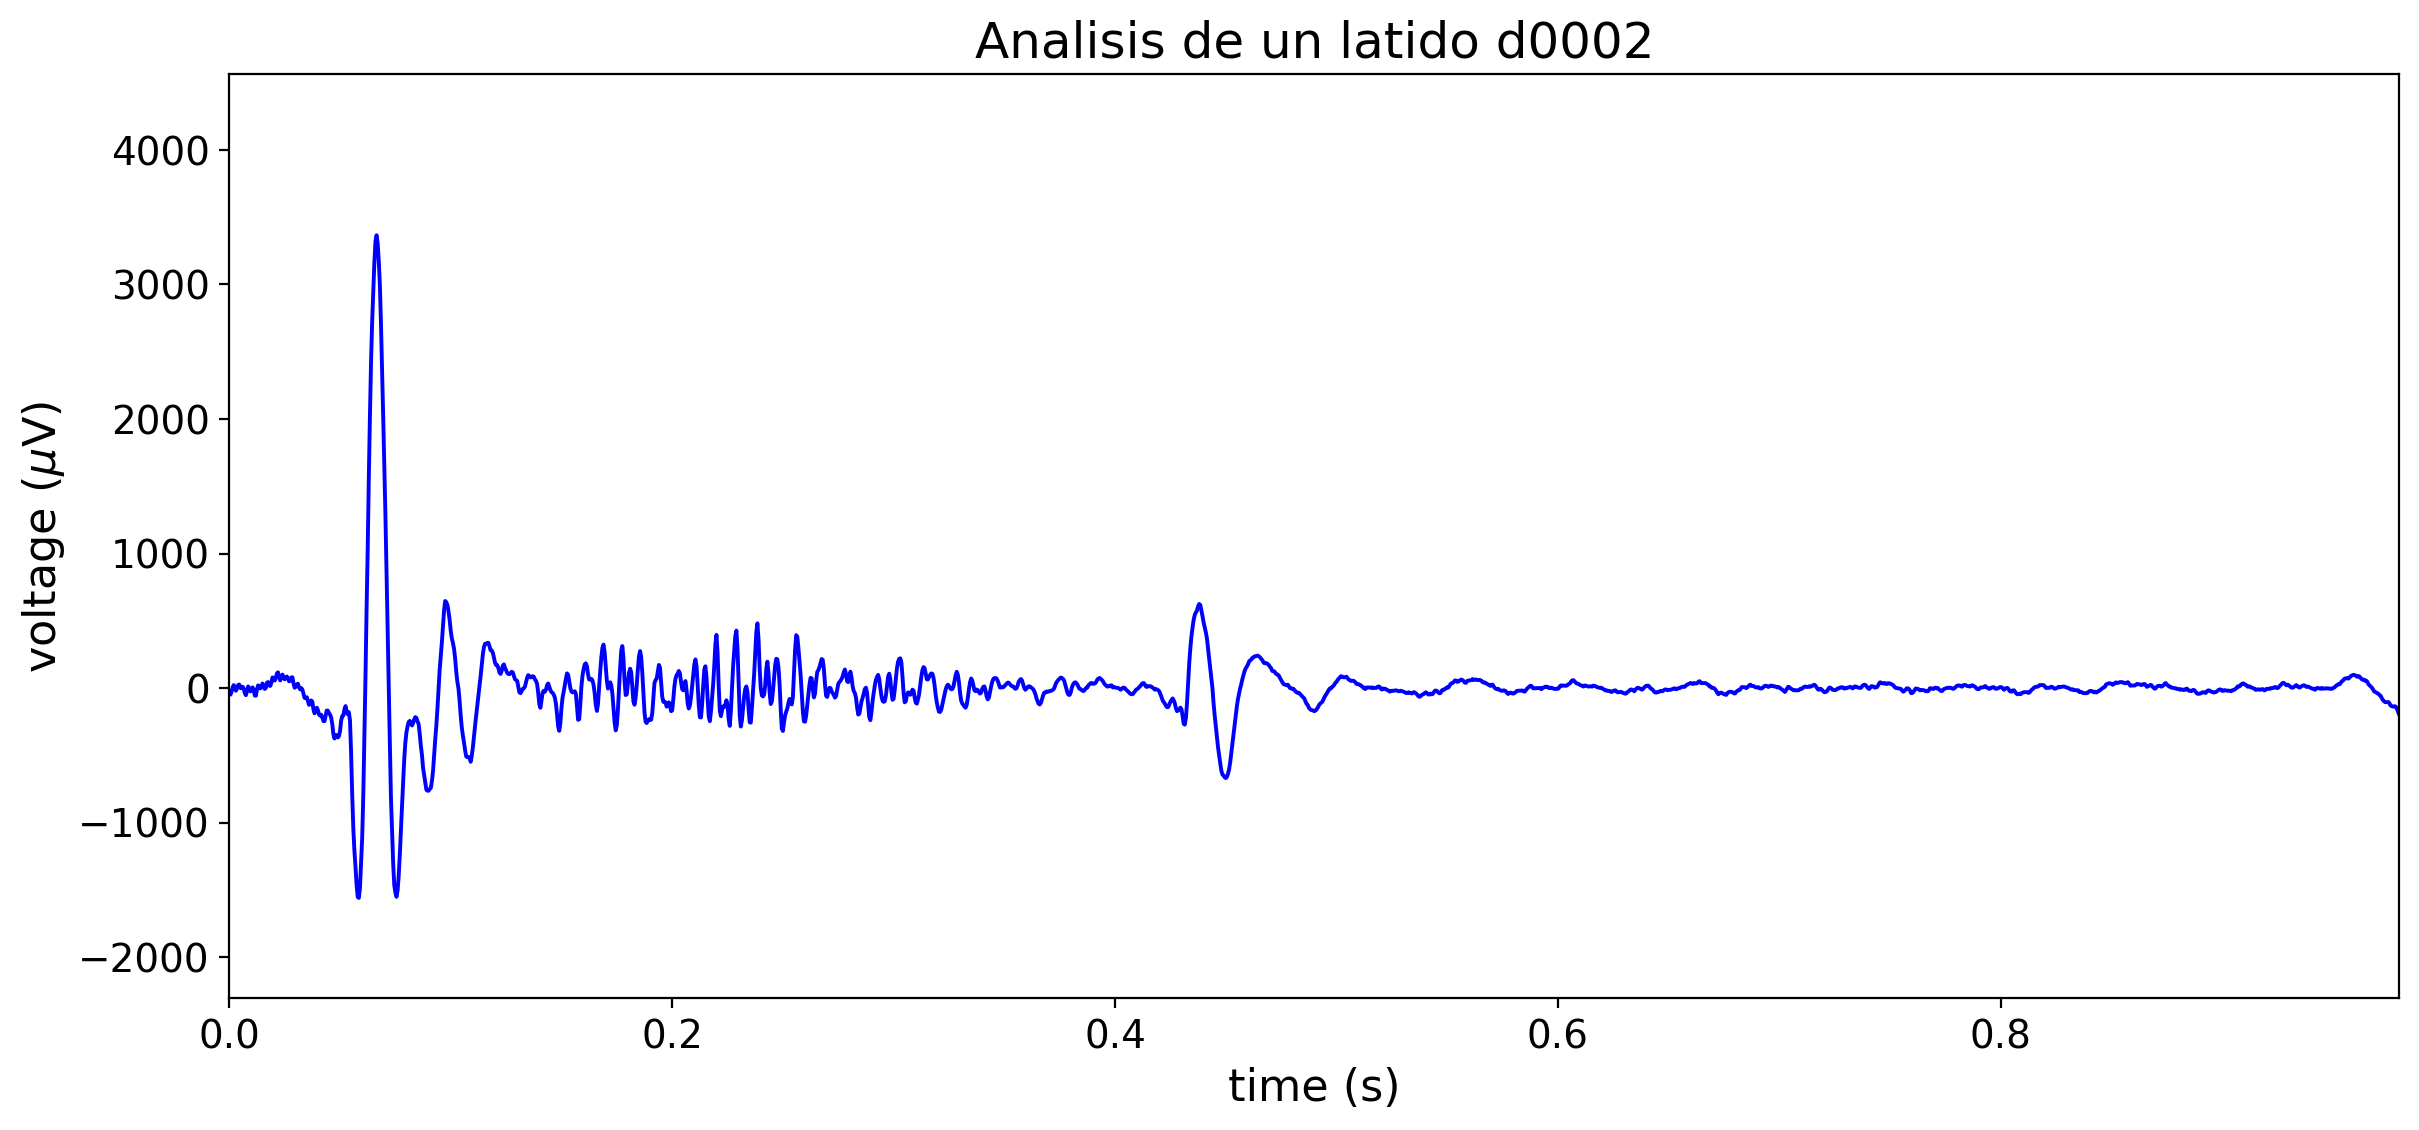

In [ ]:

    timeECG, waveData = ecg('d0002.wav')
    # Plotting EMG signal
    plt.figure(figsize=(14,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.xlim(0,.98)
    plt.title("Analisis de un latido d0002")
    plt.show()

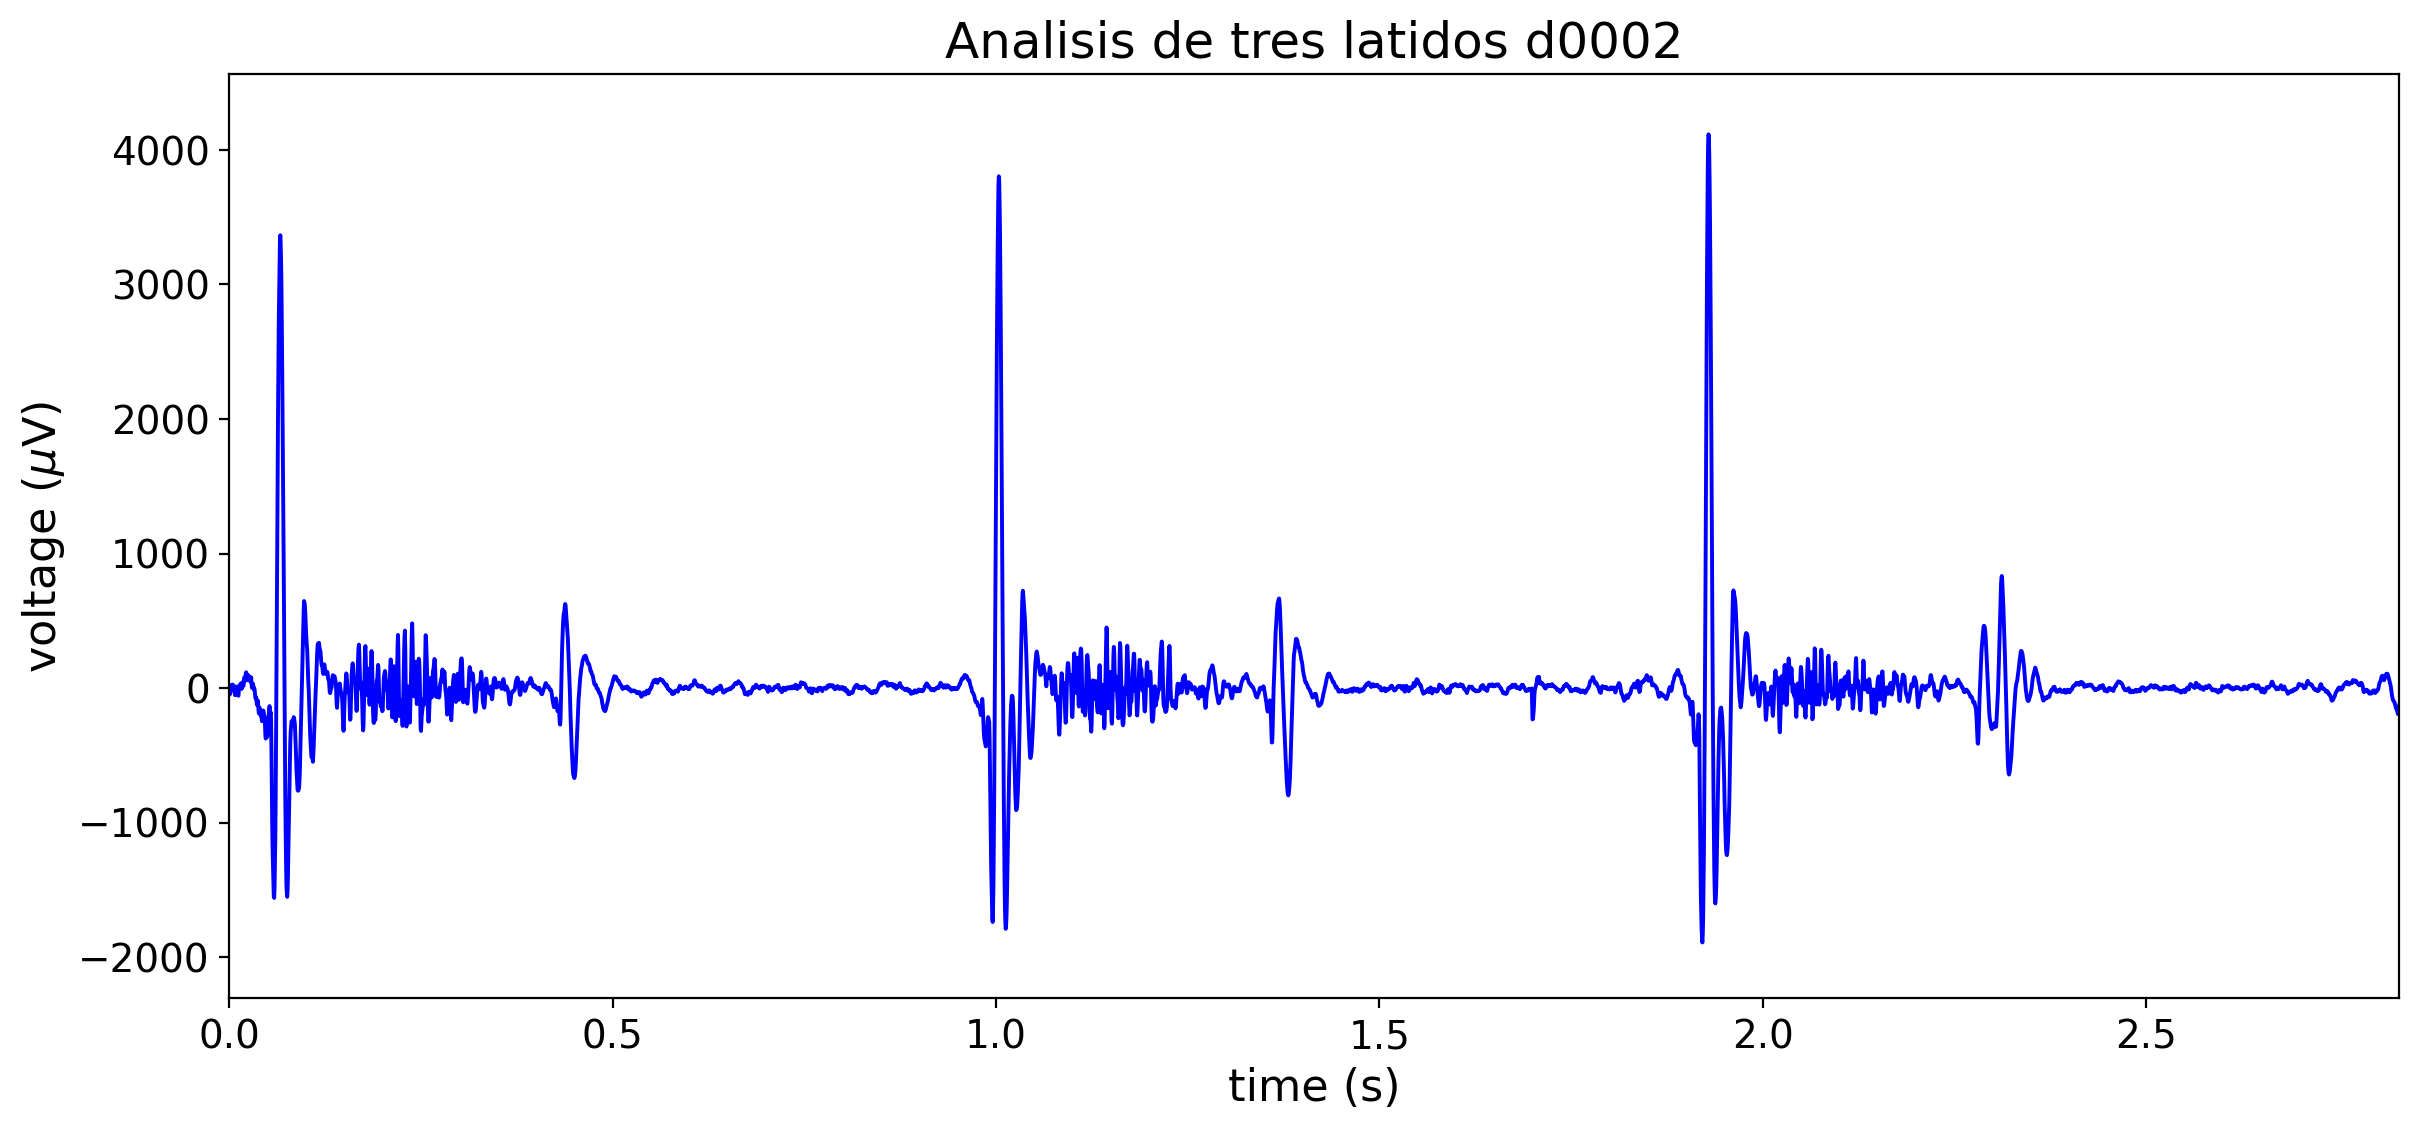

In [ ]:
    timeECG, waveData = ecg('d0002.wav')
    # Plotting EMG signal
    plt.figure(figsize=(14,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.xlim(0,2.83)
    plt.title("Analisis de tres latidos d0002")
    plt.show()

In [ ]:
   timeECG, waveData = ecg('d0002.wav')
   def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

In [ ]:
mxs_indices = detecta_maximos_locales(timeECG, waveData )

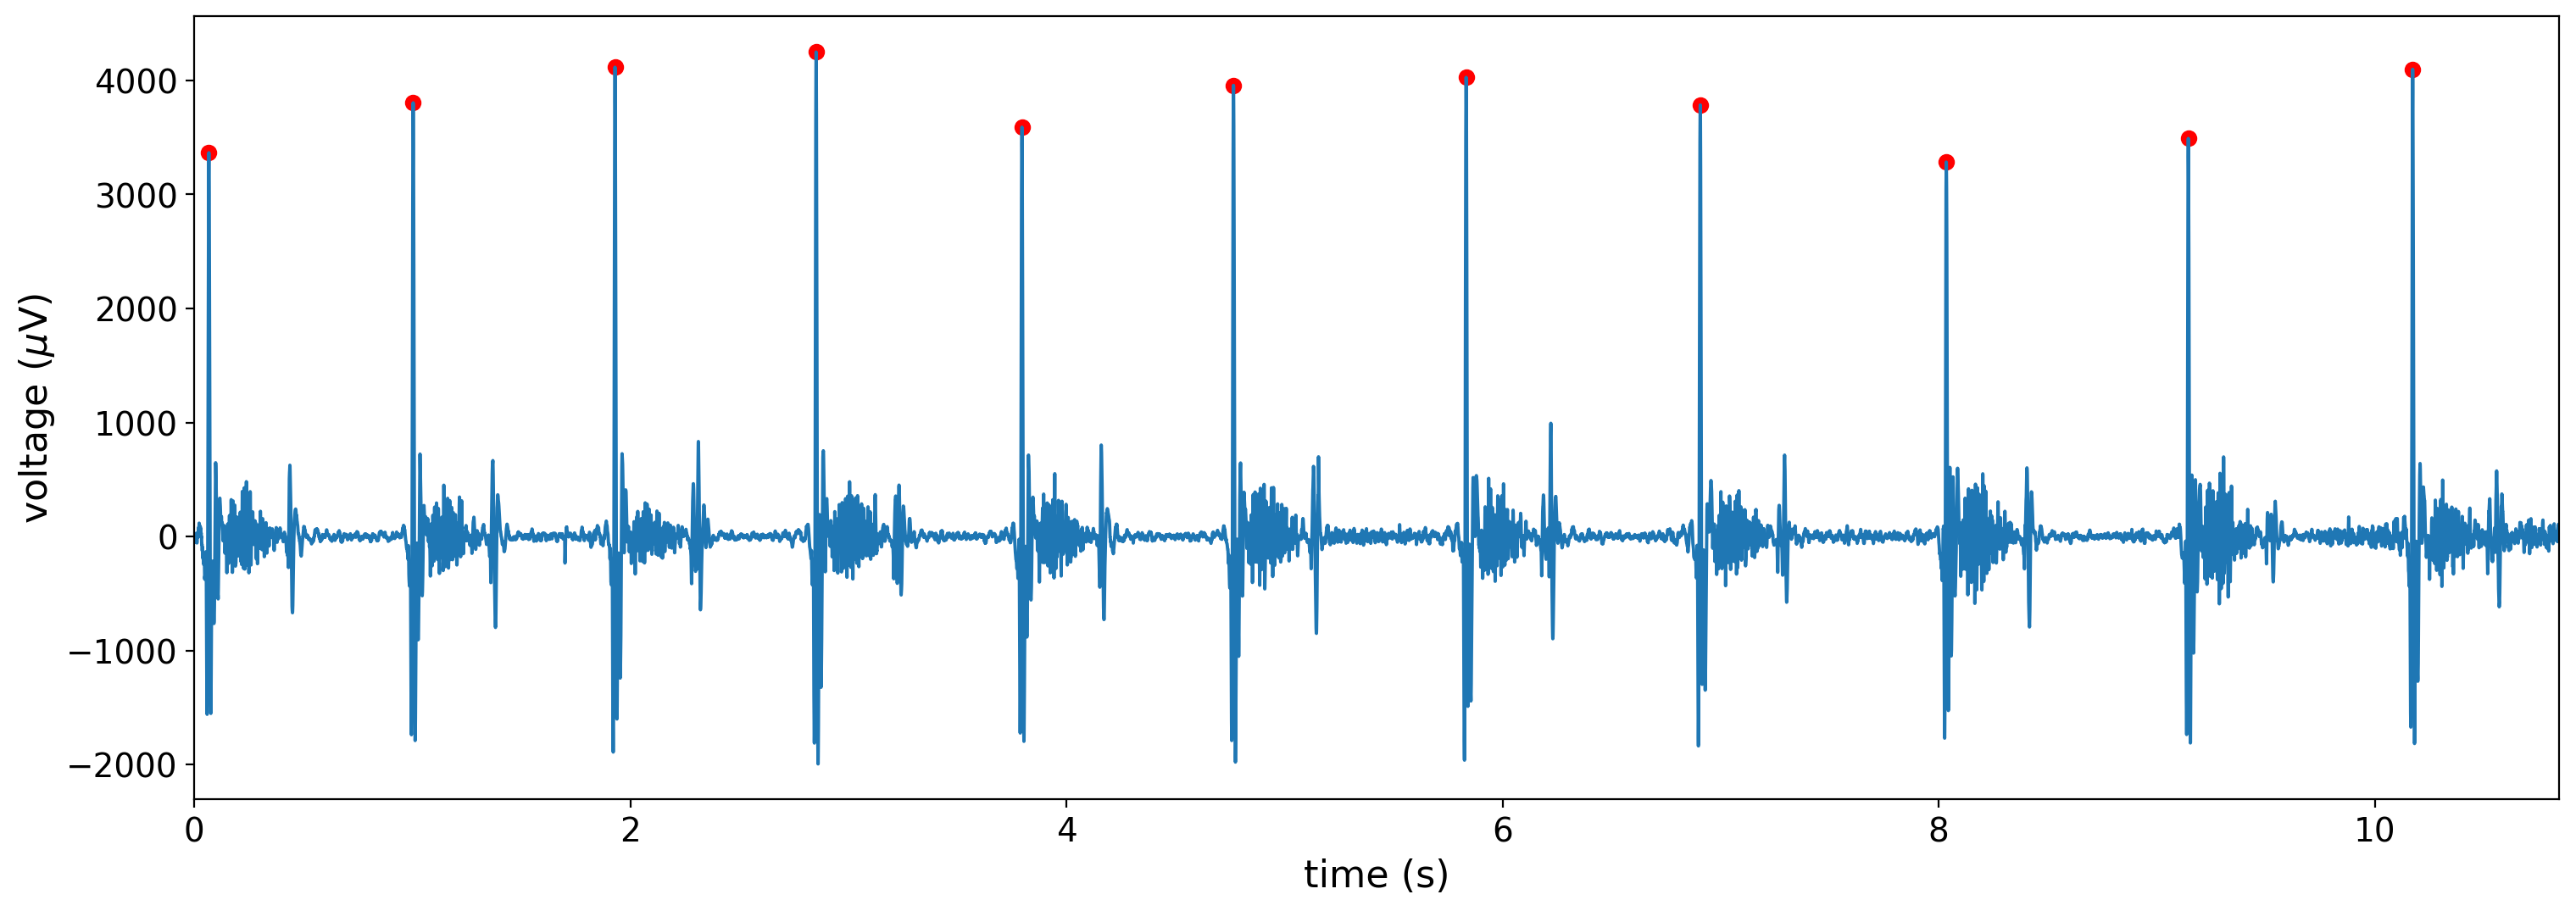

In [ ]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


In [ ]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 60.84912183653713


In [ ]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

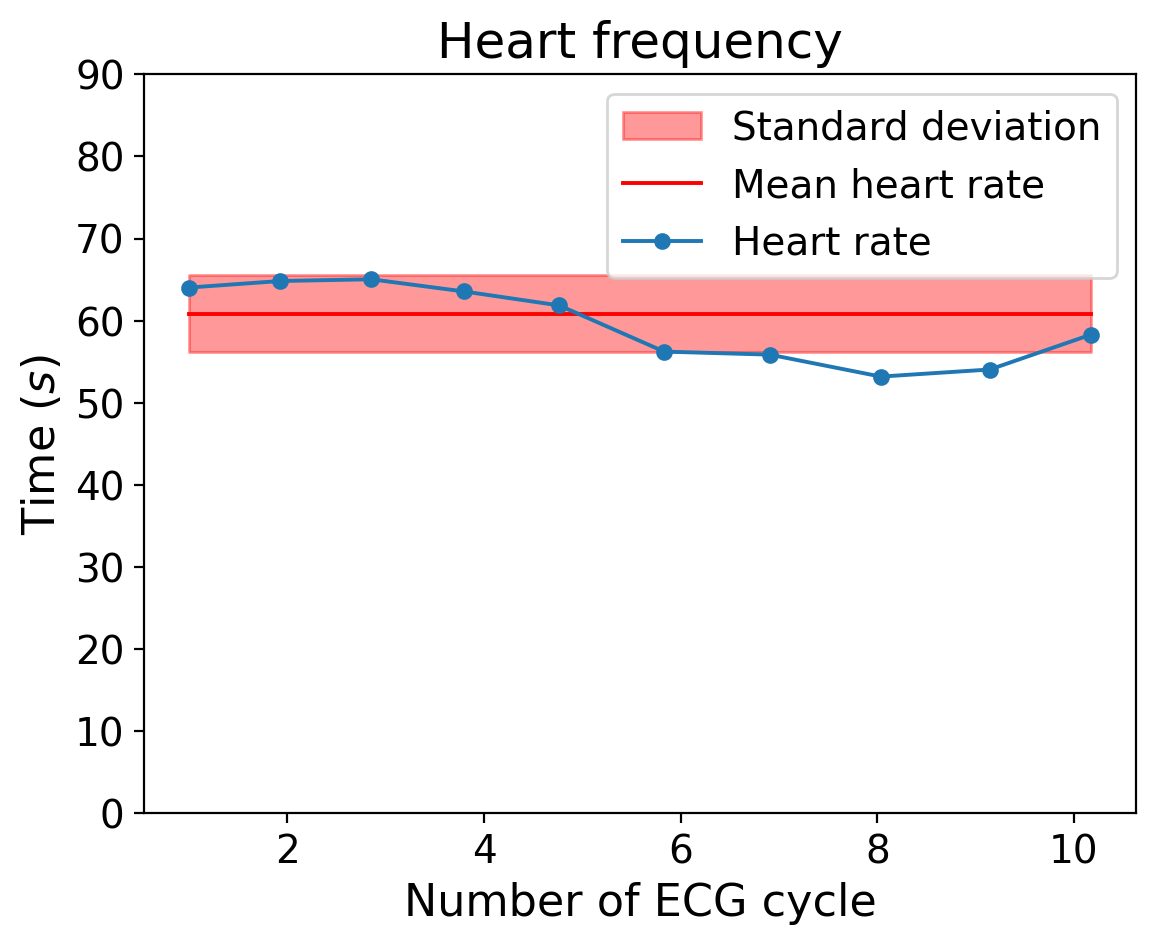

In [ ]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()


In [ ]:
timeECG, waveData = ecg('d0004.wav')
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

In [ ]:
mxs_indices = detecta_maximos_locales(timeECG, waveData )

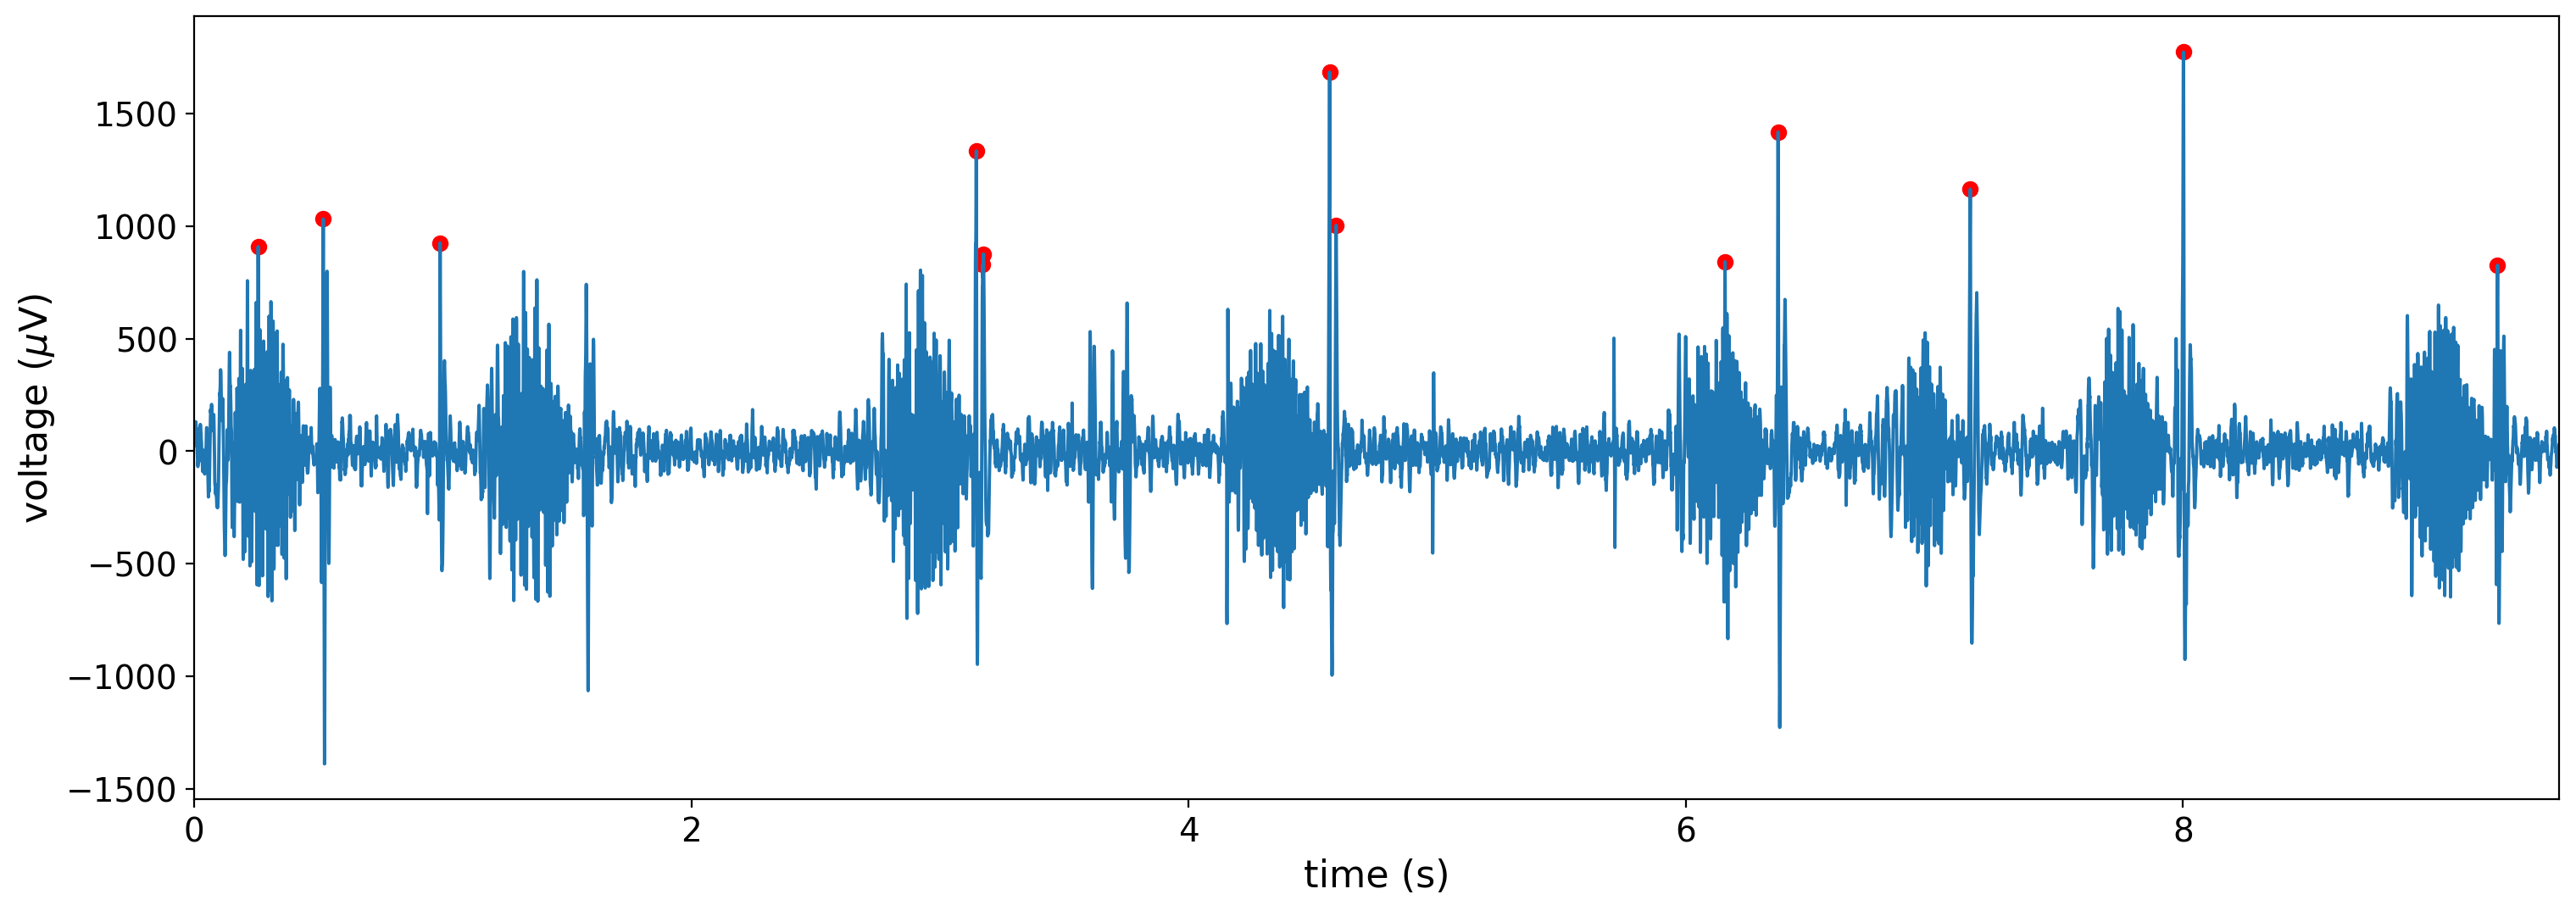

In [ ]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

In [ ]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 81.98444397729662


In [ ]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

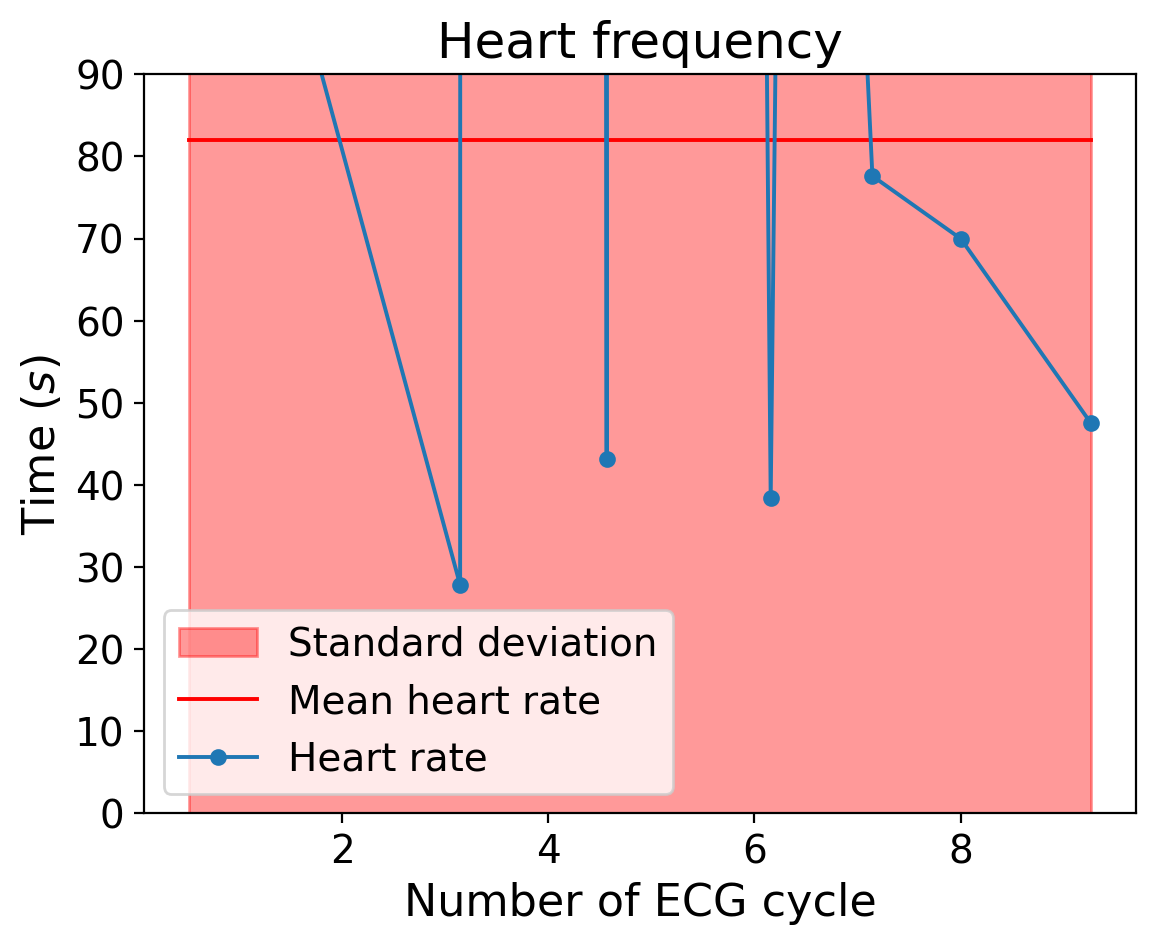

In [ ]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()

In [ ]:
timeECG, waveData = ecg('c0001.wav')
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

In [ ]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)

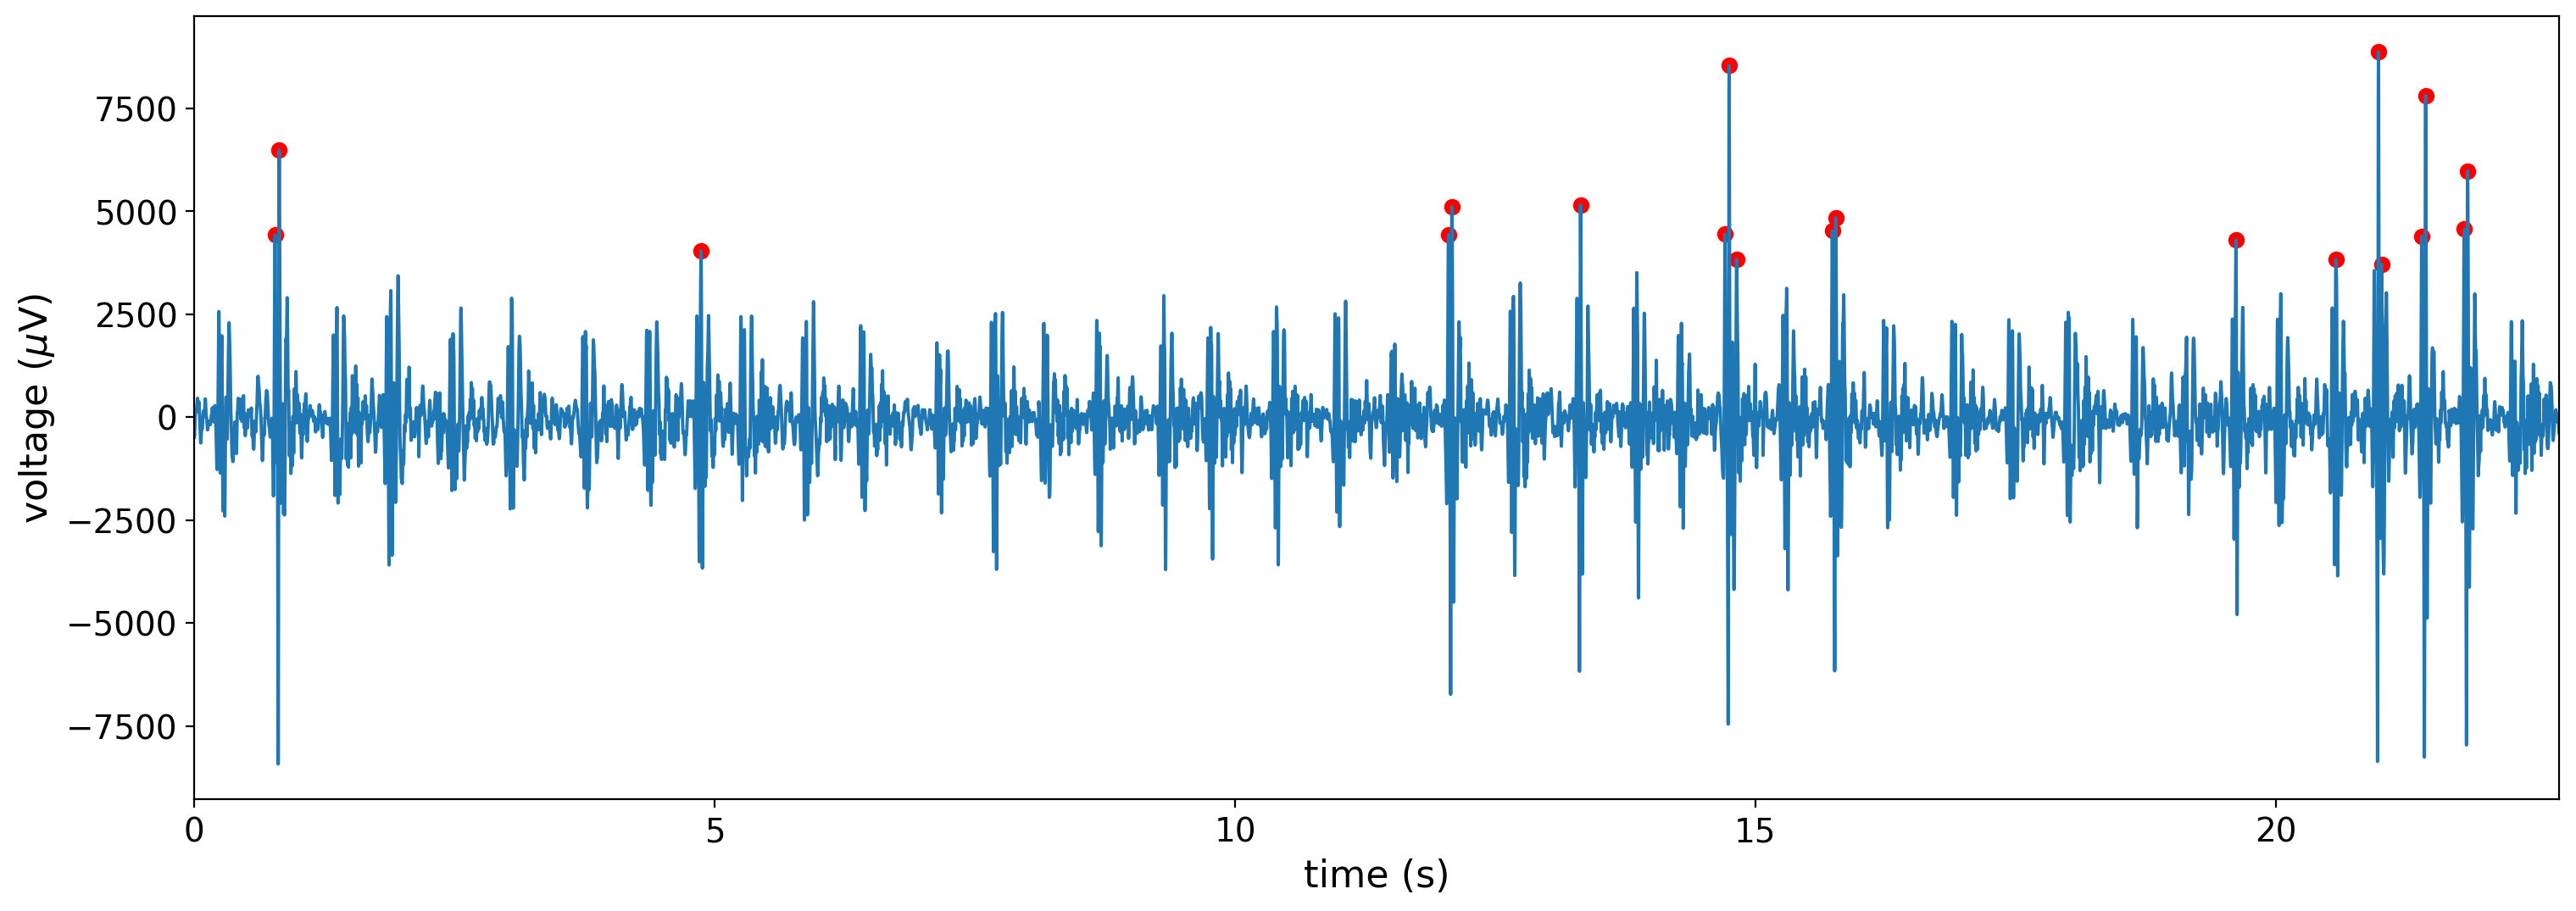

In [ ]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


In [ ]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 50.1694318531884


In [ ]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

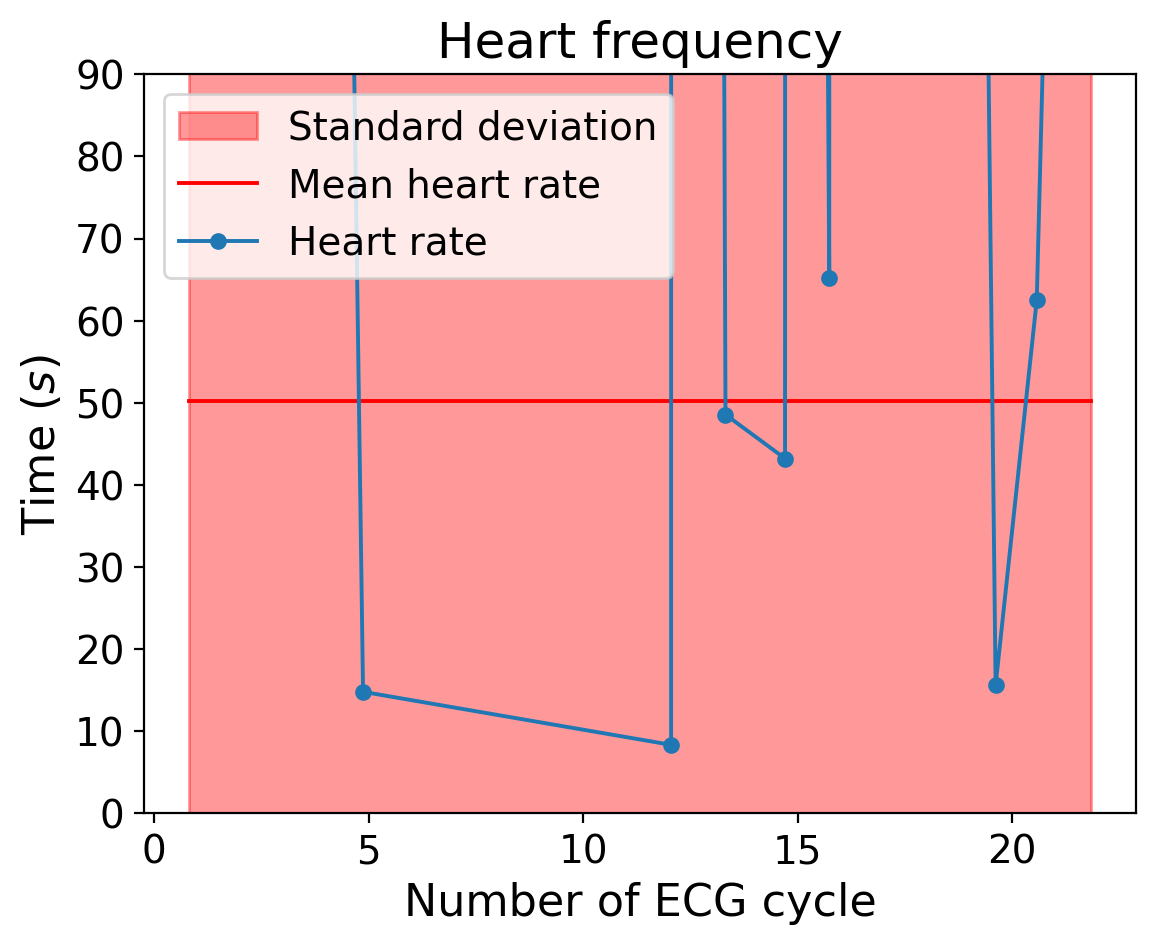

In [ ]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()


In [ ]:
timeECG, waveData = ecg('c0031.wav')
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

In [ ]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)

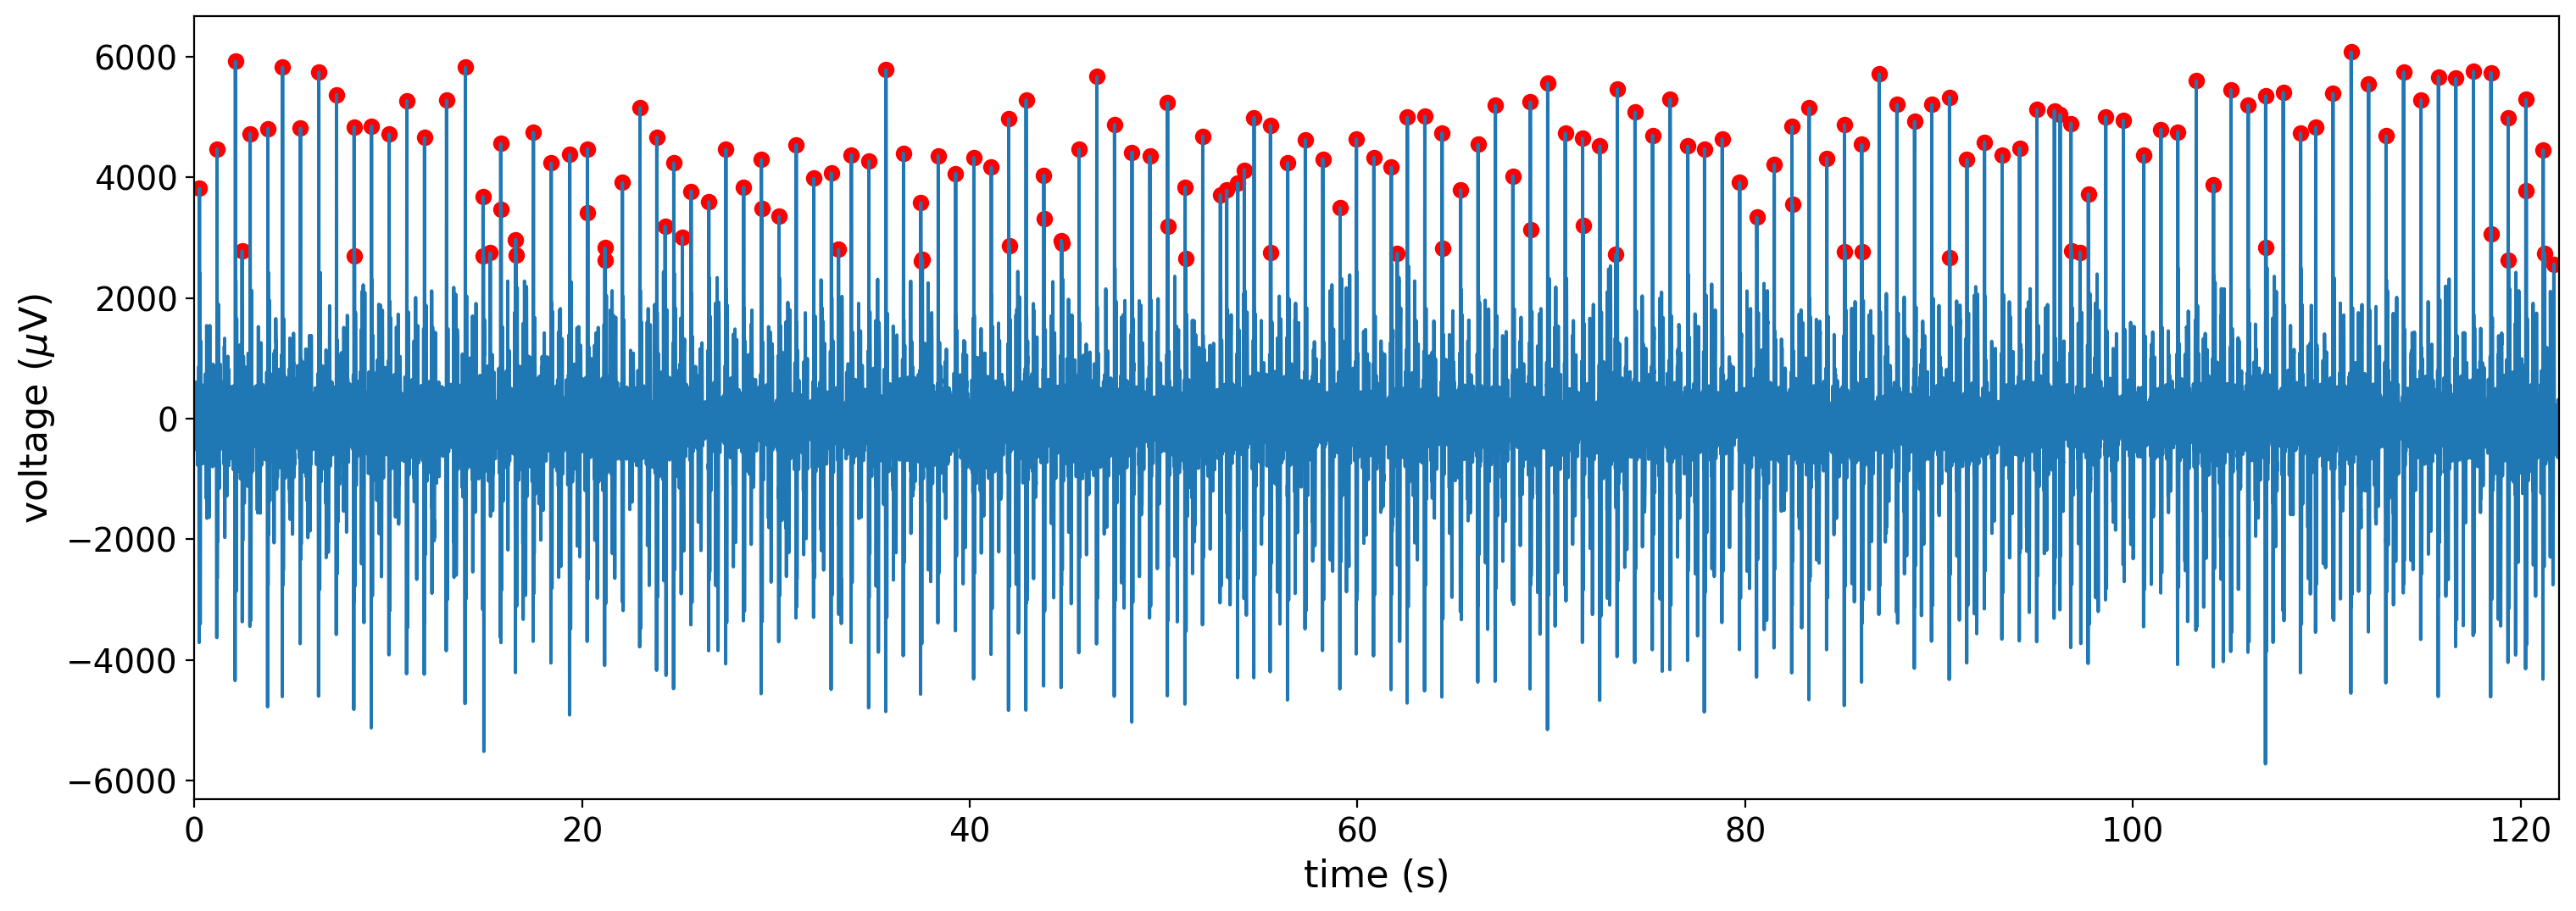

In [ ]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


In [ ]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 86.06663196678647


In [ ]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

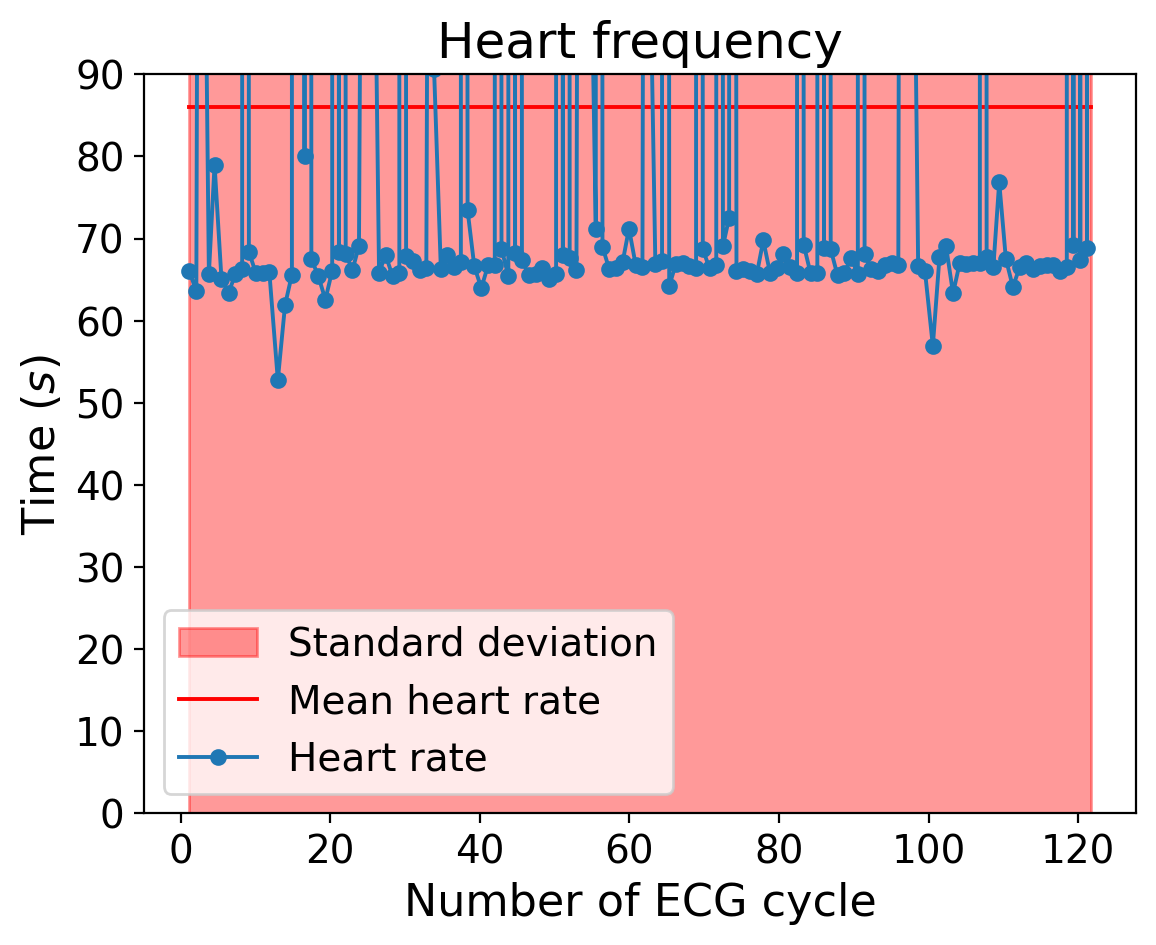

In [ ]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()

In [ ]:
timeECG, waveData = ecg('a0093.wav')
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

In [ ]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)

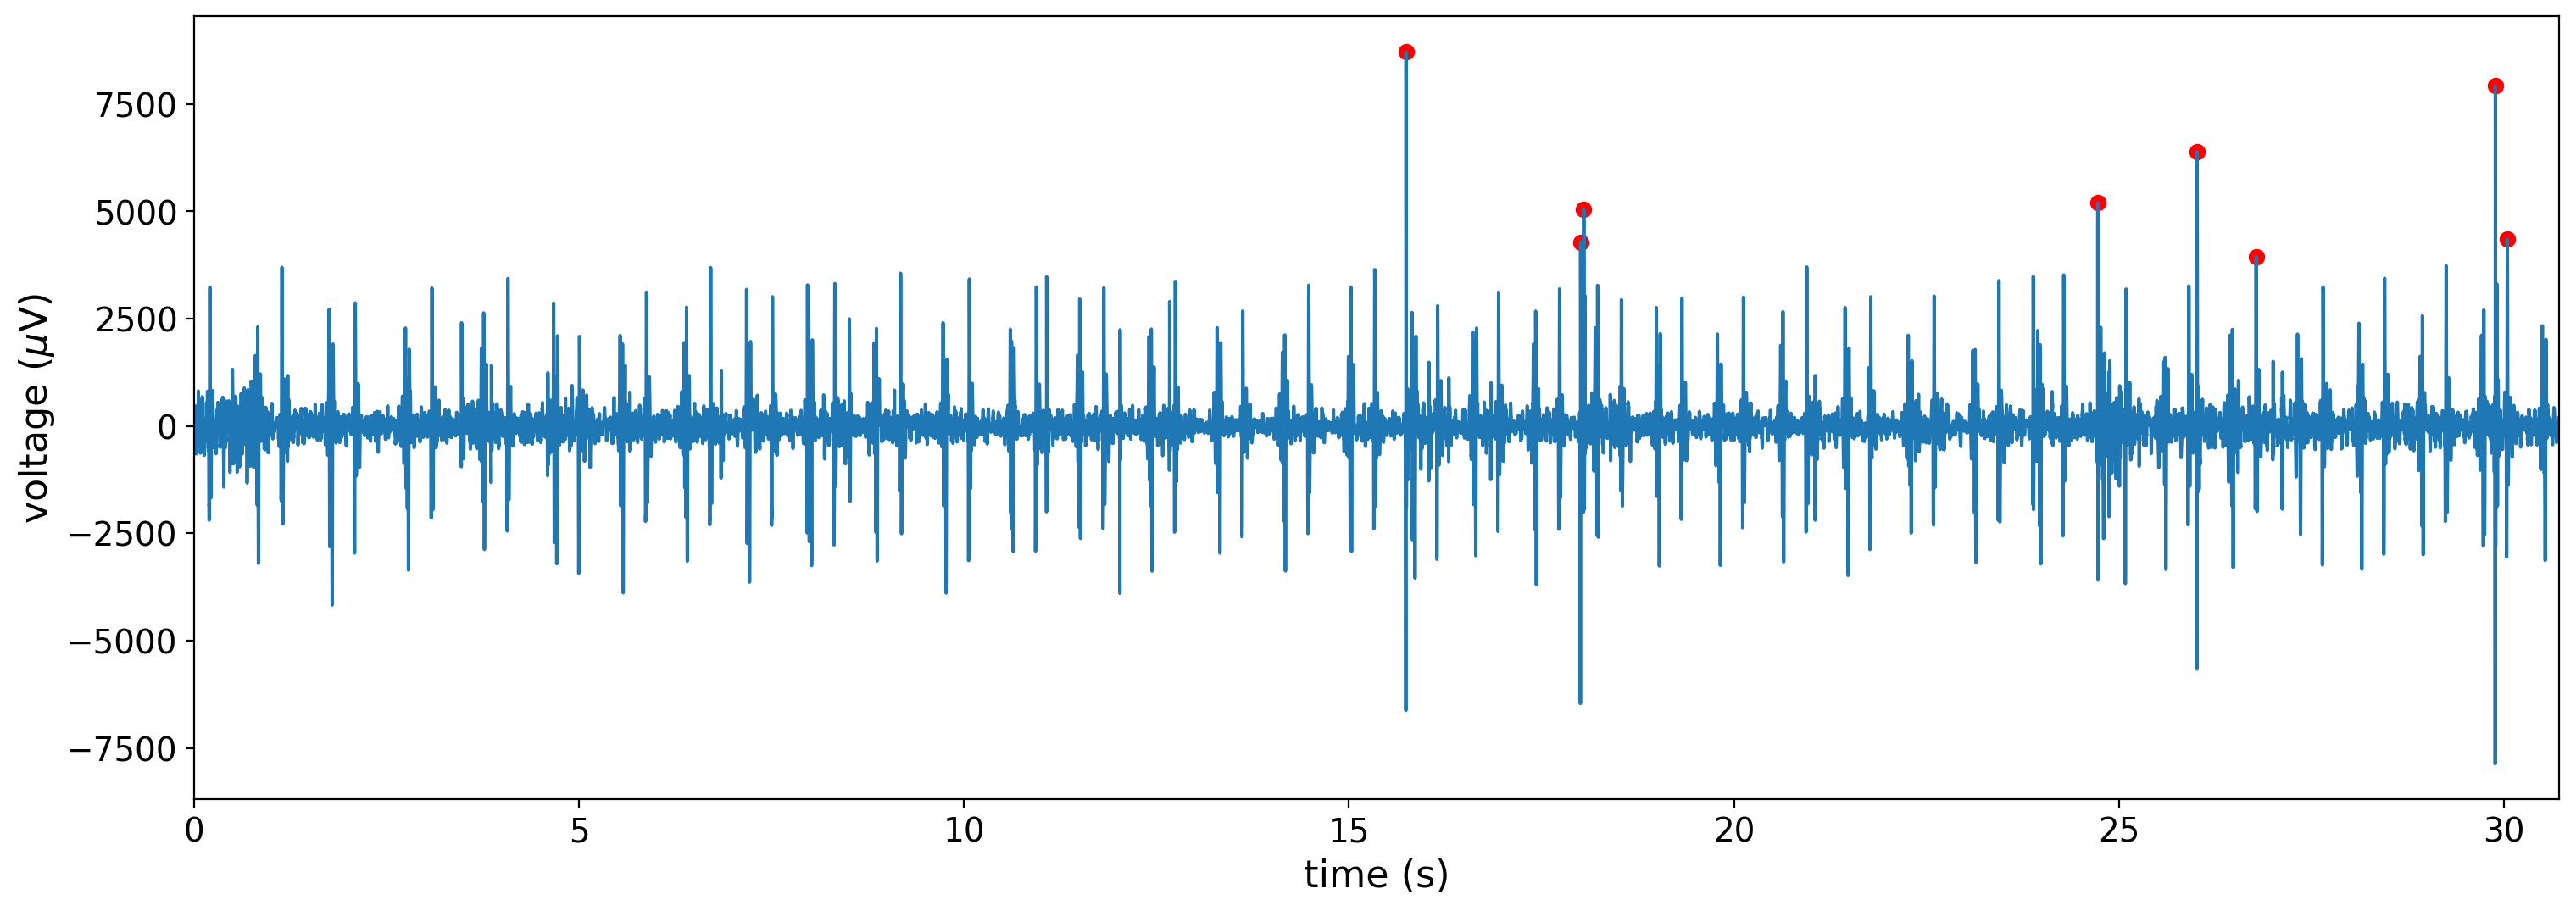

In [ ]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

In [ ]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 15.625000000000002


In [ ]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

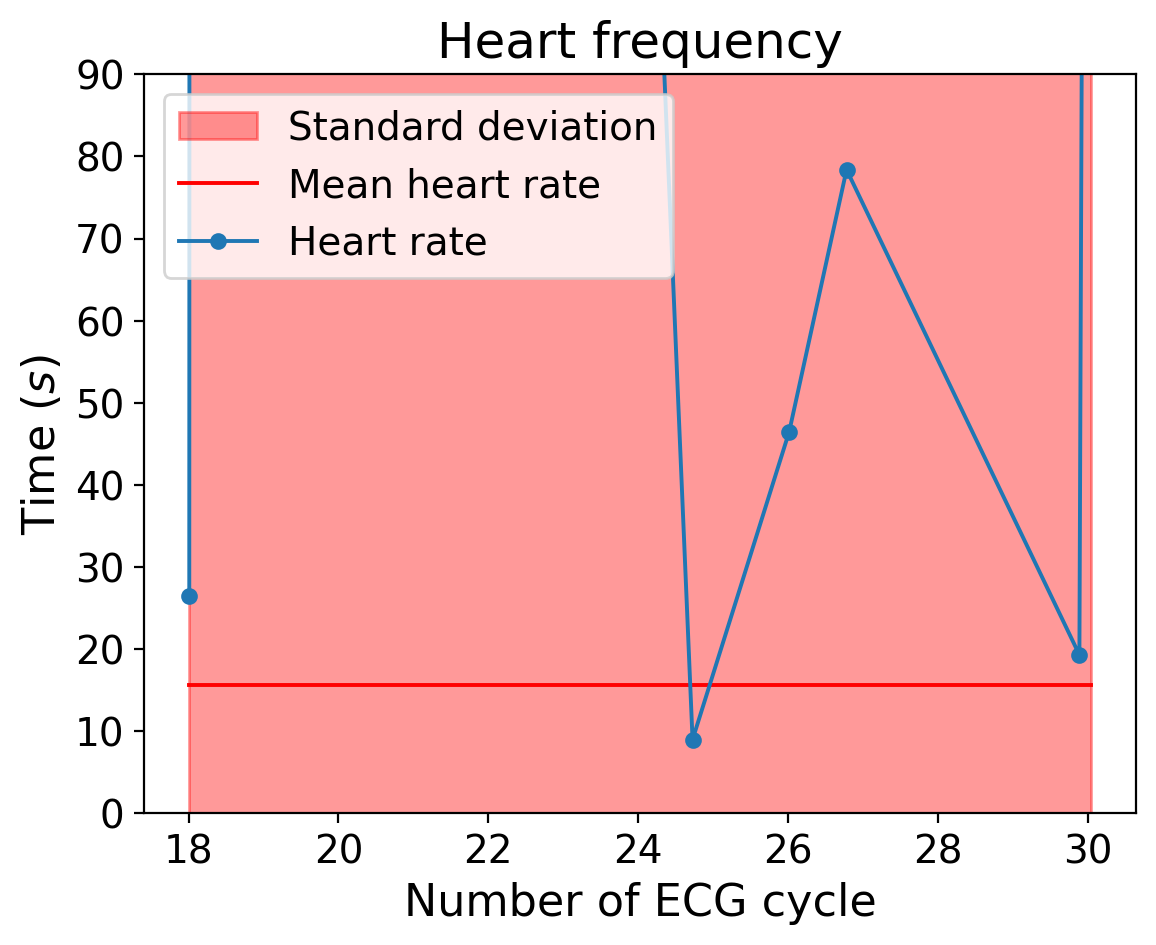

In [ ]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()